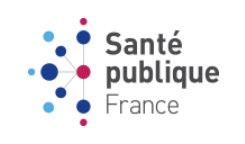

# Projet 3 :  Concevez une application au service de la santé publique

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.

# Idée d'application

Le Nutri-score est un système d'étiquetage nutritionnel à cinq niveaux, allant de A à E et du vert au rouge, établi en fonction de la valeur nutritionnelle d'un produit alimentaire. Il a pour but de favoriser le choix de produits plus sains d'un point de vue nutritionnel par les consommateurs et ainsi de participer à la lutte contre les maladies cardiovasculaires, l'obésité et le diabète. *(Source Wikipédia)* 

Les additifs alimentaires sont des produits ajoutés aux denrées alimentaires commerciales (notamment aliments industriels) destinés à l'alimentation humaine et/ou animale. *(Source Wikipedia)* 

Les additifs sont écrits sur les étiquetages en toutes lettres ou sous la forme d'un code constitué de la lettre "E" en majuscule, suivi d'un nombre compris entre 100 et 1522 voire d'une lettre facultative clôturant le tout. *(Source Wikipedia)*

Les aliments transformés cachent souvent une liste d’ingrédients à rallonge. Parmi eux, nombre d’additifs alimentaires (les fameux « E quelque chose ») qui peuvent cacher des substances dangereuses pour la santé. 

C'est pour cela que j'ai décidé de créer une application qui en plus d'indiquer le Nutriscore, affichera également le nombre d'additifs contenus leur dangerosité. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
df1 = pd.read_csv('produit.csv', encoding='utf-8',sep='\t',low_memory=False)

In [3]:
# Réglages des paramètres d'affichage
pd.set_option('display.max_columns', 33);
pd.set_option('display.max_rows', 100);
pd.options.display.max_rows = 999

In [4]:
# Création d'une fonction qui formate le texte en minuscule et supprime les tirets
def minuscule(df,col):
    df[col]=df[col].str.lower()
    df[col]=df[col].str.replace('-',' ',regex=True)
    

In [5]:
# Création d'une fonction qui remplace les valeurs manquantes des variables qualitatives
def isna_quali(df,col,new_value):
    df.loc[df[col].isna(),col] = df.loc[df[col].isna(),col] = new_value

In [6]:
# Création d'une fonction qui remplace les valeurs manquantes des variables qualitatives selon 2 conditions
def isna_quali_2(df,col,col1,value,new_value):
    df.loc[(df[col].isna())&(df[col1]==value),col] = df.loc[(df[col].isna())&(df[col1]==value),col] = new_value                             

In [7]:
# Création d'une fonction pour imputer des valeurs 

In [8]:
# Création d'une copie du dataframe original
df = df1.copy()

In [9]:
# Affichage de la taille 
df.shape

(320772, 162)

In [10]:
# Affichage des informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [11]:
# Comptage des variables par type
df.dtypes.value_counts()

float64    106
object      56
dtype: int64

Text(0.5, 1.0, 'Proportion des variables par type')

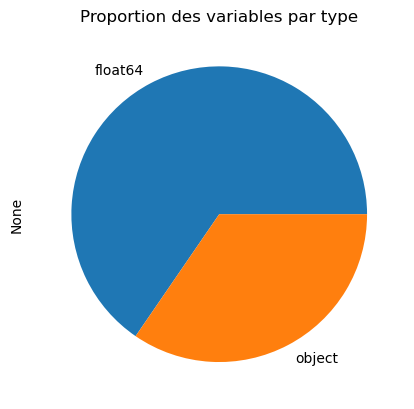

In [12]:
# Affichage des variables par types
df.dtypes.value_counts().plot.pie()
plt.title('Proportion des variables par type')

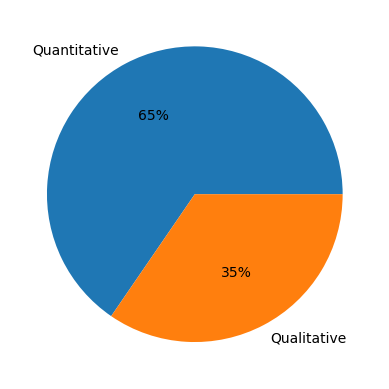

In [13]:
keys = ['Quantitative', 'Qualitative']
data = [106,56]  
  
# plotting data on chart
plt.pie(data, labels=keys, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [14]:
# Enregistrement des catégories par type:
col_quanti = df.select_dtypes(include=['float64']);
col_quali = df.select_dtypes(include=['object'])

In [15]:
df.isna().mean().mean()

0.7622157263195134

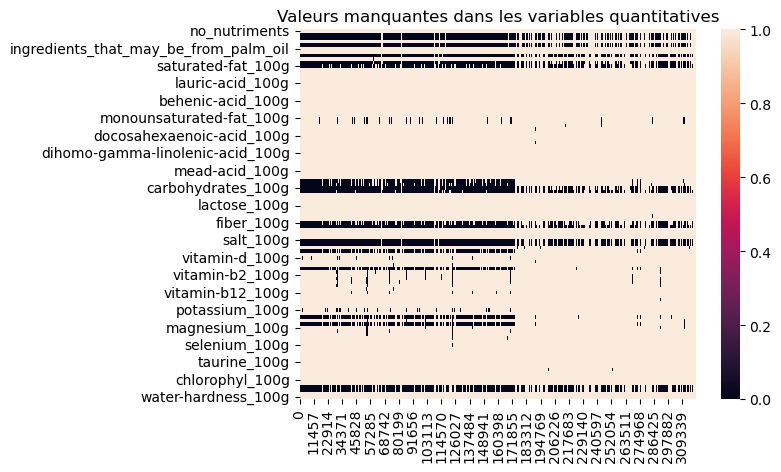

In [16]:
# Affichage des valeurs manquantes dans les variables quantitatives
sns.heatmap(col_quanti.isna().T)
plt.title('Valeurs manquantes dans les variables quantitatives')
plt.show()

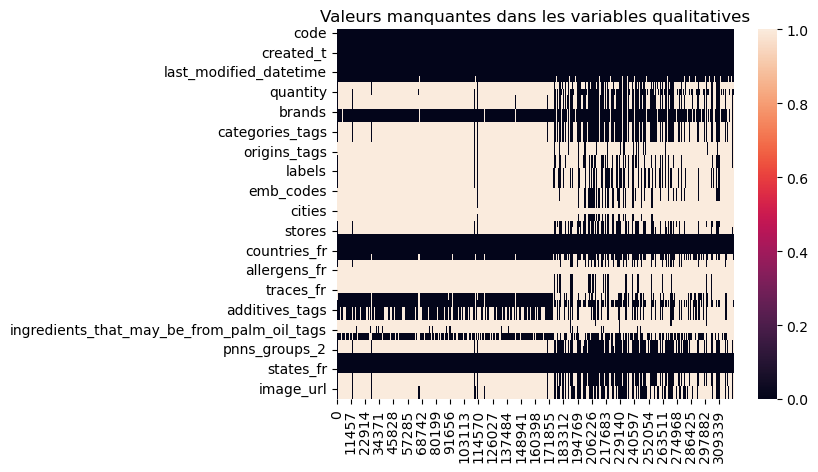

In [17]:
sns.heatmap(col_quali.isna().T)
plt.title('Valeurs manquantes dans les variables qualitatives')
plt.show()

In [18]:
# Calcul du pourcentage de valeurs manquantes par colonne
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

water-hardness_100g                           1.000000
no_nutriments                                 1.000000
ingredients_that_may_be_from_palm_oil         1.000000
nutrition_grade_uk                            1.000000
nervonic-acid_100g                            1.000000
erucic-acid_100g                              1.000000
mead-acid_100g                                1.000000
elaidic-acid_100g                             1.000000
butyric-acid_100g                             1.000000
caproic-acid_100g                             1.000000
ingredients_from_palm_oil                     1.000000
lignoceric-acid_100g                          1.000000
cerotic-acid_100g                             1.000000
melissic-acid_100g                            1.000000
chlorophyl_100g                               1.000000
glycemic-index_100g                           1.000000
myristic-acid_100g                            0.999997
palmitic-acid_100g                            0.999997
caprylic-a

<AxesSubplot: >

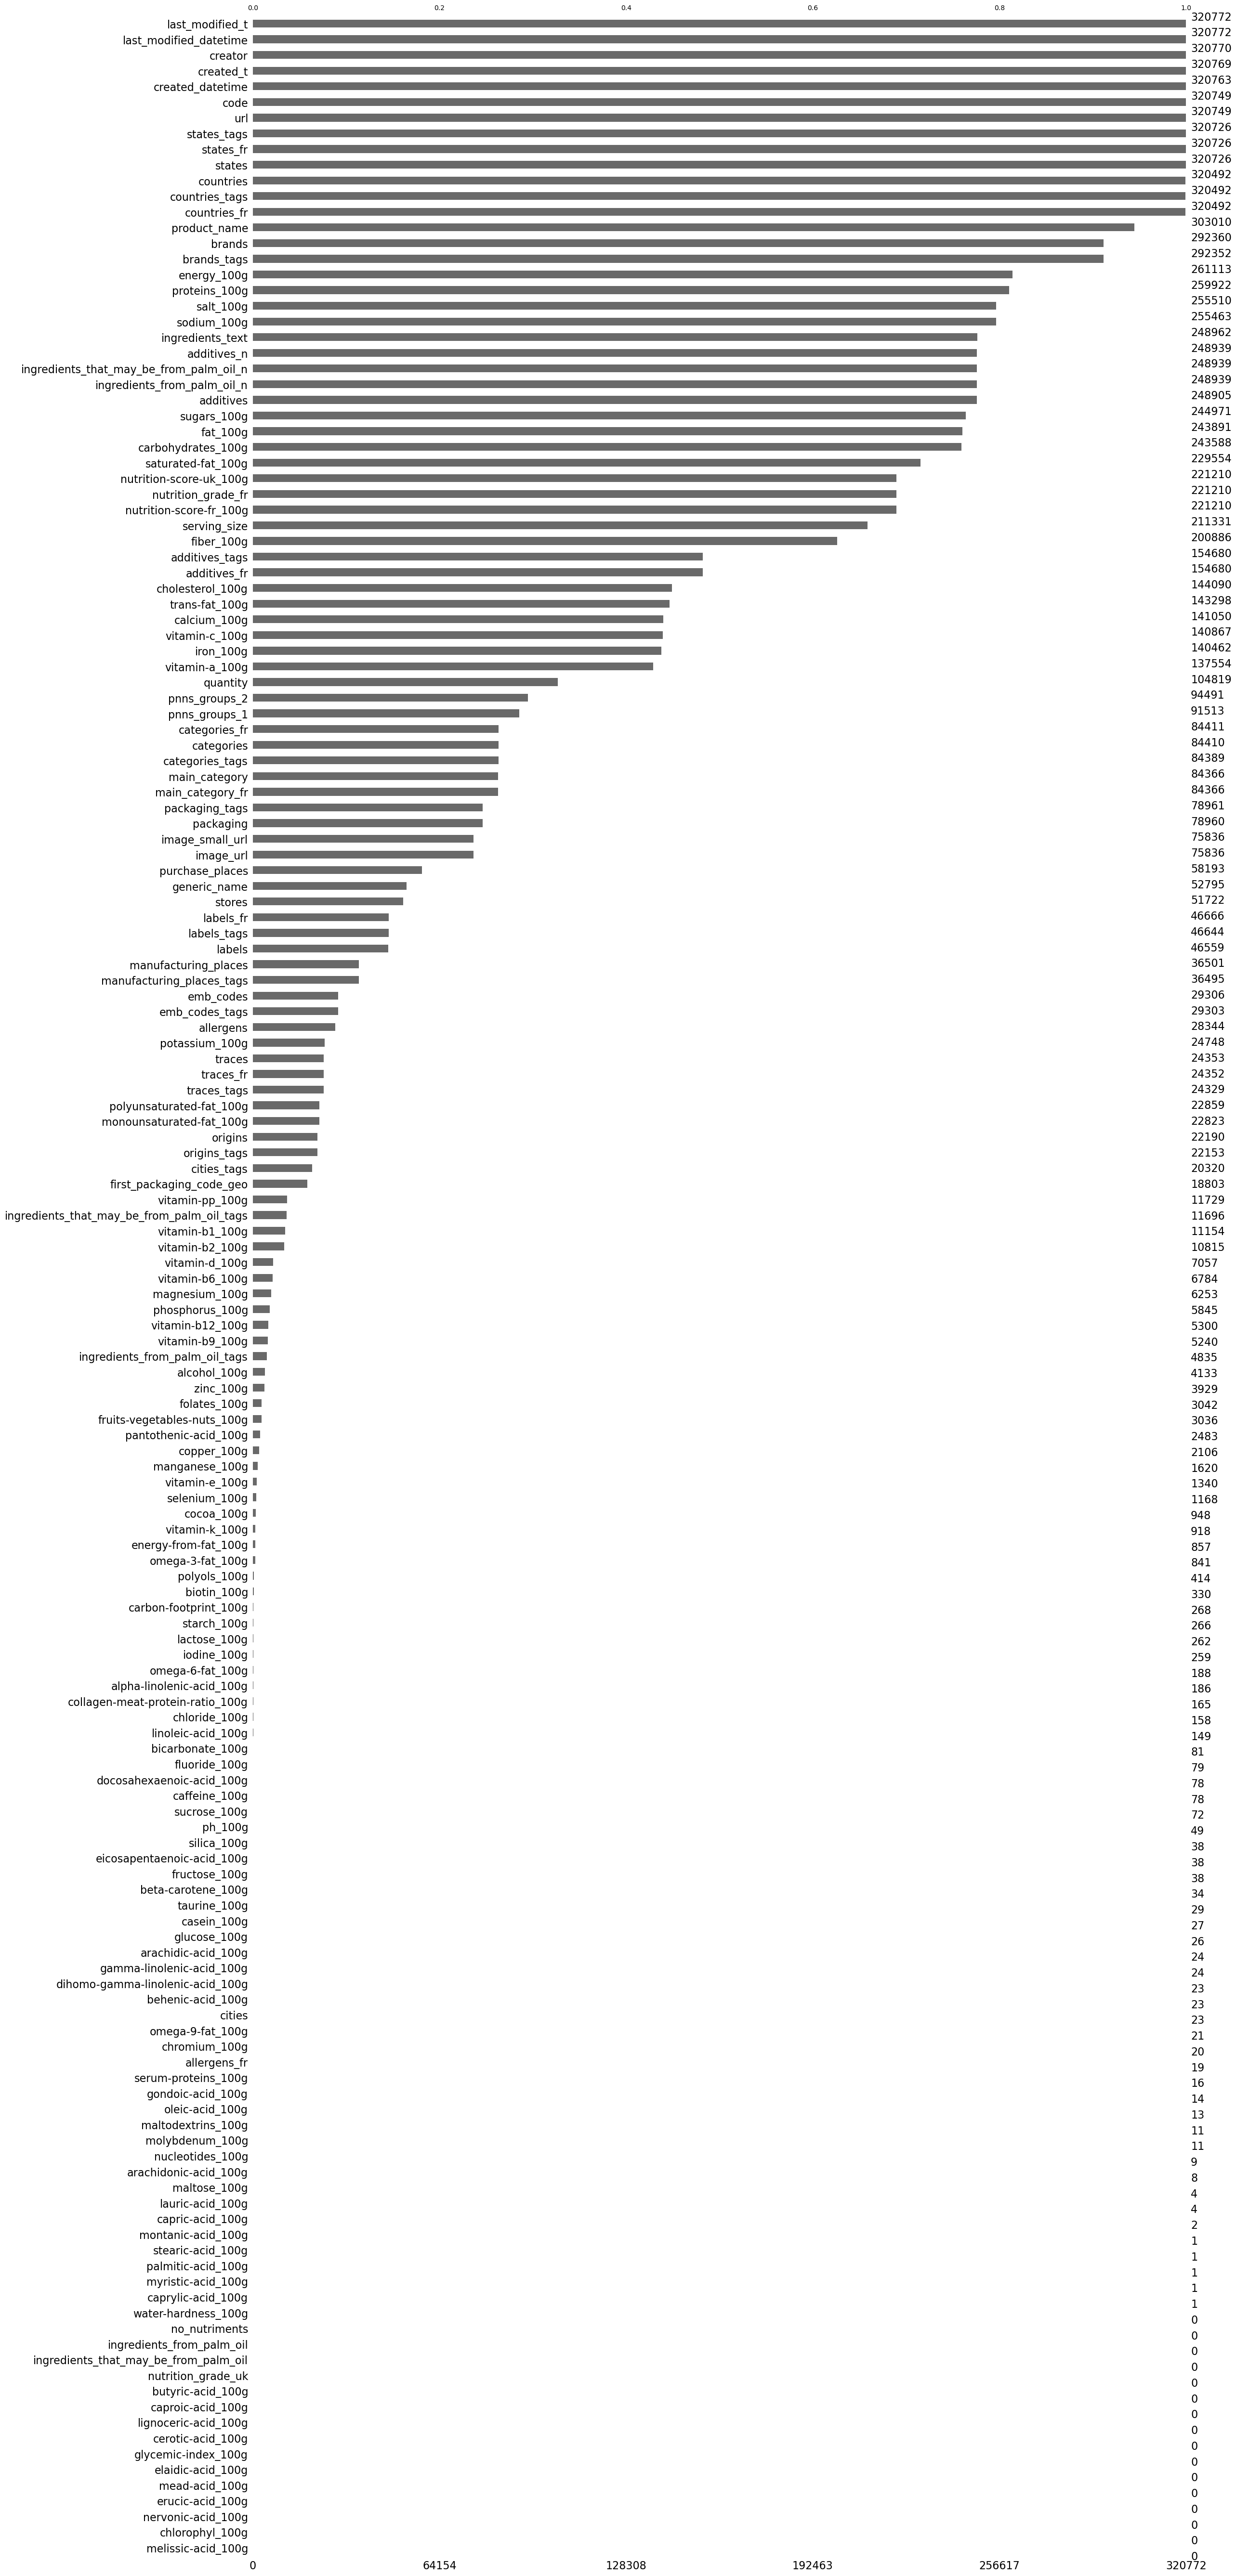

In [19]:
msno.bar(df, sort='ascending')

## Choix des colonnes:

In [20]:
# Sélection des colonnes
df2 = df[['code', 'categories_fr', 'labels_fr', 'countries_fr', 'allergens',
       'traces_fr', 'nutrition_grade_fr', 'states_fr', 'main_category_fr',
       'nutrition-score-fr_100g', 'product_name', 'generic_name', 'quantity',
       'additives_n', 'additives', 'pnns_groups_1', 'pnns_groups_2',
       'additives_tags', 'packaging_tags', 'categories_tags', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g','polyols_100g']]

In [21]:
df2.duplicated(subset=['product_name','generic_name', 'quantity',
       'additives_n', 'additives', 'pnns_groups_1', 'pnns_groups_2',
       'additives_tags', 'packaging_tags', 'categories_tags', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'alcohol_100g','polyols_100g'], keep='first').sum()

22891

In [22]:
# Suppression des doublons
df2 = df2[~df2.duplicated(subset=['product_name','generic_name', 'quantity',
       'additives_n', 'additives', 'pnns_groups_1', 'pnns_groups_2',
       'additives_tags', 'packaging_tags', 'categories_tags', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'alcohol_100g','polyols_100g'], keep='first')]

In [23]:
# Recherche de doublons
df2.duplicated(subset=['product_name','generic_name', 'quantity',
       'additives_n', 'additives', 'pnns_groups_1', 'pnns_groups_2',
       'additives_tags', 'packaging_tags', 'categories_tags', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'alcohol_100g','polyols_100g'], keep='first').sum()

0

In [24]:
# Affichage de la taille du df
df2.shape

(297881, 31)

# Suppression des produits vendus à l'étranger

Pour ce projet, je décide de me concentrer que sur les produits vendus en France (métropôle et DOM-TOM)

In [25]:
#Affichage des valeurs uniques des pays présents dans la colonne countries_fr
df2['countries_fr'].unique()

array(['France', 'États-Unis', 'Royaume-Uni', 'France,États-Unis',
       'Canada', 'Suisse', 'Espagne', 'Allemagne', 'Slovénie', 'Italie',
       'Roumanie', 'Australie', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Guadeloupe',
       'Royaume-Uni,États-Unis', 'Canada,États-Unis', 'Pays-Bas',
       'Australie,France', 'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'Irlande', 'France,La Réunion',
       'Australie,Suisse', 'France,Allemagne', 'Brésil',
       'Belgique,France', 'États-Unis,en:Australie', 'Arabie saoudite',
       'Émirats arabes unis', 'Moldavie', 'Belgique', nan, 'Singapour',
       'Finlande', 'Australie,États-Unis', 'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Panama', 'Costa Rica', 'États-Unis,en:Pays-bas',
       'Espagne,Royaume-Uni,en:Scotland',
       'Polynésie française,États-Unis', 'Thaïlande', 'Mexique', 'Chine',
       'Taiwan', 'Luxembourg', 'Liban', '

In [26]:
# Nombre de pays présents dans la colonne countries_fr
df2['countries_fr'].nunique()

706

In [27]:
# Nombre de valeurs manquantes 
df2['countries_fr'].isna().sum()

236

In [28]:
# Je remplace mes valeurs manquantes par la mention 'Non Indiqué'
isna_quali(df2,'countries_fr','Non Indiqué')

In [29]:
df2.loc[df2['countries_fr']=='Non Indiqué',:].isna().mean()

code                       0.000000
categories_fr              0.461864
labels_fr                  0.741525
countries_fr               0.000000
allergens                  0.902542
traces_fr                  0.898305
nutrition_grade_fr         0.758475
states_fr                  0.097458
main_category_fr           0.559322
nutrition-score-fr_100g    0.758475
product_name               0.042373
generic_name               0.601695
quantity                   0.199153
additives_n                0.635593
additives                  0.635593
pnns_groups_1              0.411017
pnns_groups_2              0.368644
additives_tags             0.830508
packaging_tags             0.487288
categories_tags            0.461864
energy_100g                0.707627
fat_100g                   0.724576
saturated-fat_100g         0.737288
carbohydrates_100g         0.720339
sugars_100g                0.745763
fiber_100g                 0.889831
proteins_100g              0.728814
salt_100g                  0

In [30]:
df_etranger = df2.copy()

In [31]:
# Je ne conserve que les produits vendus en France et dans les DOM TOM
# Création d'une liste DOM-TOM qui regroupe tous les territoires et départements d'outre-mer
dom_tom = ['Guadeloupe','Martinique','Guyane','La Réunion','Saint-Pierre-et-Miquelon','Mayotte','Saint-Barthélemy',
'Saint-Martin','Wallis-et-Futuna','Polynésie française','Nouvelle-Calédonie','Terres australes et antarctiques françaises',
'Clipperton'];

# Affichage des valeurs qui contiennent le mot France 
france = df2.loc[df2['countries_fr'].str.contains('France|france')]['countries_fr'].unique()
france

array(['France', 'France,États-Unis', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Australie,France',
       'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'France,La Réunion',
       'France,Allemagne', 'Belgique,France', 'France,Suisse',
       'France,Suisse,États-Unis', 'France,Italie',
       'France,Royaume-Uni,États-Unis', 'Australie,France,Royaume-Uni',
       'Canada,France', 'Canada,France,Suisse',
       'Belgique,Canada,France,Suisse', 'France,Saint-Pierre-et-Miquelon',
       'France,Russie,Espagne,Royaume-Uni', 'France,Suisse,Royaume-Uni',
       'France,Nouvelle-Zélande', 'Belgique,France,Royaume-Uni',
       'Canada,France,États-Unis', 'France,Pays-Bas',
       'France,Pays-Bas,Royaume-Uni', 'France,Qatar', 'Algérie,France',
       'France,Guyane', 'Belgique,France,Pays-Bas', 'France,Tunisie',
       'Belgique,France,Suisse',
       'Belgique,France,Saint-Pierre-et-Miquelon', 'France,en:An',
       'France,Japon', '

Beaucoup de produits sont vendus en France et à l'étranger.

In [32]:
df_etranger = df2.loc[(~df2['countries_fr'].isin(dom_tom)) | (~df2['countries_fr'].isin(france))]

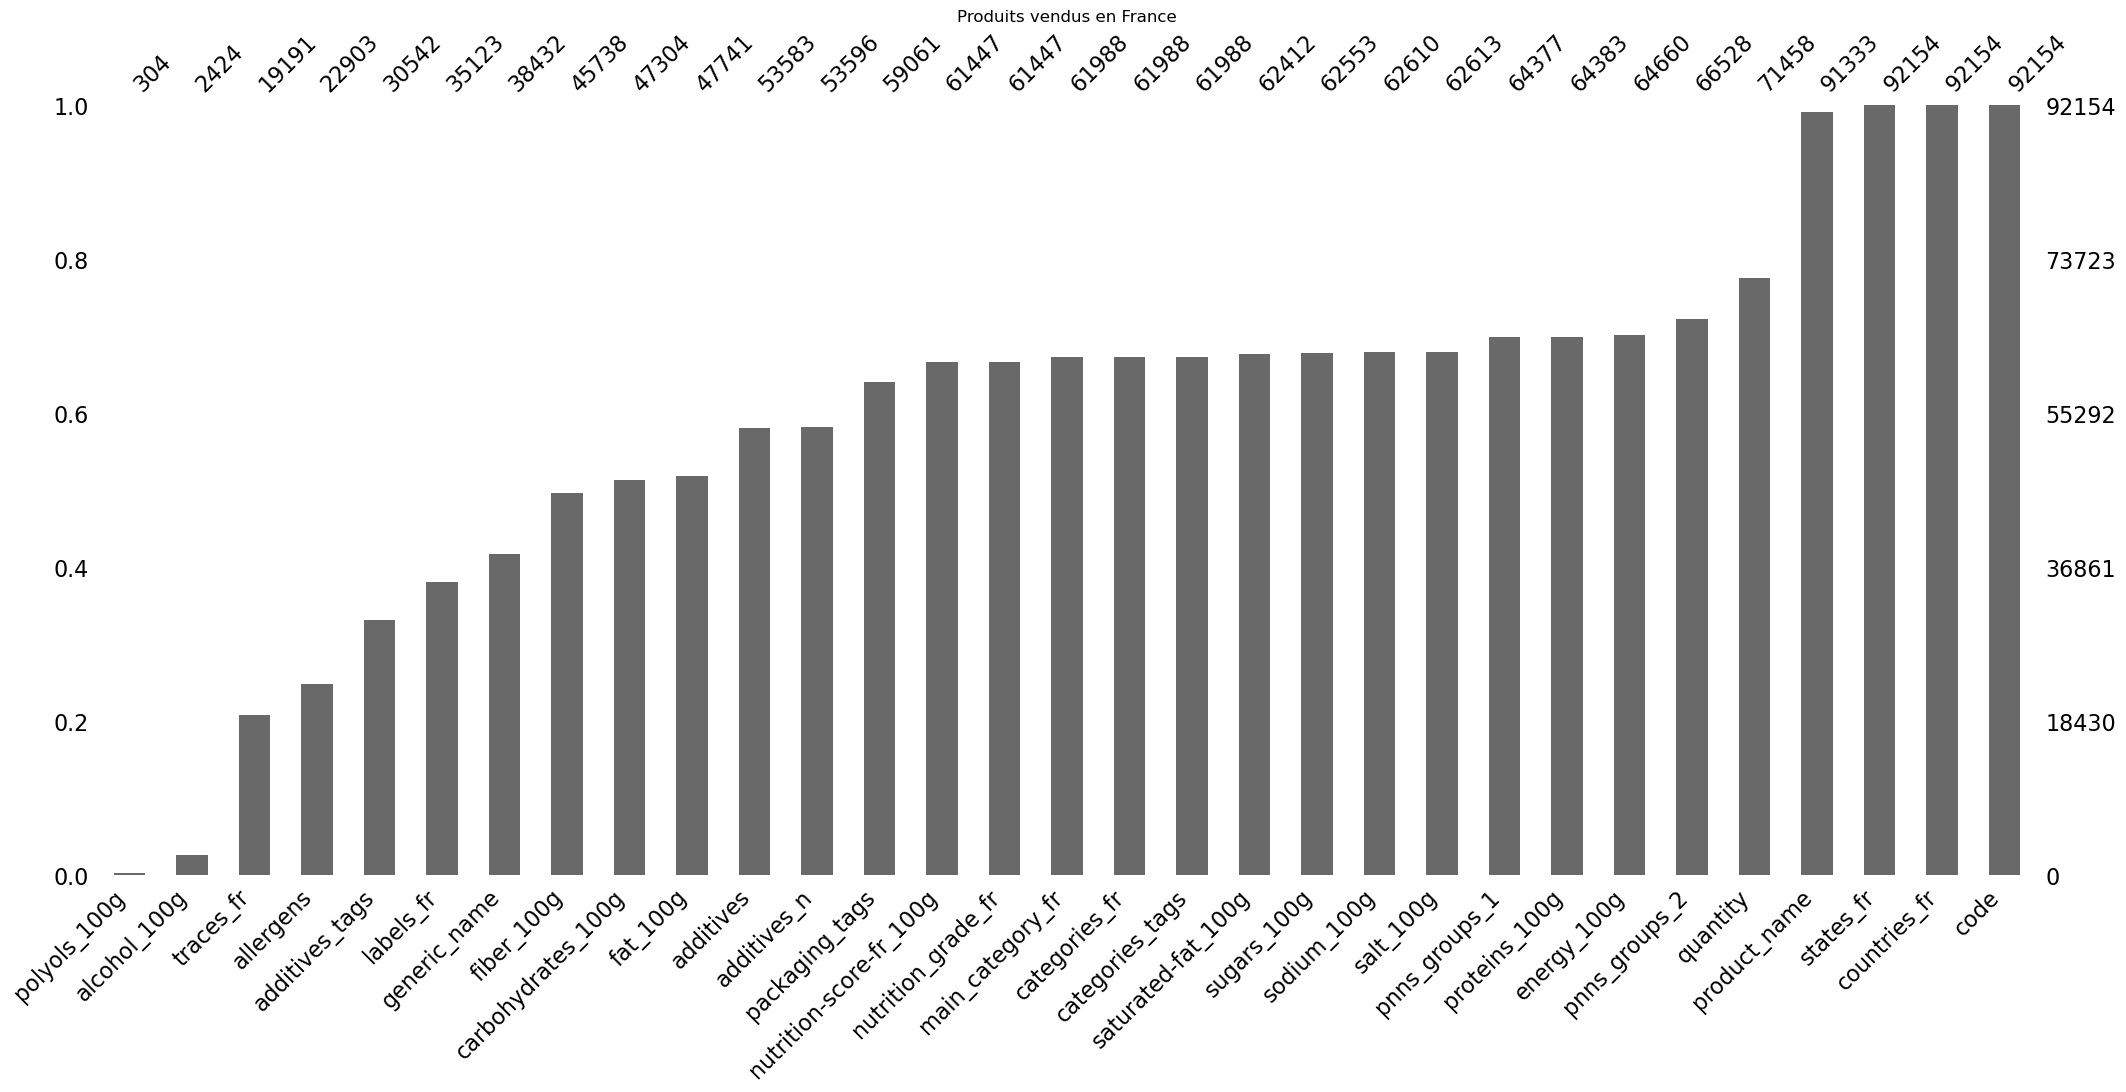

In [33]:
msno.bar(df2.loc[(df2['countries_fr'].isin(dom_tom)) | (df2['countries_fr'].isin(france))], sort='ascending')
plt.title('Produits vendus en France')
plt.show()

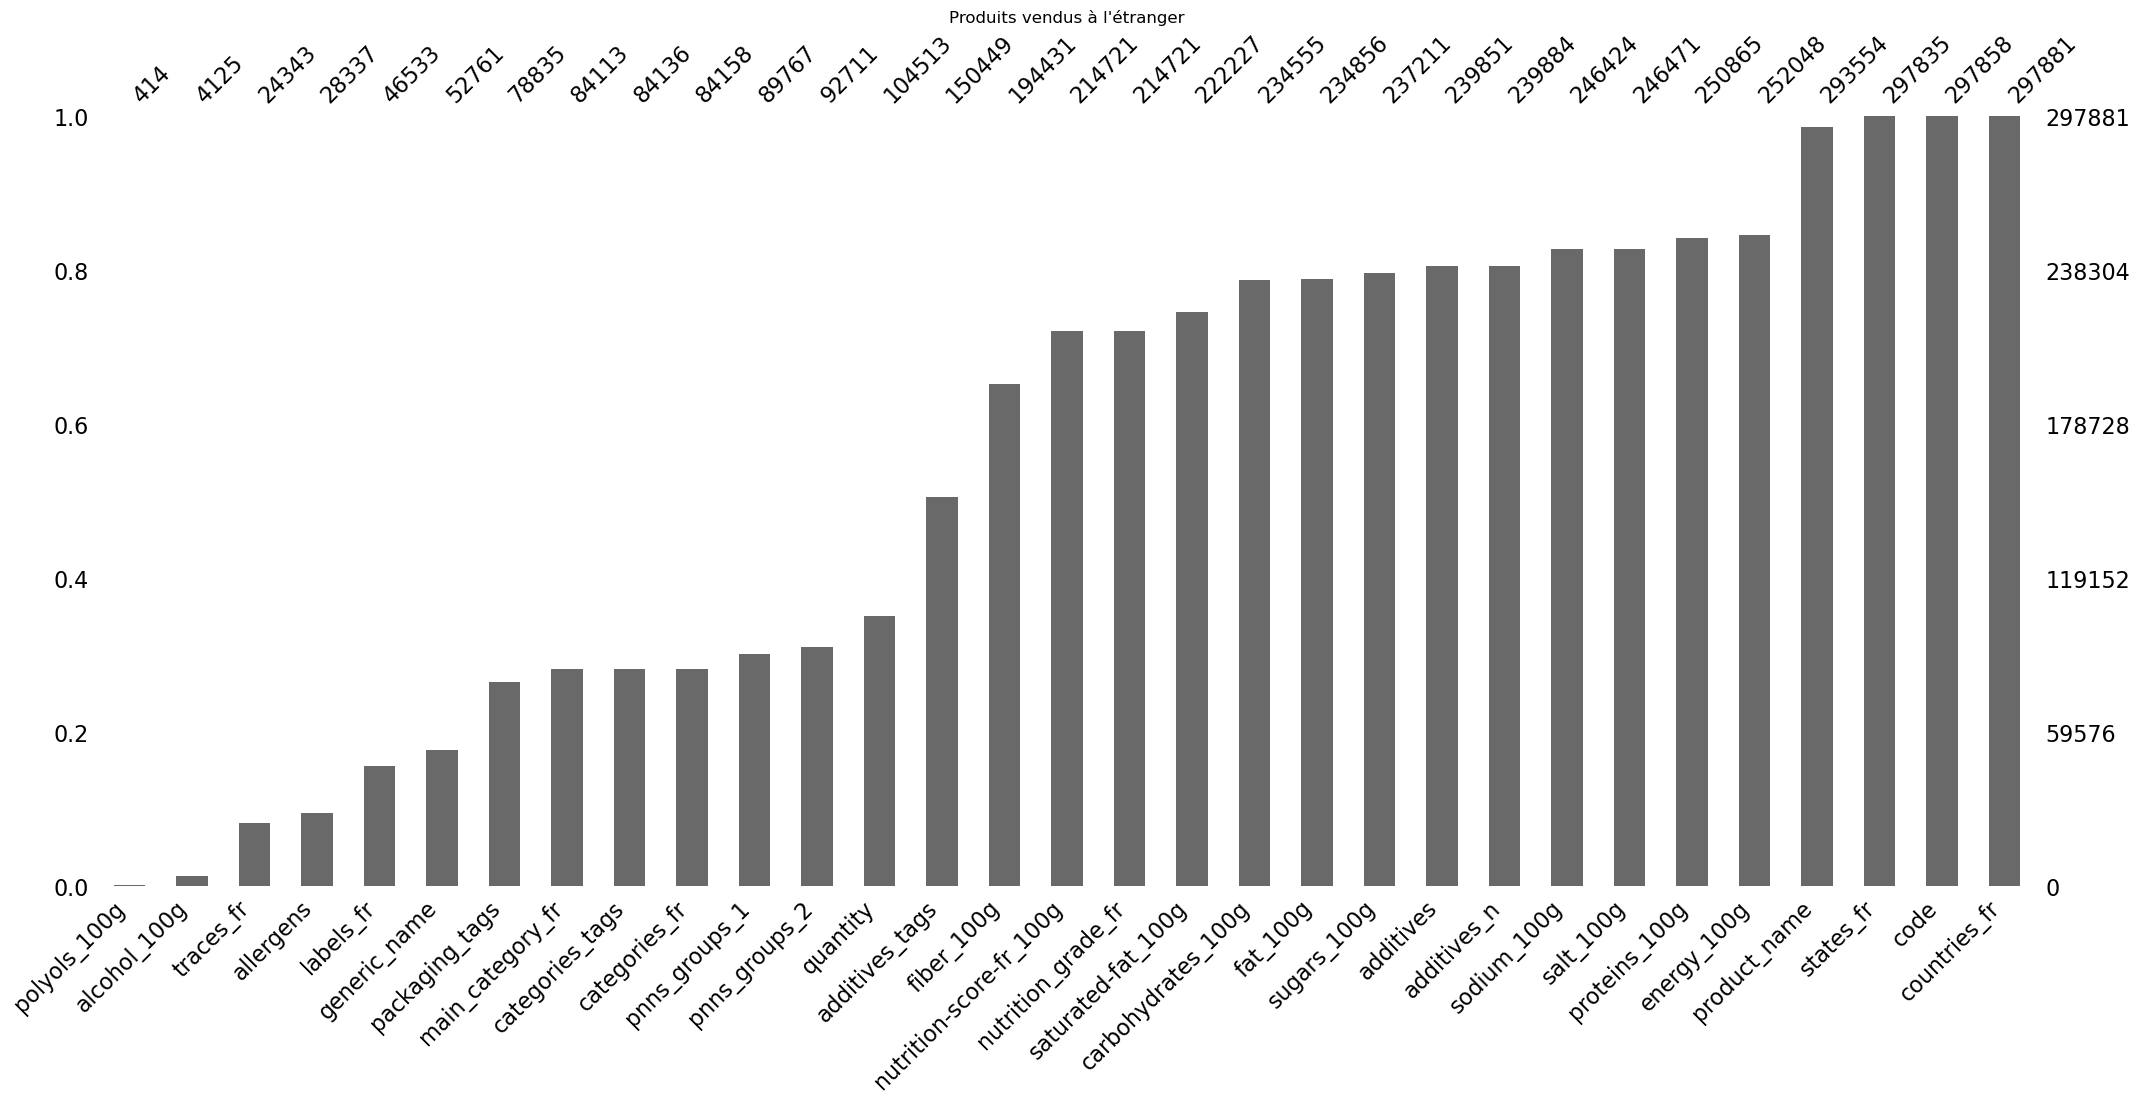

In [34]:
msno.bar(df_etranger, sort='ascending')
plt.title('Produits vendus à l\'étranger')
plt.show()

Les produits dont on ne connait pas l'origine contiennent beaucoup de valeurs manquantes.

In [35]:
# Je ne conserve que les produits qui sont vendus en France ou dans les DOM-TOM
df2 = df2.loc[(df2['countries_fr'].isin(dom_tom)) | (df2['countries_fr'].isin(france))]

In [36]:
# Je supprime les lignes qui ne contiennent pas de valeurs numériques.
df3 = df2.select_dtypes(include=['float64'])
df3 = df3[df3.isna().all(axis=1)].index

In [37]:
df2 = df2.drop(df3)

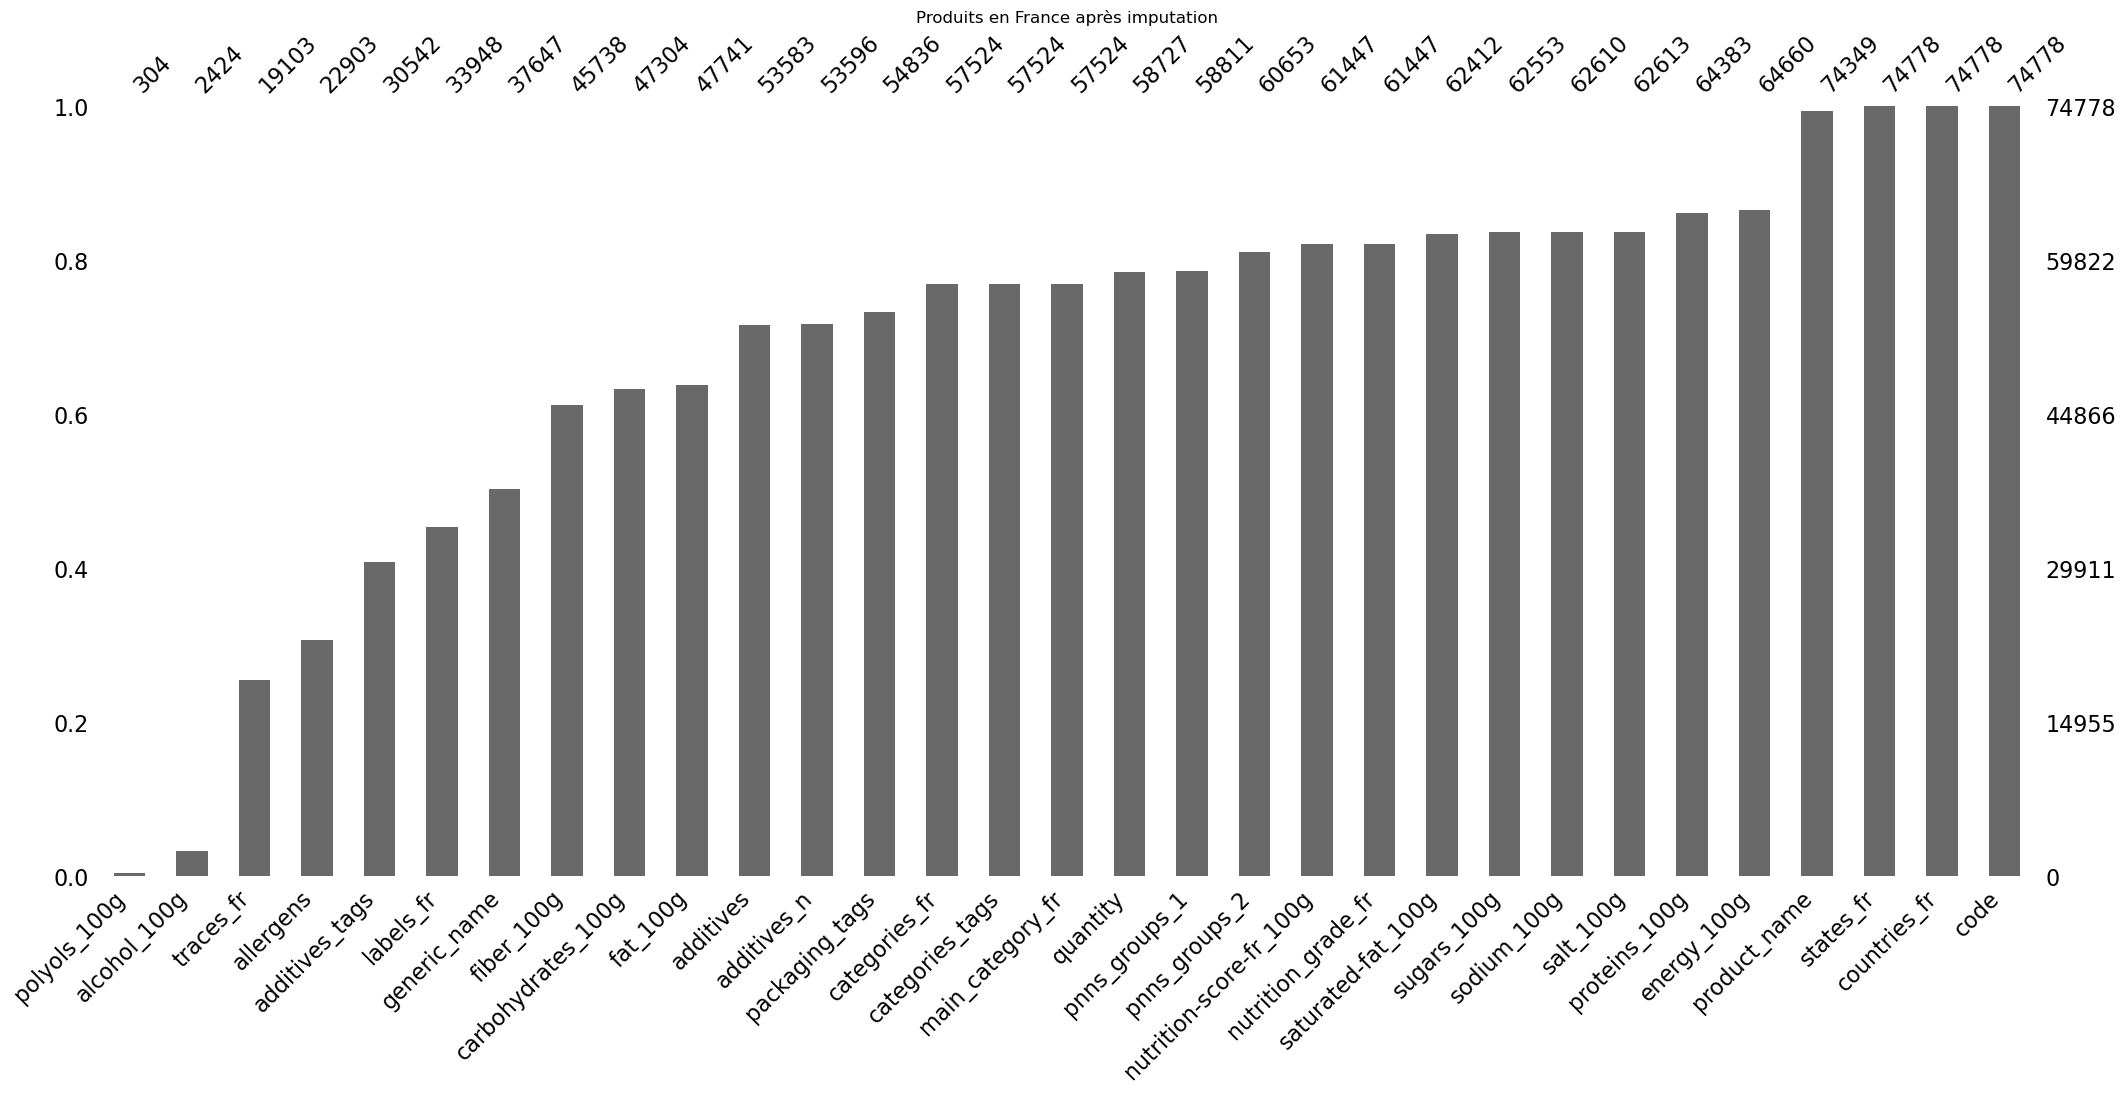

In [38]:
msno.bar(df2, sort='ascending')
plt.title('Produits en France après imputation')
plt.show()

# Types des colonnes

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74778 entries, 106 to 320765
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     74778 non-null  object 
 1   categories_fr            57524 non-null  object 
 2   labels_fr                33948 non-null  object 
 3   countries_fr             74778 non-null  object 
 4   allergens                22903 non-null  object 
 5   traces_fr                19103 non-null  object 
 6   nutrition_grade_fr       61447 non-null  object 
 7   states_fr                74778 non-null  object 
 8   main_category_fr         57524 non-null  object 
 9   nutrition-score-fr_100g  61447 non-null  float64
 10  product_name             74349 non-null  object 
 11  generic_name             37647 non-null  object 
 12  quantity                 58727 non-null  object 
 13  additives_n              53596 non-null  float64
 14  additives          

Certaines colonnes n'ont pas le bon type. Je vais les modifier.

In [40]:
# Je remplace 2 colonnes en 'Int32'
df2[['nutrition-score-fr_100g','additives_n']] =df2[['nutrition-score-fr_100g','additives_n']].astype('Int32')

In [41]:
# Je défini l'arrondi à 2 chiffres après la virgule
df2 = df2.round(2)

# Groupes Pnns 1 et 2

In [42]:
# Je commence par vérifier que tous les produits sont des produits alimentaires
df2.loc[(~df2['main_category_fr'].isna())&(df2['main_category_fr'].str.contains('Non alimentaire')),:].head(2)

code                                     categories_fr  \
170118  0883929140886                                   Non alimentaire   
197872  3178041302678  Non alimentaire,Open Beauty Facts,en:Shampoooing   

                                         labels_fr countries_fr allergens  \
170118  Bio,Bio européen,AB Agriculture Biologique       France       NaN   
197872                                         NaN       France       NaN   

       traces_fr nutrition_grade_fr  \
170118       NaN                  a   
197872       NaN                NaN   

                                                states_fr main_category_fr  \
170118  A compléter,Informations nutritionnelles compl...  Non alimentaire   
197872  A compléter,Informations nutritionnelles à com...  Non alimentaire   

        nutrition-score-fr_100g  \
170118                      -10   
197872                     <NA>   

                                             product_name generic_name  \
170118  Harry Potter & The Deathly Hallows Radcliffe /...          NaN   
197872  Shampooing Diamond Color cheveux colorés ou mé...          NaN   

       quantity  additives_n  \
170118      NaN         <NA>   
197872   250 ml            1   

                                                additives pnns_groups_1  \
170118                                                NaN       unknown   
197872   [ aqb1a -> fr:aqb1a  ]  [ sodium-lourelli-sul...       unknown   

       pnns_groups_2 additives_tags packaging_tags  \
170118       unknown            NaN            NaN   
197872       unknown        en:e470         flacon   

                                          categories_tags  energy_100g  \
170118                               en:non-food-products          4.0   
197872  en:non-food-products,en:open-beauty-facts,en:s...          NaN   

        fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
170118       NaN                 0.0                 NaN          0.0   
197872       NaN                 NaN                 NaN          NaN   

        fiber_100g  proteins_100g  salt_100g  sodium_100g  alcohol_100g  \
170118       100.0          100.0        0.0          0.0           NaN   
197872         NaN            NaN        NaN          NaN           NaN   

        polyols_100g  
170118           NaN  
197872           NaN

In [43]:
df2.loc[(~df2['main_category_fr'].isna())&(df2['main_category_fr'].str.contains('Non alimentaire'))]['code'].count()

7

In [44]:
# Je supprime les produits non alimentaires
df2.drop(df2.loc[(~df2['main_category_fr'].isna())&(df2['main_category_fr'].str.contains('Non alimentaire'))].index,inplace=True)

In [45]:
# Affichage des valeurs uniques et du nombre d'instances du groupe pnns_1 
print(df2['pnns_groups_1'].unique())
print(df2['pnns_groups_1'].nunique())

['unknown' 'Cereals and potatoes' 'Sugary snacks' 'Beverages' nan
 'Fish Meat Eggs' 'Composite foods' 'Fruits and vegetables'
 'Milk and dairy products' 'Fat and sauces' 'Salty snacks'
 'fruits-and-vegetables' 'sugary-snacks' 'cereals-and-potatoes']
13


In [46]:
# J'utilise ma fonction pour mettre tous les termes en minuscule et supprimer les tirets
minuscule(df2,'pnns_groups_1');
print(df2['pnns_groups_1'].unique(),'\n',
      df2['pnns_groups_1'].nunique())

['unknown' 'cereals and potatoes' 'sugary snacks' 'beverages' nan
 'fish meat eggs' 'composite foods' 'fruits and vegetables'
 'milk and dairy products' 'fat and sauces' 'salty snacks'] 
 10


In [47]:
# Affichage des valeurs uniques et du nombre d'instances du groupe pnns_2
print(df2['pnns_groups_2'].unique())
print(df2['pnns_groups_2'].nunique())

['unknown' 'Legumes' 'Biscuits and cakes' 'Non-sugared beverages' nan
 'Sweetened beverages' 'Meat' 'One-dish meals' 'Soups' 'Cheese' 'Sweets'
 'Sandwich' 'Dressings and sauces' 'Appetizers' 'Dried fruits' 'Nuts'
 'Breakfast cereals' 'Pizza pies and quiche' 'Fruits' 'Fruit juices'
 'Alcoholic beverages' 'Cereals' 'Vegetables' 'Bread' 'Chocolate products'
 'Processed meat' 'vegetables' 'Ice cream' 'Fish and seafood' 'pastries'
 'Milk and yogurt' 'Dairy desserts' 'Fats' 'Tripe dishes'
 'Artificially sweetened beverages' 'Fruit nectars' 'Eggs' 'Potatoes'
 'Salty and fatty products' 'fruits' 'legumes' 'cereals']
41


In [48]:
# J'utilise ma fonction pour mettre tous les termes en minuscule et supprimer les tirets
minuscule(df2,'pnns_groups_2')
print(df2['pnns_groups_2'].unique(),df2['pnns_groups_2'].nunique())

['unknown' 'legumes' 'biscuits and cakes' 'non sugared beverages' nan
 'sweetened beverages' 'meat' 'one dish meals' 'soups' 'cheese' 'sweets'
 'sandwich' 'dressings and sauces' 'appetizers' 'dried fruits' 'nuts'
 'breakfast cereals' 'pizza pies and quiche' 'fruits' 'fruit juices'
 'alcoholic beverages' 'cereals' 'vegetables' 'bread' 'chocolate products'
 'processed meat' 'ice cream' 'fish and seafood' 'pastries'
 'milk and yogurt' 'dairy desserts' 'fats' 'tripe dishes'
 'artificially sweetened beverages' 'fruit nectars' 'eggs' 'potatoes'
 'salty and fatty products'] 37


In [49]:
# Affichage du nombre de produits qui ne sont pas classés dans les groupes pnns_1 et 2
df2[['pnns_groups_1','pnns_groups_2']].isna().sum()

pnns_groups_1    15967
pnns_groups_2    14125
dtype: int64

In [50]:
# Certains produits n'ont pas de groupe pnns_1 mais un pnns_2
df2.loc[(df2['pnns_groups_1'].isna()) & (~df2['pnns_groups_2'].isna())]['pnns_groups_2'].unique()

array(['alcoholic beverages', 'tripe dishes'], dtype=object)

In [51]:
# J'applique ma fonction pour remplacer les valeurs manquantes
isna_quali_2(df2,'pnns_groups_1','pnns_groups_2','alcoholic beverages','beverages');
isna_quali_2(df2,'pnns_groups_1','pnns_groups_2','tripe dishes','fish meat eggs');

In [52]:
df2[['pnns_groups_1','pnns_groups_2']].isna().mean()

pnns_groups_1    0.18891
pnns_groups_2    0.18891
dtype: float64

Beaucoup de produits ne sont pas répertoriés dans les groupes pnns_1 et 2.  
Je ne souhaite pas les retirer car je perdrais une quantité importante de données.

In [53]:
# Je remplace mes valeurs manquantes par 'unknown'
isna_quali(df2,'pnns_groups_1','unknown');
isna_quali(df2,'pnns_groups_2','unknown')

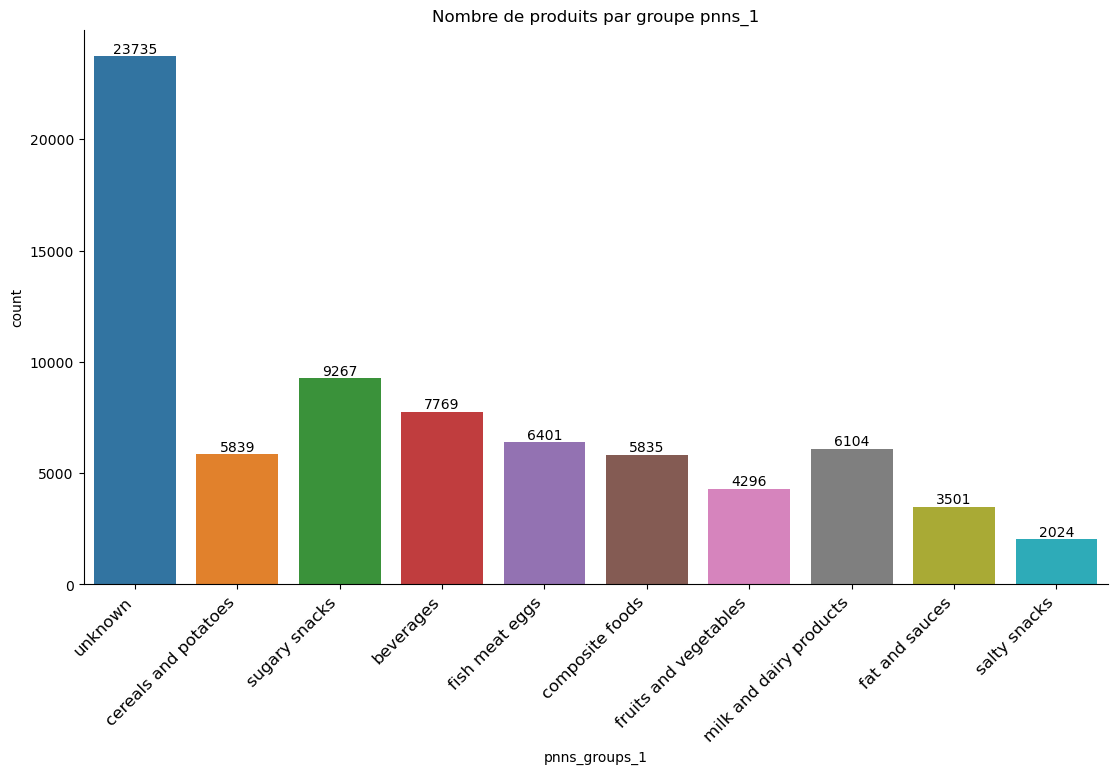

In [54]:
# Affichage du nombre de produits en fonction du groupe pnns_1
g = sns.catplot(x='pnns_groups_1', data=df2, kind='count', legend=True)
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.title('Nombre de produits par groupe pnns_1')
plt.show()


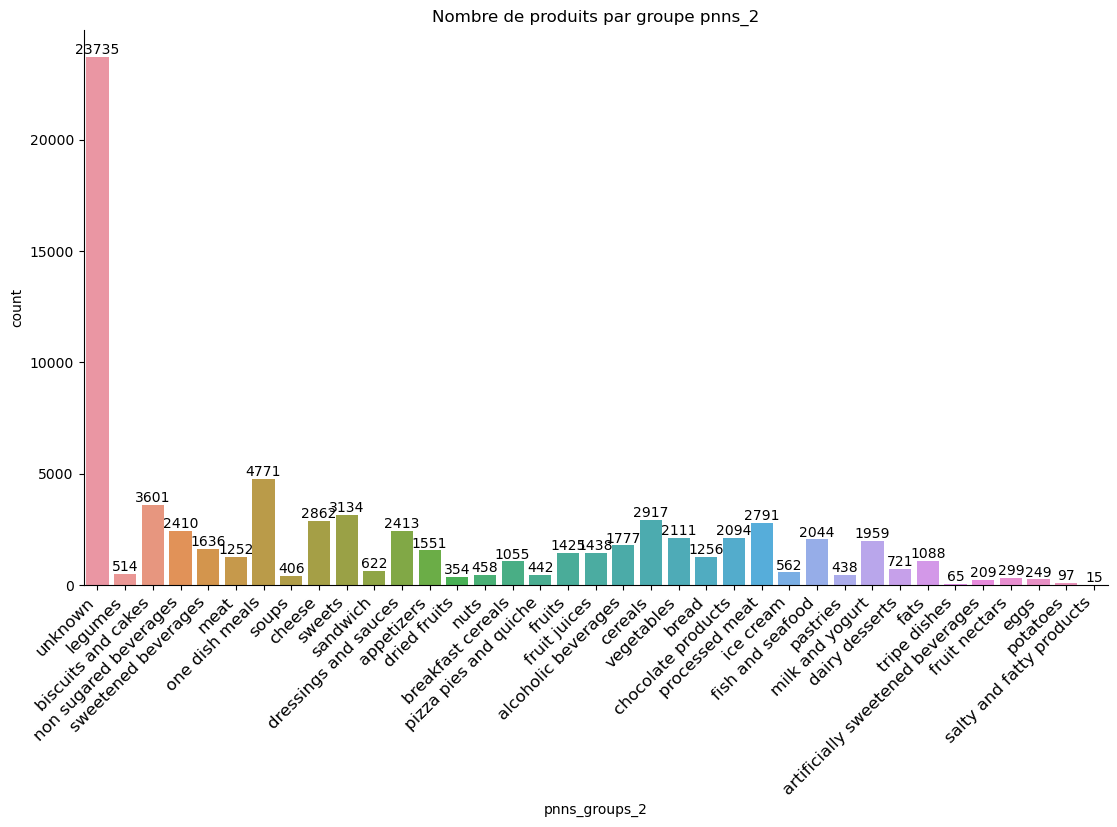

In [55]:
g = sns.catplot(x='pnns_groups_2', data=df2, kind='count', legend=True)
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.title('Nombre de produits par groupe pnns_2')
plt.show()


In [56]:
# Affichage des valeurs de la colonne categories_tags
df2['categories_tags'][:5]

106                                                  NaN
138                                                  NaN
182    en:plant-based-foods-and-beverages,en:plant-ba...
184    en:sugary-snacks,en:biscuits-and-cakes,en:bisc...
188    en:plant-based-foods-and-beverages,en:beverage...
Name: categories_tags, dtype: object

On remarque que chaque début de description commence par un groupe pnns_1.  
Cela va me permettre de réattribuer les groupes pnns_1 et 2 aux produits non classés.

In [57]:
# Je commencce par supprimer les produits qui n'ont aucune informations dans les colonnes categories, pnns_1 et 2.
df2.drop(df2.loc[(df2['categories_tags'].isna()) & (df2['pnns_groups_1']=='unknown') & (df2['pnns_groups_2']=='unknown')].index, inplace=True)

In [58]:
# Je commence par supprimer les termes qui indique la langue et les tirets 
df2['categories_tags']=df2['categories_tags'].str.replace('en:|fr:|de:|nl:|it:|es:','',regex=True);#|foods|based|and|plant
df2['categories_tags']=df2['categories_tags'].str.replace('-',' ',regex=True);
#df2['categories_tags']=df2['categories_tags'].replace(',  ,',',',regex=True);
df2['categories_tags']=df2['categories_tags'].replace(', ,',', ',regex=True);
df2['categories_tags']=df2['categories_tags'].str.replace('plant based foods and beverages,','')
df2['categories_tags']=df2['categories_tags'].str.replace('plant based foods,','')

In [59]:
df2['categories_tags']

182       cereals and potatoes,legumes and their product...
184        sugary snacks,biscuits and cakes,biscuits,sables
188       beverages,hot beverages,plant based beverages,...
189                              syrups,sirops pour ganache
226       beverages,carbonated drinks,sodas,colas,sugare...
                                ...                        
320751    cereals and potatoes,breads,zwieback,biscottes...
320758    spreads,breakfasts,sweet spreads,bee products,...
320761    beverages,alcoholic beverages,wines,french win...
320763    beverages,hot beverages,plant based beverages,...
320765    meats,spreads,prepared meats,salted spreads,ri...
Name: categories_tags, Length: 57517, dtype: object

In [60]:
# Imputation des produits du groupe beverages
# Groupe beverages :
# artificially sweetened beverages
df2.loc[(df2['categories_tags'].str.contains('artificially sweetened beverages|syrups|boissons',case=False)),'pnns_groups_2']='artificially sweetened beverages';

# non-sugared beverages
df2.loc[(df2['categories_tags'].str.contains('non sugared beverages&hot beverages',case=False))&(~df2['categories_tags'].str.contains('breakfast cereals',case=False)),'pnns_groups_2']='non-sugared beverages';

# sweetened beverages
df2.loc[(df2['categories_tags'].str.contains('sweetened beverages&carbonated drinks|thes glaces',case=False)),'pnns_groups_2']='sweetened beverages';

# alcoholic beverages:
df2.loc[(df2['categories_tags'].str.contains('alcoholic beverages|alcoholic|alcool',case=False)),'pnns_groups_2']='alcoholic beverages';

#fruit juices:
df2.loc[(df2['categories_tags'].str.contains('fruit  beverages',case=False))&(~df2['categories_tags'].str.contains('nectars',case=False)),'pnns_groups_2']='fruit juices';

#fruit nectars
df2.loc[(df2['categories_tags'].str.contains('fruit  beverages&nectars|juices  nectars',case=False)),'pnns_groups_2']='fruit nectars';


In [61]:
# Groupe cereals and potatoes:
# bread
df2.loc[(df2['categories_tags'].str.contains('breads|bread|pain',case=False))&(~df2['categories_tags'].str.contains('beverages',case=False))&(~df2['categories_tags'].str.contains('potatoes|cereals and potatoes',case=False)),'pnns_groups_2']='bread';

#breakfast cereals
df2.loc[(df2['categories_tags'].str.contains('breakfasts|biscottes',case=False))&(~df2['categories_tags'].str.contains('beverages',case=False)),'pnns_groups_2']='breakfast cereals';

#cereals
df2.loc[(df2['categories_tags'].str.contains('cereals  their products|cereals and their product|flours|levure|levures|pates|vermicelles',case=False)),'pnns_groups_2']='cereals';

#legumes
df2.loc[(df2['categories_tags'].str.contains('legumes  their products|legumes and their product|seeds',case=False)),'pnns_groups_2']='legumes';

#potatoes
df2.loc[(df2['categories_tags'].str.contains('purees|potatoes|pommes de terre|gnocchie|gnocchis|gnocchi|cereals and potatoes',case=False))&(~df2['categories_tags'].str.contains('vegetables|fresh vegetables|beverages|sugary snacks|nuts|pruneaux|meals&baby|appetizers|breakfasts|breads|legumes and their product')),'pnns_groups_2']='potatoes';

In [62]:
# Groupe composite foods
#one-dish meals
df2.loc[(df2['categories_tags'].str.contains('one dish meals meals|fries|entrees et snacks surgeles|frozen|tabbouleh|baby',case=False)),'pnns_groups_2']='one dish meals';
#pizza pies and quiche
df2.loc[(df2['categories_tags'].str.contains('meals pizzas pies  quiches|frozen pizzas|pie dough|pizza dough|pies|feuilles de brick|bouchees',case=False)),'pnns_groups_2']='pizza pies and quiche';
#sandwich
df2.loc[(df2['categories_tags'].str.contains('swiches',case=False)),'pnns_groups_2']='sandwich';

In [63]:
# Groupe fat and sauces
#dressings and sauces
df2.loc[(df2['categories_tags'].str.contains('groceries&sauces|vinegar|spices|sauce|sauces|groceries|creams for cooking|creams|vinaigre balsamique|spreads',case=False)),'pnns_groups_2']='dressings and sauces';
#fats
df2.loc[(df2['categories_tags'].str.contains('fats|spreadable fats|cremes vegetales',case=False)),'pnns_groups_2']='fats';

In [64]:
# Groupe fish meat eggs:
# eggs 
df2.loc[(df2['categories_tags'].str.contains('farming products&bird eggs|eggs',case=False)),'pnns_groups_2']='eggs';
# fish and seafood
df2.loc[(df2['categories_tags'].str.contains('seafood|Tentacules|poissons',case=False)),'pnns_groups_2']='fish and seafood';
#meat
df2.loc[(df2['categories_tags'].str.contains('meats|fresh meats|steaks|beef|duck gizzards|offals',case=False))&(~df2['categories_tags'].str.contains('baby|prepared meals')),'pnns_groups_2']='meat';
# processed meat
df2.loc[(df2['categories_tags'].str.contains('charcuteries|meats&prepared meats|foies gras|terrine',case=False)),'pnns_groups_2']='processed meat';
#tripe dishes
df2.loc[(df2['categories_tags'].str.contains('tripe dishes',case=False)),'pnns_groups_2']='tripe dishes';

In [65]:
# Groupe fruits and vegetables
# dried fruits
df2.loc[(df2['categories_tags'].str.contains('dried fruits|dried products',case=False)),'pnns_groups_2']='dried fruits';
#fruits
df2.loc[(df2['categories_tags'].str.contains('fruits  vegetables|pickles',case=False))&(~df2['categories_tags'].str.contains('soups|groceries|canned',case=False)),'pnns_groups_2']='fruits';
#soups
df2.loc[(df2['categories_tags'].str.contains('soups|soup',case=False)),'pnns_groups_2']='soups';
#vegetables
df2.loc[(df2['categories_tags'].str.contains('fruits vegetables&canned|canned foods',case=False))&(~df2['categories_tags'].str.contains('meals|seafood|poultry|canned meats|microwave meals|meals with meat|meat preparations|beef|dairies|breaded products|cereals potatoes',case=False)),'pnns_groups_2']='vegetables';

In [66]:
# Groupe milk and dairy products:
#cheese
df2.loc[(df2['categories_tags'].str.contains('dairies&cheeses|cheeses',case=False))|(df2['categories_fr'].str.contains('Fromages')),'pnns_groups_2']='cheese';

#dairy desserts
df2.loc[(df2['categories_tags'].str.contains('dairies&desserts|dairies|desserts',case=False)),'pnns_groups_2']='dairy desserts';

#ice cream
df2.loc[(df2['categories_tags'].str.contains('frozen desserts&ice creams|ice cream|frozen desserts',case=False)),'pnns_groups_2']='ice cream';

#milk and yogurt
df2.loc[(df2['categories_tags'].str.contains('milks|sour cream|yogurts',case=False)),'pnns_groups_2']='milk and yogurt';

In [67]:
# Groupe salty snacks
# appetizers
df2.loc[(df2['categories_tags'].str.contains('salty snacks&appetizers|appetizers',case=False))&(~df2['categories_tags'].str.contains('popcorn',case=False)),'pnns_groups_2']='appetizers';
#nuts
df2.loc[(df2['categories_tags'].str.contains('salty snacks&nuts',case=False)),'pnns_groups_2']='nuts';
#salty and fatty products
df2.loc[(df2['categories_tags'].str.contains('popcorn|salted spreads|chestnut spreads|salty snacks',case=False))&(~df2['categories_tags'].str.contains('appetizers',case=False)),'pnns_groups_2']='salty and fatty products';

In [68]:
# Groupe sugary snacks
# biscuits and cakes
df2.loc[(df2['categories_tags'].str.contains('sugary snacks&biscuits  cakes|bars|dietary supplements|sugary snacks|cereals for babies',case=False))&(~df2['categories_tags'].str.contains('confectioneries',case=False)),'pnns_groups_2']='biscuits and cakes';
#chocolate products
df2.loc[(df2['categories_tags'].str.contains('sugary snacks&chocolates|chocolates|tablette de chocolat|chocolat',case=False)),'pnns_groups_2']='chocolate products';
#pastries
df2.loc[(df2['categories_tags'].str.contains('sugary snacks&viennoiseries|crepes|waffles',case=False)),'pnns_groups_2']='pastries';
#sweets
df2.loc[(df2['categories_tags'].str.contains('sugary snacks&confectioneries|sugar substitutes|food additives|sweeteners|pate a sucre|confitures de lait|sirops pour ganache',case=False))&(~df2['categories_tags'].str.contains('levures|flours',case=False)),'pnns_groups_2']='sweets';

In [69]:
# J'attribue le groupe Pnns_groups_1 en fonction du groupe pnns_2
# beverages
df2.loc[(df2['pnns_groups_2'].str.contains('artificially sweetened beverages|non-sugared beverages|sweetened beverages|alcoholic beverages|fruit juices|fruit nectars')),'pnns_groups_1']='beverages';

#cereals and potatoes
df2.loc[(df2['pnns_groups_2'].str.contains('bread|breakfast cereals|cereals|legumes|potatoes')),'pnns_groups_1']='cereals and potatoes';

#composite foods
df2.loc[(df2['pnns_groups_2'].str.contains('one dish meals|pizza pies and quiche|sandwich')),'pnns_groups_1']='composite foods';

# fat and sauces
df2.loc[(df2['pnns_groups_2'].str.contains('dressings and sauces|fats')),'pnns_groups_1']='fat and sauces';

#fish meat eggs
df2.loc[(df2['pnns_groups_2'].str.contains('eggs|fish and seafood|meat|processed meat|tripe dishes')),'pnns_groups_1']='fish meat eggs';

#fruits and vegetables
df2.loc[(df2['pnns_groups_2'].str.contains('dried fruits|fruits|soups|vegetables')),'pnns_groups_1']='fruits and vegetables';

# milk and dairy products
df2.loc[(df2['pnns_groups_2'].str.contains('cheese|dairy desserts|ice cream|milk and yogurt')),'pnns_groups_1']='milk and dairy products';

# salty snacks
df2.loc[(df2['pnns_groups_2'].str.contains('appetizers|nuts|salty and fatty products')),'pnns_groups_1']='salty snacks';

#
df2.loc[(df2['pnns_groups_2'].str.contains('biscuits and cakes|pastries|chocolate products|sweets')),'pnns_groups_1']='sugary snacks';


In [70]:
print(df2.loc[df2['pnns_groups_1']=='unknown']['categories_tags'].count())
print(df2.loc[df2['pnns_groups_2']=='unknown']['categories_tags'].count())

1352
1352


Cette procédure m'a permis de passer de :
- pnns_groups_1 :   15967 unknown
- pnns_groups_2 :   14125 unknown  

à:  
- pnns_groups_1 :   1362 unknown
- pnns_groups_2 :   1362 unknown  

In [71]:
# Je supprime les produits unknown restant
df2.drop(df2.loc[(df2['pnns_groups_1']=='unknown') & (df2['pnns_groups_2']=='unknown')].index, inplace=True)

In [72]:
df2.shape

(56165, 31)

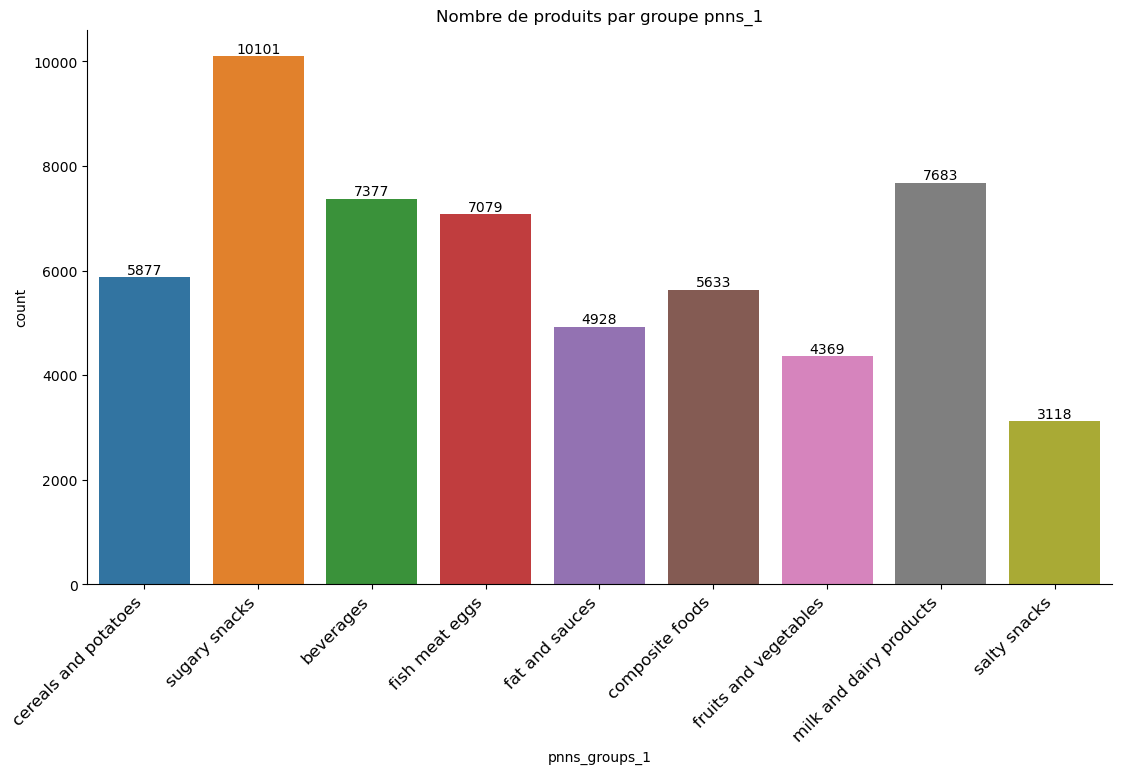

In [73]:
g = sns.catplot(x='pnns_groups_1', data=df2, kind='count', legend=True)
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.title('Nombre de produits par groupe pnns_1')
plt.show()


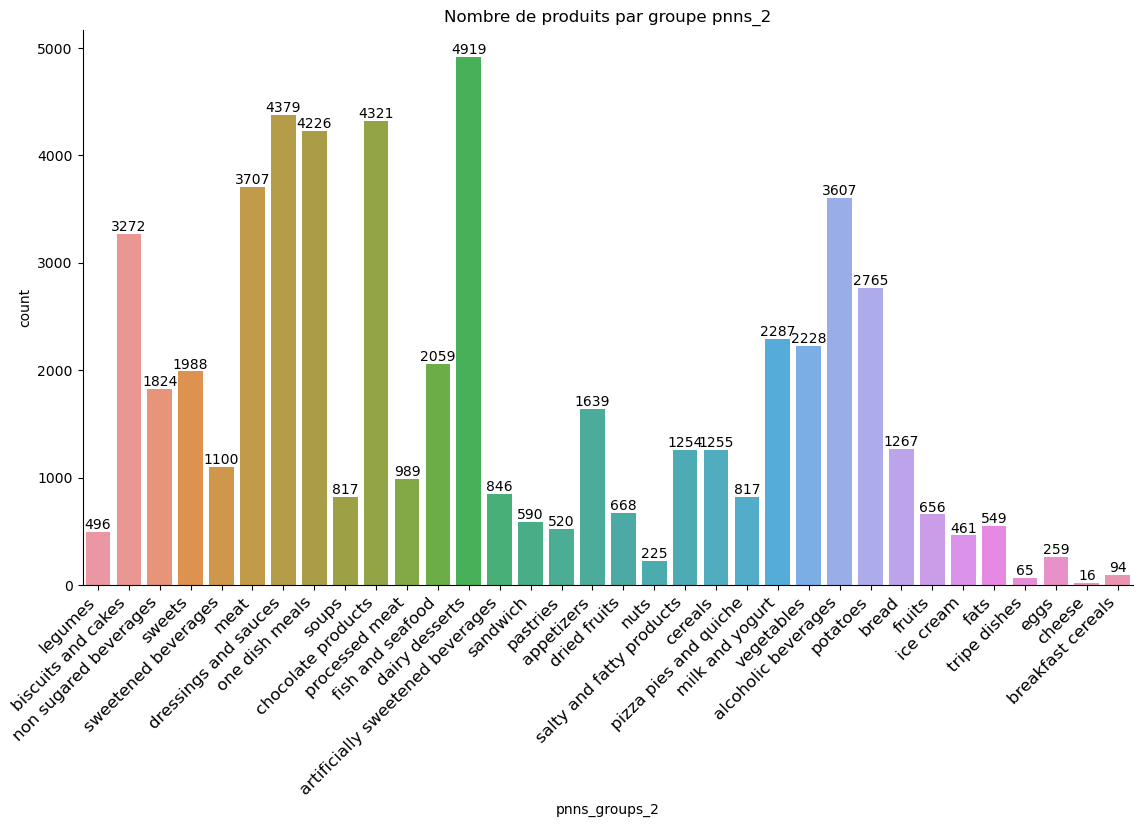

In [74]:
g = sns.catplot(x='pnns_groups_2', data=df2, kind='count', legend=True)
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.title('Nombre de produits par groupe pnns_2')
plt.show()


In [75]:
# Je crée une nouvelle copie de mon df 
df3 = df2.copy()

In [76]:
df3

code                                      categories_fr  \
182     0000005200016  Aliments et boissons à base de végétaux,Alimen...   
184     0000007730009  Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés   
188     0000010090206  Aliments et boissons à base de végétaux,Boisso...   
189     0000010127735                         Sirops,Sirops-pour-ganache   
226     0000040608754  Boissons,Boissons gazeuses,Sodas,Sodas au cola...   
...               ...                                                ...   
320751  9847548283004  Aliments et boissons à base de végétaux,Alimen...   
320758  9900010011557  Produits à tartiner,Petit-déjeuners,Produits à...   
320761  9906410000009  Boissons,Boissons alcoolisées,Vins,Vins frança...   
320763       99111250  Aliments et boissons à base de végétaux,Boisso...   
320765  9935010000003  Viandes,Produits à tartiner,Charcuteries,Produ...   

                                                labels_fr countries_fr  \
182            Bio,Bio européen,AB Agriculture Biologique       France   
184                                            Point Vert       France   
188                                                   NaN       France   
189                                                   NaN       France   
226                                                   NaN       France   
...                                                   ...          ...   
320751  Bio,Bio européen,Sans gluten,AB Agriculture Bi...       France   
320758                                                NaN       France   
320761                                                AOC       France   
320763  Commerce équitable,Bio,Bio européen,Max Havela...       France   
320765                                                NaN       France   

                           allergens  \
182                              NaN   
184     Blé, Beurre, Oeufs, Noisette   
188                              NaN   
189                              NaN   
226                              NaN   
...                              ...   
320751                           NaN   
320758                           NaN   
320761                           NaN   
320763                           NaN   
320765                           NaN   

                                                traces_fr nutrition_grade_fr  \
182                                                   NaN                NaN   
184                 Fruits à coque,Graines de sésame,Soja                NaN   
188     Œufs,Gluten,Lait,Moutarde,Fruits à coque,Grain...                NaN   
189                                                   NaN                NaN   
226                                                   NaN                  e   
...                                                   ...                ...   
320751                                                NaN                  a   
320758                                                NaN                NaN   
320761                    Anhydride sulfureux et sulfites                NaN   
320763                                                NaN                  c   
320765                                                NaN                NaN   

                                                states_fr  \
182     A compléter,Informations nutritionnelles à com...   
184     A vérifier,Complet,Informations nutritionnelle...   
188     A vérifier,Complet,Informations nutritionnelle...   
189     A vérifier,Complet,Informations nutritionnelle...   
226     A vérifier,Complet,Informations nutritionnelle...   
...                                                   ...   
320751  A compléter,Informations nutritionnelles compl...   
320758  A compléter,Informations nutritionnelles compl...   
320761  A compléter,Informations nutritionnelles compl...   
320763  A vérifier,Complet,Informations nutritionnelle...   
320765  A vérifier,Complet,Informations nutritionnelle...   

                               main_cate

In [77]:
# J'affiche la moyenne des valeurs manquantes 
df3[['categories_tags','energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']].isna().mean()

categories_tags       0.000000
energy_100g           0.170284
fat_100g              0.213888
saturated-fat_100g    0.206979
carbohydrates_100g    0.221294
fiber_100g            0.483379
proteins_100g         0.174682
salt_100g             0.203864
sodium_100g           0.203899
dtype: float64

In [78]:
# Je supprime les lignes qui contiennent des valeurs manquantes en fixant le seuil à 8
df3.dropna(subset=['categories_tags','energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'], thresh=8, inplace=True)

In [79]:
df3[['categories_tags','energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']].isna().mean()

categories_tags       0.000000
energy_100g           0.000240
fat_100g              0.001896
saturated-fat_100g    0.003480
carbohydrates_100g    0.002880
fiber_100g            0.372063
proteins_100g         0.000888
salt_100g             0.000000
sodium_100g           0.000000
dtype: float64

In [80]:
df_clean = df3.copy()

In [81]:
df_clean.describe()

nutrition-score-fr_100g   additives_n   energy_100g      fat_100g  \
count             40991.000000  38859.000000  41655.000000  41586.000000   
mean                  8.463297      2.075092   1102.252418     13.343986   
std                   9.058255      2.624338    782.722730     16.977439   
min                 -15.000000      0.000000      0.000000      0.000000   
25%                   1.000000      0.000000    418.000000      1.300000   
50%                   8.000000      1.000000   1016.000000      6.800000   
75%                  15.000000      3.000000   1643.000000     21.000000   
max                  40.000000     31.000000  18700.000000    380.000000   

       saturated-fat_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count        41520.000000        41545.000000  41474.000000  26163.000000   
mean             5.357750           27.565080     12.684686      2.730773   
std              8.189044           27.253265     18.242018      3.765663   
min              0.000000            0.000000     -0.100000      0.000000   
25%              0.300000            4.000000      1.000000      0.500000   
50%              2.000000           14.200000      3.800000      1.800000   
75%              7.500000           53.000000     16.000000      3.500000   
max            210.000000          190.000000    104.000000     86.200000   

       proteins_100g     salt_100g   sodium_100g  alcohol_100g  polyols_100g  
count   41628.000000  41665.000000  41665.000000    575.000000    285.000000  
mean        7.620226      1.070438      0.421223      0.427357     49.659719  
std         7.280203      3.748401      1.475681      1.762233     33.700166  
min         0.000000      0.000000      0.000000      0.000000      0.000000  
25%         1.900000      0.080000      0.030000      0.000000     17.300000  
50%         6.000000      0.600000      0.240000      0.000000     59.800000  
75%        10.800000      1.250000      0.490000      0.000000     70.200000  
max        86.000000    211.000000     83.000000     20.000000    100.000000

On remarque dans les colonnes '_100g' la présence d'outliers.  

In [82]:
# Je retire les lignes dont les valeurs sont inférieures à 0 et supérieures à 100 (excepté energy : 3900)
df_clean.drop(df_clean.loc[(df_clean['fat_100g']>100.0) | (df_clean['energy_100g']>3900.0) |(df_clean['carbohydrates_100g']>100.0) | (df_clean['fiber_100g']>100.0)| (df_clean['salt_100g']>100.1) ].index,inplace=True)

In [83]:
df_clean.describe()

nutrition-score-fr_100g   additives_n   energy_100g      fat_100g  \
count             40974.000000  38844.000000  41637.000000  41568.000000   
mean                  8.459706      2.075507   1100.241456     13.330206   
std                   9.056653      2.624475    770.319636     16.871134   
min                 -15.000000      0.000000      0.000000      0.000000   
25%                   1.000000      0.000000    417.000000      1.300000   
50%                   8.000000      1.000000   1016.000000      6.800000   
75%                  15.000000      3.000000   1643.000000     21.000000   
max                  40.000000     31.000000   3772.000000    100.000000   

       saturated-fat_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count        41502.000000        41527.000000  41456.000000  26151.000000   
mean             5.352447           27.551250     12.678309      2.731336   
std              8.126616           27.229653     18.230322      3.765994   
min              0.000000            0.000000     -0.100000      0.000000   
25%              0.300000            4.000000      1.000000      0.500000   
50%              2.000000           14.200000      3.800000      1.800000   
75%              7.500000           53.000000     16.000000      3.500000   
max            100.000000          100.000000    100.000000     86.200000   

       proteins_100g     salt_100g   sodium_100g  alcohol_100g  polyols_100g  
count   41610.000000  41647.000000  41647.000000    575.000000    285.000000  
mean        7.620093      1.061911      0.417867      0.427357     49.659719  
std         7.279553      3.552130      1.398507      1.762233     33.700166  
min         0.000000      0.000000      0.000000      0.000000      0.000000  
25%         1.900000      0.080000      0.030000      0.000000     17.300000  
50%         6.000000      0.600000      0.240000      0.000000     59.800000  
75%        10.800000      1.250000      0.490000      0.000000     70.200000  
max        86.000000    100.000000     39.370000     20.000000    100.000000

# Traitement des valeurs manquantes pour les colonnes "_100g"

# Colonne Energy_100g

Cette colonne indique les Kjoul contenus dans une proportion de 100g.  

J'ai trouvé la formule de calcul des Kjoul pour 100g sur ce site :  
https://jmmanger.fr/JM-savoir/energie-kj  

Pour obtenir la valeur il suffit d'appliquer cette formule :  

**E KJ = (37 x lipides) + (29 x alcool) + (17 x protéines) + (17 x glucides sauf polyols) + (13 x acides organiques) + (10 x polyols) + (8 x fibres)**  



In [84]:
# Je retire les colonnes "_100g" qui ne serviront pas dans le calcul de la colonne "energy_100g"
df3 = df_clean[['code', 'categories_fr', 'labels_fr', 'countries_fr', 'allergens',
       'traces_fr', 'nutrition_grade_fr', 'states_fr', 'main_category_fr',
       'nutrition-score-fr_100g', 'product_name', 'generic_name', 'quantity',
       'additives_n', 'additives','additives_tags', 'packaging_tags', 'categories_tags', 'pnns_groups_1', 'pnns_groups_2',
        'energy_100g','fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g','alcohol_100g', 'polyols_100g']].copy()

In [85]:
df3.shape

(41647, 27)

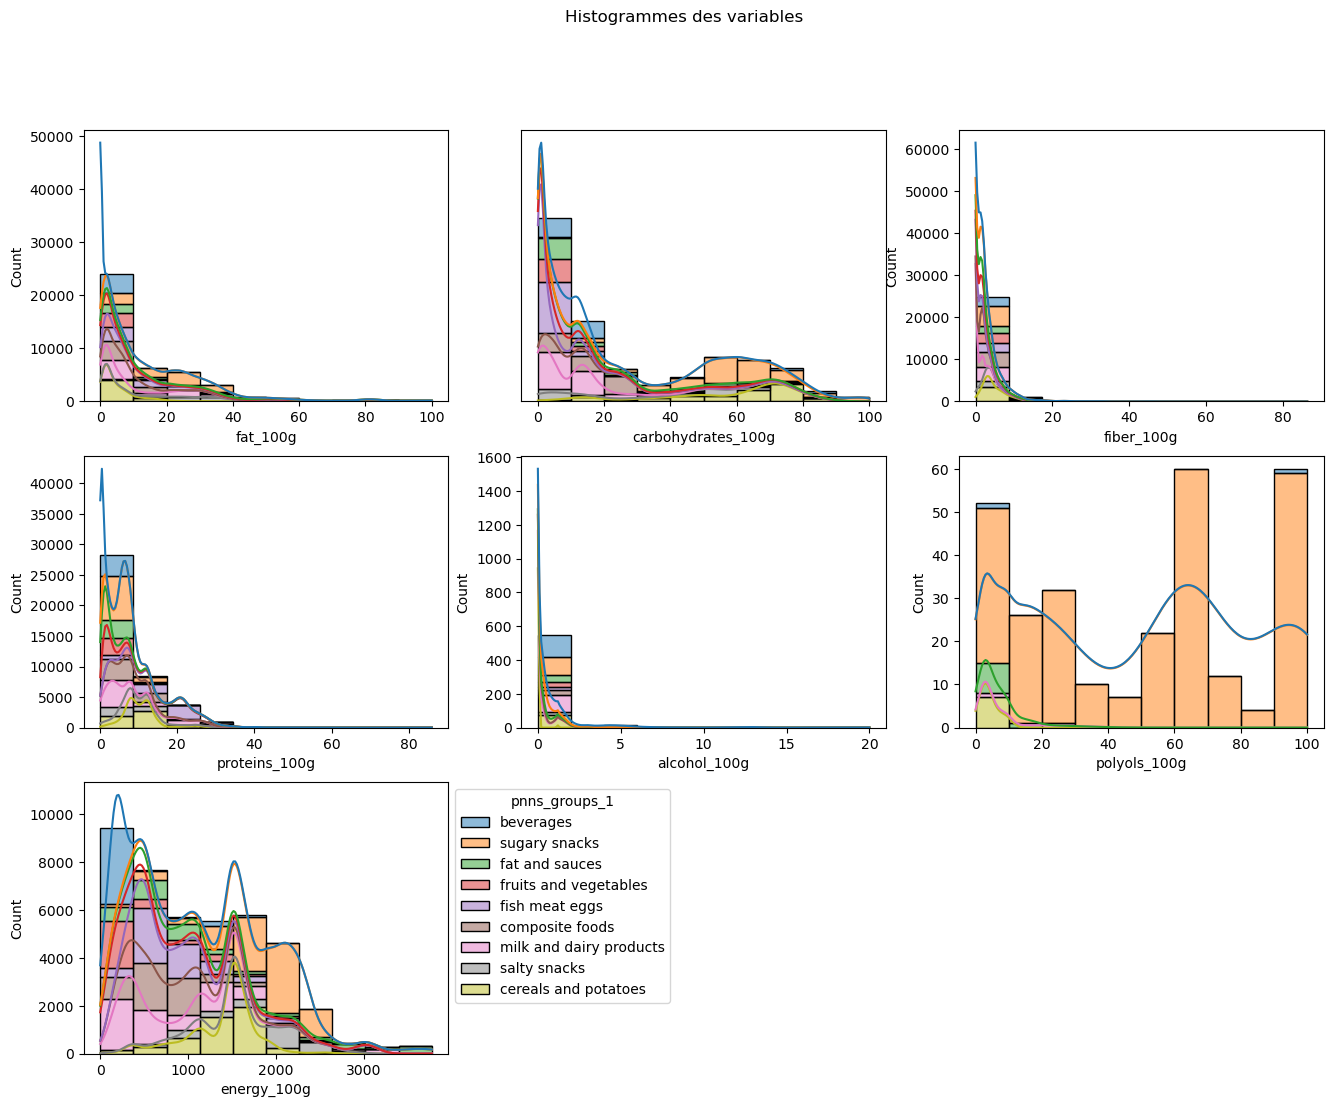

In [86]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

fig.suptitle('Histogrammes des variables')

sns.histplot(ax=axes[0, 0],data=df3, x='fat_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False, kde=True)

sns.histplot(ax=axes[0, 1],data=df3, x='carbohydrates_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False, kde=True)
axes[0, 1].get_yaxis().set_visible(False)

sns.histplot(ax=axes[0, 2],data=df3, x='fiber_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False, kde=True)
sns.histplot(ax=axes[1, 0],data=df3, x='proteins_100g',hue='pnns_groups_1', bins=10, multiple='stack',legend=False, kde=True)


sns.histplot(ax=axes[1, 1],data=df3, x='alcohol_100g',hue='pnns_groups_1', bins=10, multiple='stack',legend=False, kde=True)
sns.histplot(ax=axes[1, 2],data=df3, x='polyols_100g',hue='pnns_groups_1', bins=10, multiple='stack',legend=False, kde=True)
sns.histplot(ax=axes[2, 0],data=df3, x='energy_100g',hue='pnns_groups_1', bins=10, multiple='stack',kde=True)
sns.move_legend(axes[2, 0], "best", bbox_to_anchor=(1, 1))


fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.show()

## Colonne acide_organique

Il me manque la colonne acides organiques mais je peux savoir si un produit en contient grace à la colonne **additives_tags**.


* acide acétique : E260  
* acide lactique : E270
* acide citrique : E330
* Acide gluconique : E574
* Acide fumarique :E297
* Acide malique : E296
* Acide tartrique : E334
* Acide propionique : E280

D'après ce lien, la quantité max d'acides organiques pour 100g est de 9.4g
https://www.laurentberta.com/aliment/top-aliments-plus-riches-acides-organiques

In [87]:
df3.head(10)

code                                      categories_fr  \
226  0000040608754  Boissons,Boissons gazeuses,Sodas,Sodas au cola...   
240  0000087177756  Aliments et boissons à base de végétaux,Boisso...   
242         000010  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
279         000030  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
283         000031  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
299         000050  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
301         000051  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
428         000104  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
452       00011501  Aliments et boissons à base de végétaux,Alimen...   
454       00011693  Snacks sucrés,Biscuits et gâteaux,Biscuits,Coo...   

                                             labels_fr        countries_fr  \
226                                                NaN              France   
240                                                NaN              France   
242                                                NaN              France   
279                      Point Vert,Fabriqué en France              France   
283                      Point Vert,Fabriqué en France              France   
299                      Point Vert,Fabriqué en France              France   
301                      Point Vert,Fabriqué en France              France   
428                                                NaN              France   
452  en:Point-vert,en:Sans-aromes-artificiels,en:Sa...  France,Royaume-Uni   
454                                         Végétarien  France,Royaume-Uni   

                                allergens            traces_fr  \
226                                   NaN                  NaN   
240                                   NaN                  NaN   
242                 blé, oeufs, blé, lait  Fruits à coque,Soja   
279                  blé, œufs, blé, lait  Fruits à coque,Soja   
283                                   NaN  Fruits à coque,Soja   
299  œufs, amande, beurre, blé, œufs, blé  Fruits à coque,Soja   
301  œufs, amande, beurre, blé, œufs, blé  Fruits à coque,Soja   
428                                   NaN  Fruits à coque,Soja   
452                                   NaN                  NaN   
454                                   NaN                  NaN   

    nutrition_grade_fr                                          states_fr  \
226                  e  A vérifier,Complet,Informations nutritionnelle...   
240                  e  A vérifier,Complet,Informations nutritionnelle...   
242                  d  A vérifier,Complet,Informations nutritionnelle...   
279                  d  A vérifier,Complet,Informations nutritionnelle...   
283                  d  A vérifier,Complet,Informations nutritionnelle...   
299                  e  A vérifier,Complet,Informations nutritionnelle...   
301                  e  A vérifier,Complet,Informations nutritionnelle...   
428                  d  A vérifier,Complet,Informations nutritionnelle...   
452                  d  A vérifier,Complet,Informations nutritionnelle...   
454                  e  A compléter,Informations nutritionnelles compl...   

     main_category_fr  nutrition-score-fr_100g  \
226             Sodas                       13   
240  Sodas aux fruits                       13   
242           Gâteaux                       12   
279           Gâteaux                       13   
283       Pâtisseries                       12   
299       Pâtisseries                       22   
301       Pâtisseries                       22   
428           Gâteaux                       13   
452        Condiments                       14   
454           Cookies                       26   

                                        product_name  \
226                            Pepsi, Nouveau goût !   
240                                              7Up   
242                                Madeleines nature   
2

In [88]:
# Je sélectionne tous les produits qui contiennent les additifs correspondant aux acides organiques
df3.loc[(~df3['additives_tags'].isna()) &(df3['additives_tags'].str.contains('e260|e270|e330|e574|e297|e296|e334|e280'))][['pnns_groups_1','pnns_groups_2','additives_tags']]

pnns_groups_1         pnns_groups_2  \
240          beverages   sweetened beverages   
283      sugary snacks    biscuits and cakes   
301      sugary snacks    biscuits and cakes   
428      sugary snacks    biscuits and cakes   
652     fish meat eggs      fish and seafood   
...                ...                   ...   
320603  fat and sauces  dressings and sauces   
320604  fat and sauces  dressings and sauces   
320611  fat and sauces  dressings and sauces   
320626       beverages   sweetened beverages   
320702   sugary snacks                sweets   

                                           additives_tags  
240                               en:e330,en:e296,en:e331  
283     en:e202,en:e220,en:e150a,en:e120,en:e133,en:e3...  
301     en:e401,en:e330,en:e332,en:e341,en:e100,en:e42...  
428     en:e440,en:e330,en:e331,en:e202,en:e422,en:e50...  
652                                               en:e334  
...                                                   ...  
320603                  en:e150c,en:e150d,en:e260,en:e270  
320604  en:e150a,en:e150c,en:e260,en:e270,en:e1422,en:...  
320611                           en:e260,en:e150c,en:e440  
320626                           en:e330,en:e300,en:e150d  
320702           en:e420,en:e955,en:e950,en:e470b,en:e330  

[7318 rows x 3 columns]

**7318** produits contiennent des acides organiques.

In [89]:
acide_graph = df3.loc[(~df3['additives_tags'].isna()) &(df3['additives_tags'].str.contains('e260|e270|e330|e574|e297|e296|e334|e280'))][['pnns_groups_1','pnns_groups_2','additives_tags']]

In [90]:
acide_graph

pnns_groups_1         pnns_groups_2  \
240          beverages   sweetened beverages   
283      sugary snacks    biscuits and cakes   
301      sugary snacks    biscuits and cakes   
428      sugary snacks    biscuits and cakes   
652     fish meat eggs      fish and seafood   
...                ...                   ...   
320603  fat and sauces  dressings and sauces   
320604  fat and sauces  dressings and sauces   
320611  fat and sauces  dressings and sauces   
320626       beverages   sweetened beverages   
320702   sugary snacks                sweets   

                                           additives_tags  
240                               en:e330,en:e296,en:e331  
283     en:e202,en:e220,en:e150a,en:e120,en:e133,en:e3...  
301     en:e401,en:e330,en:e332,en:e341,en:e100,en:e42...  
428     en:e440,en:e330,en:e331,en:e202,en:e422,en:e50...  
652                                               en:e334  
...                                                   ...  
320603                  en:e150c,en:e150d,en:e260,en:e270  
320604  en:e150a,en:e150c,en:e260,en:e270,en:e1422,en:...  
320611                           en:e260,en:e150c,en:e440  
320626                           en:e330,en:e300,en:e150d  
320702           en:e420,en:e955,en:e950,en:e470b,en:e330  

[7318 rows x 3 columns]

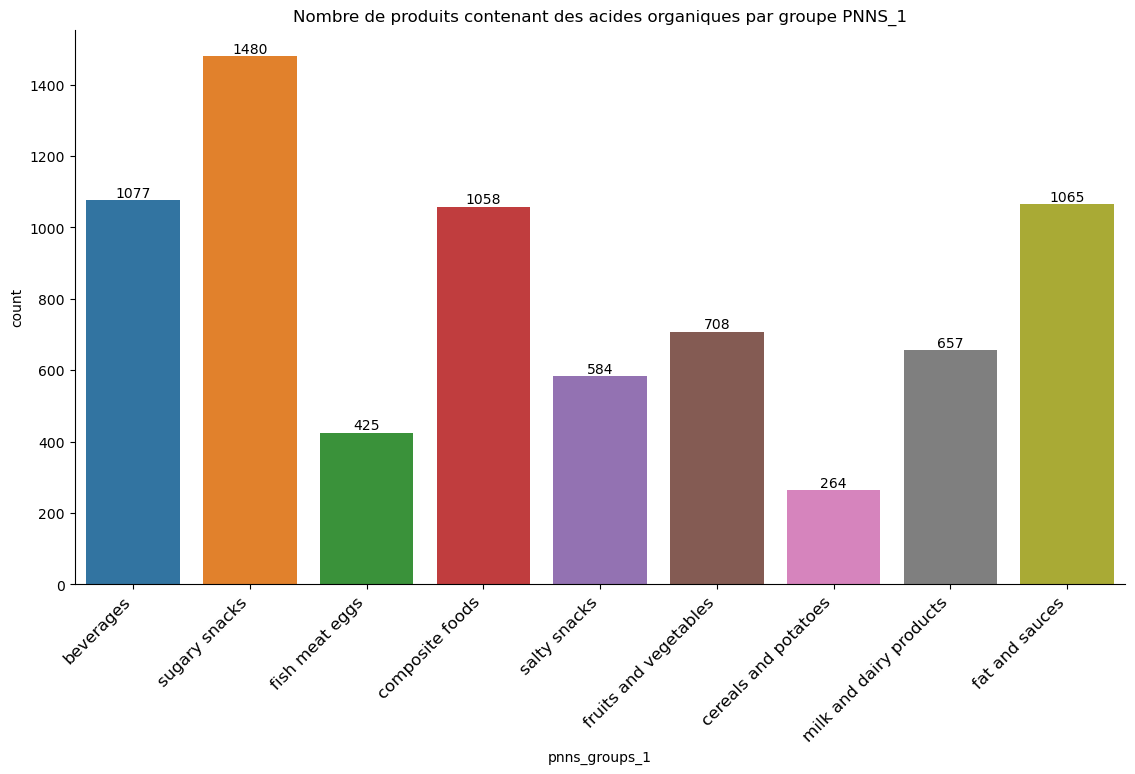

In [91]:
g = sns.catplot(x='pnns_groups_1', data=acide_graph, kind='count', legend=True)
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.title('Nombre de produits contenant des acides organiques par groupe PNNS_1')
plt.show()


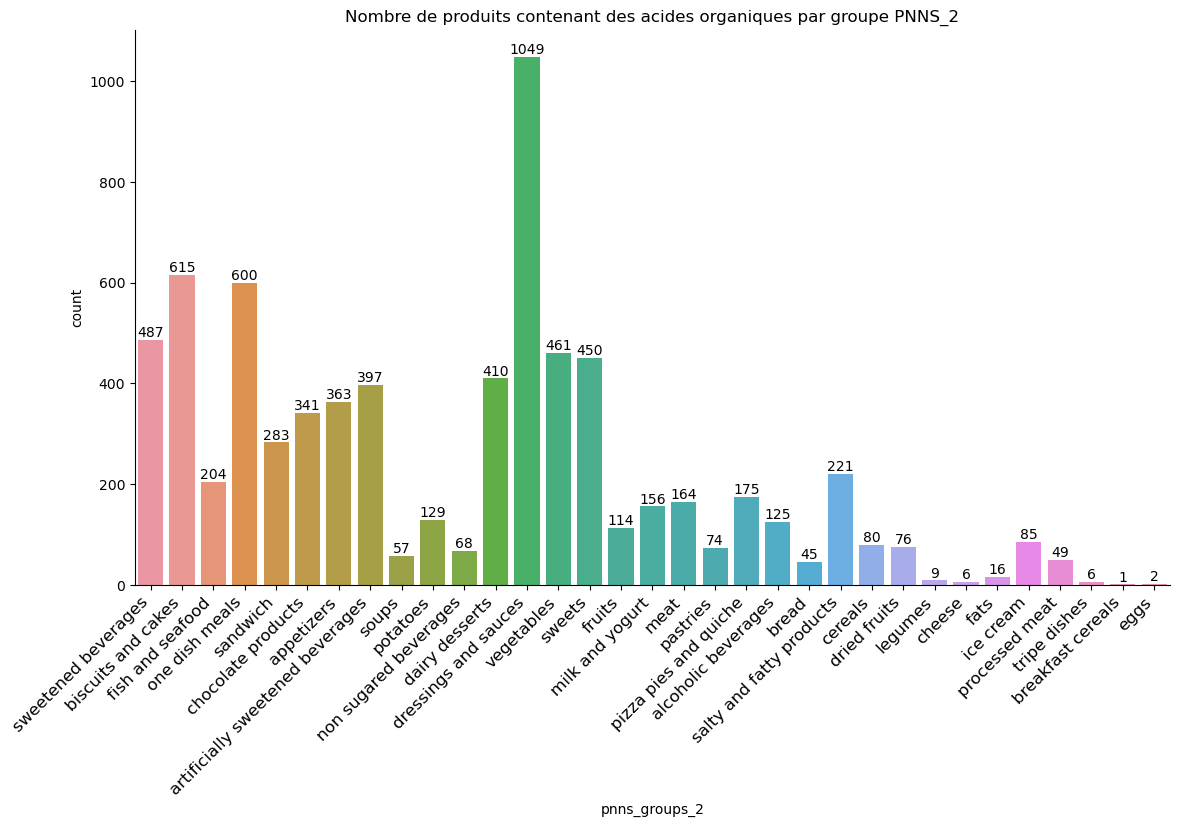

In [92]:
g = sns.catplot(x='pnns_groups_2', data=acide_graph, kind='count', legend=True)
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.title('Nombre de produits contenant des acides organiques par groupe PNNS_2')
plt.show()


In [93]:
# Création d'une liste comprenant les différentes valeurs d'acides organiques par groupe pnns_1 
# lien:  https://www.laurentberta.com/aliment/top-aliments-plus-riches-acides-organiques

beverages_mean = [4.9,9,4.8,4.5,2,1.7,1.36,1.3,1.3,1.28,1.21,1.13,1,0.91,0.9,0.88,0.8,0.8,0.8,0.8,0.8]
sugary_mean = [2.4,0.82] 
fat_mean = [5.9,5.16,3.02,1.82,1.5,1.5,1.42,1.39,1,1,1,0.8,0.8] 
fruits_mean =[9.4,4.88,4.7,3.5,3.5,2.63,2.38,2.12,1.9,1.6,1.49,1.48,1.4,1.4,1.37,1.27,1.26,1.1,1.05,0.97,0.95,0.9] 
composite_mean =[1.66,1.47,1.47,1.16,0.97] 
milk_mean = [2.65,1.5,1.42,1.41,1.21,1.17,1.16,1.04,1.03,1.03,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.98,0.9,0.85] 
cereals_mean = [0.61,0.58,0.57,0.49,0.46] 
fish_mean = [2.63,1.69,1.54,1.1,1.02] 
salty_mean= [1.35,0.48,0.39,0.14,0.11,0.05] 


In [94]:
# Création d'une fonction pour obtenir la moyenne d'une liste
def moyenne(lst):
    return sum(lst) / len(lst)

In [95]:
# Je sélectionne les produits qui contiennent des acides organiques en attribuant la valeur 999
df3['acide_org'] = np.where(df3['additives_tags'].str.contains('e260|e270|e330|e574|e297|e296|e334|e280'), 999, 0)

In [96]:
df3['acide_org'].value_counts()

999    24570
0      17077
Name: acide_org, dtype: int64

In [97]:
# Je crée une fonction afin d'imputer mes valeurs par la moyenne dans la colonne acide en fonction du groupe pnns
def isna_acide(df,col,col1,value,old_value,new_value):
    df.loc[(df[col]==old_value)&(df[col1]==value),col] = df.loc[(df[col]==old_value)&(df[col1]==value),col]= new_value

In [98]:
# J'applique ma fonction sur chaque groupe pnns_1
isna_acide(df3,'acide_org','pnns_groups_1','beverages',999,moyenne(beverages_mean));
isna_acide(df3,'acide_org','pnns_groups_1','sugary snacks',999,moyenne(sugary_mean));
isna_acide(df3,'acide_org','pnns_groups_1','fat and sauces',999,moyenne(fat_mean));
isna_acide(df3,'acide_org','pnns_groups_1','fruits and vegetables',999,moyenne(fruits_mean));
isna_acide(df3,'acide_org','pnns_groups_1','composite foods',999,moyenne(composite_mean));
isna_acide(df3,'acide_org','pnns_groups_1','milk and dairy products',999,moyenne(milk_mean));
isna_acide(df3,'acide_org','pnns_groups_1','cereals and potatoes',999,moyenne(cereals_mean));
isna_acide(df3,'acide_org','pnns_groups_1','fish meat eggs',999,moyenne(fish_mean));
isna_acide(df3,'acide_org','pnns_groups_1','salty snacks',999,moyenne(salty_mean));

In [99]:
# J'arrondi les valeurs de la colonne acide à deux chiffres après la virgule
df3['acide_org'] = df3['acide_org'].astype('float').round(2)

In [100]:
df3.head(10)

code                                      categories_fr  \
226  0000040608754  Boissons,Boissons gazeuses,Sodas,Sodas au cola...   
240  0000087177756  Aliments et boissons à base de végétaux,Boisso...   
242         000010  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
279         000030  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
283         000031  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
299         000050  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
301         000051  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
428         000104  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
452       00011501  Aliments et boissons à base de végétaux,Alimen...   
454       00011693  Snacks sucrés,Biscuits et gâteaux,Biscuits,Coo...   

                                             labels_fr        countries_fr  \
226                                                NaN              France   
240                                                NaN              France   
242                                                NaN              France   
279                      Point Vert,Fabriqué en France              France   
283                      Point Vert,Fabriqué en France              France   
299                      Point Vert,Fabriqué en France              France   
301                      Point Vert,Fabriqué en France              France   
428                                                NaN              France   
452  en:Point-vert,en:Sans-aromes-artificiels,en:Sa...  France,Royaume-Uni   
454                                         Végétarien  France,Royaume-Uni   

                                allergens            traces_fr  \
226                                   NaN                  NaN   
240                                   NaN                  NaN   
242                 blé, oeufs, blé, lait  Fruits à coque,Soja   
279                  blé, œufs, blé, lait  Fruits à coque,Soja   
283                                   NaN  Fruits à coque,Soja   
299  œufs, amande, beurre, blé, œufs, blé  Fruits à coque,Soja   
301  œufs, amande, beurre, blé, œufs, blé  Fruits à coque,Soja   
428                                   NaN  Fruits à coque,Soja   
452                                   NaN                  NaN   
454                                   NaN                  NaN   

    nutrition_grade_fr                                          states_fr  \
226                  e  A vérifier,Complet,Informations nutritionnelle...   
240                  e  A vérifier,Complet,Informations nutritionnelle...   
242                  d  A vérifier,Complet,Informations nutritionnelle...   
279                  d  A vérifier,Complet,Informations nutritionnelle...   
283                  d  A vérifier,Complet,Informations nutritionnelle...   
299                  e  A vérifier,Complet,Informations nutritionnelle...   
301                  e  A vérifier,Complet,Informations nutritionnelle...   
428                  d  A vérifier,Complet,Informations nutritionnelle...   
452                  d  A vérifier,Complet,Informations nutritionnelle...   
454                  e  A compléter,Informations nutritionnelles compl...   

     main_category_fr  nutrition-score-fr_100g  \
226             Sodas                       13   
240  Sodas aux fruits                       13   
242           Gâteaux                       12   
279           Gâteaux                       13   
283       Pâtisseries                       12   
299       Pâtisseries                       22   
301       Pâtisseries                       22   
428           Gâteaux                       13   
452        Condiments                       14   
454           Cookies                       26   

                                        product_name  \
226                            Pepsi, Nouveau goût !   
240                                              7Up   
242                                Madeleines nature   
2

In [101]:
df3['acide_org'].head()

226    0.00
240    2.01
242    0.00
279    0.00
283    1.61
Name: acide_org, dtype: float64

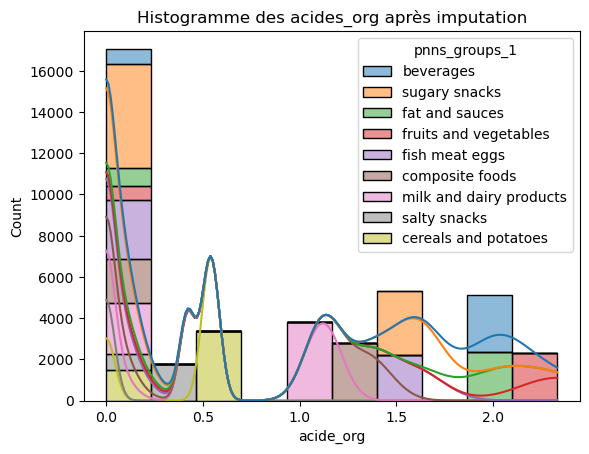

In [102]:
sns.histplot(data=df3, x='acide_org',hue='pnns_groups_1', bins=10, multiple='stack', legend=True, kde=True)
plt.title('Histogramme des acides_org après imputation')
plt.show()

## Colonne alcohol_100g

https://biorganic.blog/2018/05/28/2-576-aliments-riches-alcool-ethyl-ethanol-e1510/  
La plus grande quantité est de 42,5g (bouteille de whisky, gin,rhum) et la plus petite est 0.3g (bierre sans alcool)

In [103]:
df3['alcohol_100g'].isna().mean()

0.986193483324129

Text(0.5, 1.0, "Histogramme de la variable alcohol_100g sur l'ensemble des produits avant imputation")

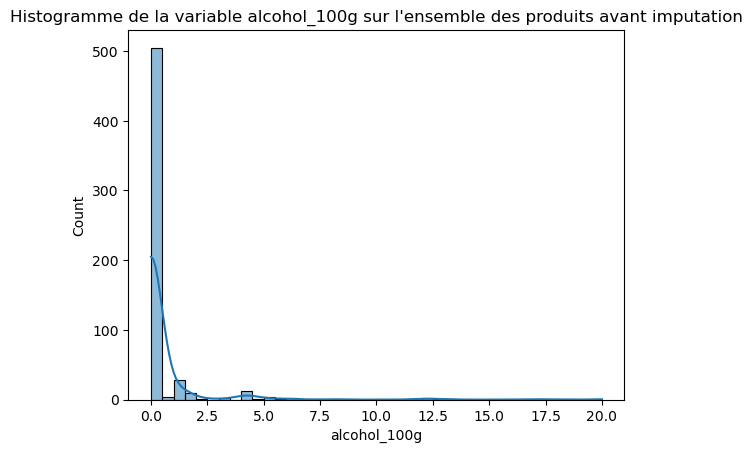

In [104]:
sns.histplot(df3['alcohol_100g'],bins=40,kde= True)
plt.title('Histogramme de la variable alcohol_100g sur l\'ensemble des produits avant imputation')

In [105]:
# Je sélectionne les produits qui n'ont pas d'alcool et impute par 0 la colonne alcohol_100g

df3.loc[(df3['alcohol_100g'].isna())&(df3['additives'].str.contains('1510|e1510|alcool|alcohol')==False),'alcohol_100g'] = 0;
df3.loc[(df3['additives_tags'].isna())&(df3['additives'].str.contains('1510|e1510|alcool|alcohol')==False),'additives_tags']= "sans alcool"

In [106]:
# J'impute la valeurs 'e1510' de la colonne additives tags pour les produits qui contiennent de l'alcool: 
df3.loc[(df3['additives_tags'].isna())&(df3['additives'].str.contains('1510|e1510|alcool|alcohol')),'additives_tags']= df3.loc[(df3['additives_tags'].isna())&(df3['additives'].str.contains('1510|e1510|alcool|alcohol')),'additives_tags']='e1510'

In [107]:
# J'impute par 0 tous les produits dont les colonnes alcohol_100g, additives_tags et additives contiennent des valeurs manquantes
df3.loc[(df3['alcohol_100g'].isna())&(df3['additives'].isna())&(df3['additives_tags'].isna()),'alcohol_100g']=0;
df3.loc[(df3['alcohol_100g']==0)&(df3['additives'].isna())&(df3['additives_tags'].isna()),'additives']='sans alcool';
df3.loc[(df3['alcohol_100g']==0)&(df3['additives'].str.contains('sans alcool'))&(df3['additives_tags'].isna()),'additives_tags']='sans alcool';

In [108]:
df3.groupby('pnns_groups_2')['alcohol_100g'].mean()

pnns_groups_2
alcoholic beverages                 0.104440
appetizers                          0.000000
artificially sweetened beverages    0.000000
biscuits and cakes                  0.004458
bread                               0.001190
breakfast cereals                   0.000000
cereals                             0.000000
cheese                              0.000000
chocolate products                  0.006183
dairy desserts                      0.009277
dressings and sauces                0.008591
dried fruits                        0.000000
eggs                                0.000000
fats                                0.000000
fish and seafood                    0.000000
fruits                              0.000000
ice cream                           0.005714
legumes                             0.000000
meat                                0.000000
milk and yogurt                     0.000000
non sugared beverages               0.000000
nuts                                0.000

In [109]:
# Je crée un df qui ne contient que les produits avec de l'alcool
df_alcohol = df3.loc[(df3['alcohol_100g']>0.0),:];

# Affichage de la médiane en fonction du groupe pnns_2
df_alcohol.groupby(('pnns_groups_2'))['alcohol_100g'].median()

pnns_groups_2
alcoholic beverages     4.20
biscuits and cakes      1.20
bread                   1.20
chocolate products      1.35
dairy desserts          1.25
dressings and sauces    6.00
ice cream               1.10
one dish meals          2.00
Name: alcohol_100g, dtype: float64

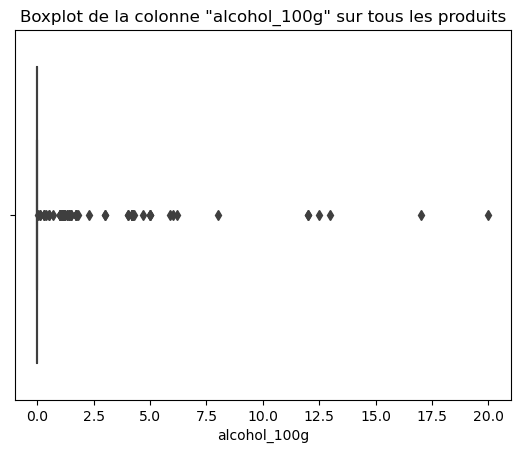

In [110]:
sns.boxplot(data=df3, x='alcohol_100g')
plt.title('Boxplot de la colonne "alcohol_100g" sur tous les produits')
plt.show()

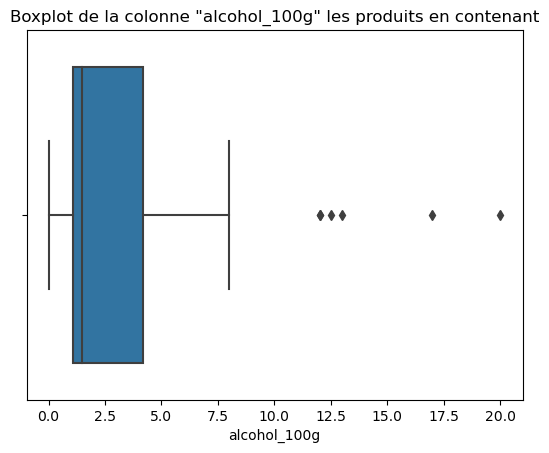

In [111]:
sns.boxplot(data=df_alcohol, x='alcohol_100g')
plt.title('Boxplot de la colonne "alcohol_100g" les produits en contenant')
plt.show()

In [112]:
# Je vais conserver uniquement les produits qui contiennent de l'alcool afin de calculer la moyenne.
alcohol = df_alcohol.groupby(('pnns_groups_2'))['alcohol_100g'].mean()
alcohol

pnns_groups_2
alcoholic beverages     5.292857
biscuits and cakes      1.714286
bread                   1.200000
chocolate products      3.816667
dairy desserts          1.286786
dressings and sauces    6.400000
ice cream               1.100000
one dish meals          2.000000
Name: alcohol_100g, dtype: float64

In [113]:
# Je crée une fonction afin d'imputer mes valeurs par la moyenne dans la colonne alcool en fonction du groupe pnns
def isna_alcool(df,col,col1,value):
    # Calcul de la moyenne en fonction du groupe pnns
    new_value = df.loc[(df[col]>0.0)&(df[col1]==value)][col].mean()
    
    # Imputation de la nouvelle valeur
    df.loc[(df[col].isna())&(df[col1]==value),col] = new_value

In [114]:
isna_alcool(df3,'alcohol_100g','pnns_groups_2','alcoholic beverages')

In [115]:
#beverages
isna_alcool(df3,'alcohol_100g','pnns_groups_2','alcoholic beverages');

#cereals
isna_alcool(df3,'alcohol_100g','pnns_groups_2','bread')


#composite
isna_alcool(df3,'alcohol_100g','pnns_groups_2','composite foods')


#fat
isna_alcool(df3,'alcohol_100g','pnns_groups_2','fat and sauces')


#milk
isna_alcool(df3,'alcohol_100g','pnns_groups_2','dairy desserts')


#sugary
isna_alcool(df3,'alcohol_100g','pnns_groups_2','biscuits and cakes')


isna_alcool(df3,'alcohol_100g','pnns_groups_2','chocolate products')

#other
gen_value = df3.loc[(df3['alcohol_100g']>0.0) & (df3['additives'].str.contains('1510|e1510|alcool|alcohol|moutarde'))]['alcohol_100g'].median()
df3.loc[(df3['alcohol_100g'].isna())&(df3['additives'].str.contains('1510|e1510|alcool|alcohol|%moutarde%')),'alcohol_100g']=gen_value;

#fillna
#df3.loc[(df3['alcohol_100g'].isna()),'alcohol_100g']=0

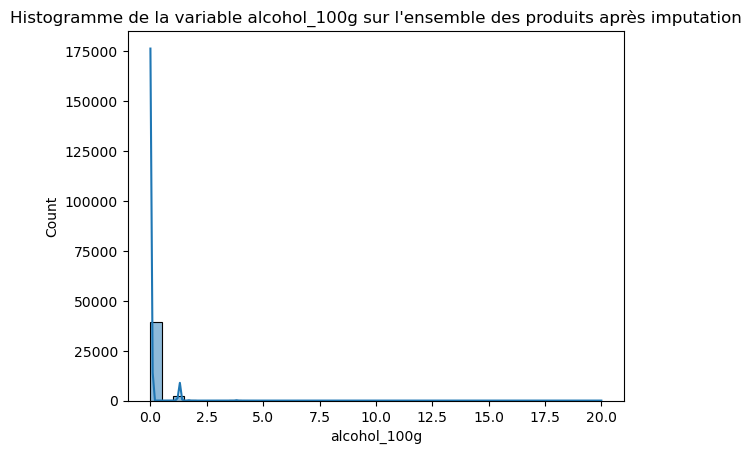

In [116]:
sns.histplot(df3['alcohol_100g'],bins=40,kde= True,)
plt.title('Histogramme de la variable alcohol_100g sur l\'ensemble des produits après imputation')
plt.show()

## Colonne polyols

In [117]:
df3['polyols_100g'].isna().mean()

0.9931567699954379

La colonne polyols_100g est présente mais contient 99% de données manquantes.  
Je vais procéder comme avec la colonne alcohol_100g pour imputer les valeurs manquantes.

https://www.lesmiraculeux.com/blogs/conseils-sante/polyols  

* Maltitol et le sirop de maltitol (E965)
* Isomalt (E953)
* Lactitol (E966)
* Mannitol (E421)
* Sorbitol (E420)
* Xylitol (E967).

<AxesSubplot: xlabel='polyols_100g', ylabel='Count'>

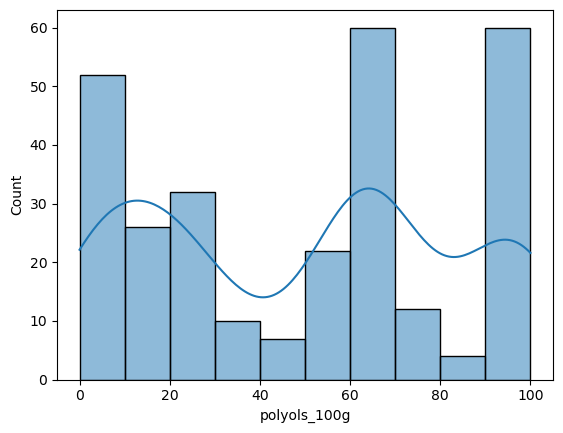

In [118]:
sns.histplot(data=df3, x='polyols_100g',kde= True)

In [119]:
# J'indique la mention polyols dans la catégorie additives tags
df3.loc[(df3['additives_tags'].isna())&(~df3['polyols_100g'].isna()),'additives_tags'] = df3.loc[(df3['additives_tags'].isna())&(~df3['polyols_100g'].isna()),'additives_tags'].fillna('polyols')

In [120]:
# J'indique dans ma colonne additives tags les produits qui ne contiennent pas d'acide, polyols et alcool
df3.loc[(df3['additives_tags'].isna())&(df3['additives'].str.contains('e260|e270|e330|e574|e297|e296|e334|e280|1510|e1510|alcool|alcohol|e965|e953|e966|e421|e420|e967|alcohol|alcool')==False),'additives_tags']=df3.loc[(df3['additives_tags'].isna())&(df3['additives'].str.contains('e260|e270|e330|e574|e297|e296|e334|e280|1510|e1510|alcool|alcohol|e965|e953|e966|e421|e420|e967')==False),'additives_tags'].fillna('pas de polyols,acides et alcool')

In [121]:
# Je supprime les produits qui ne contiennent pas d'informations sur les additifs
df3.drop(df3.loc[(df3['additives_tags'].isna())].index,inplace=True)

In [122]:
# Je remplace par 1 la valeur de la colonne additives_n pour les produits qui contiennent des polyols
df3.loc[(df3['additives_n'].isna()),'additives_n']=df3.loc[(df3['additives_n'].isna()),'additives_n'].fillna(1)

In [123]:
# Je remplace par polyols la valeur de la colonne additives pour les produits qui contiennent des polyols
df3.loc[(df3['additives'].isna()),'additives']=df3.loc[(df3['additives'].isna()),'additives'].fillna('polyols')

In [124]:
# Je sélectionne les produits qui ne contiennent pas les additifs des polyols et impute la valeur par 0
df3.loc[(df3['additives_tags'].str.contains('965|953|966|421|420|967')==False),'polyols_100g']=df3.loc[(df3['additives_tags'].str.contains('965|953|966|421|420|967')==False),'polyols_100g'].fillna(0)

In [125]:
# Je regroupe mes produits en fonction du groupe pnns_2 pour obtenir la moyenne des polyols
df3.loc[(df3['additives_tags'].str.contains('965|953|966|421|420|967'))&(~df3['polyols_100g'].isna()),:].groupby(['pnns_groups_2'])['polyols_100g'].mean()

pnns_groups_2
artificially sweetened beverages    96.000000
biscuits and cakes                  18.486486
bread                                3.550000
cereals                              6.233333
cheese                              24.000000
chocolate products                  22.099259
dairy desserts                       7.100000
dressings and sauces                 6.700000
pastries                            29.333333
sweets                              73.135409
Name: polyols_100g, dtype: float64

In [126]:
# Je crée une fonction afin d'imputer mes valeurs par la moyenne dans la colonne polyols en fonction du groupe pnns
def isna_poly(df,col,col1,value):
    # Calcul de la moyenne en fonction du groupe pnns
    new_value = df.loc[(df[col]>0.0)&(df[col1]==value)][col].mean()
    
    # Imputation de la nouvelle valeur
    df.loc[(df[col].isna())&(df[col1]==value),col] = new_value

In [127]:
# Je vais imputer les valeurs manquantes par la moyenne du groupe pnns2 sinon par la mediane du groupe pnns_1
#imputation groupes pnns_2:

# Imputation pour les produits bread:
isna_poly(df3,'polyols_100g','pnns_groups_2','bread')

# Imputation pour les produits cereals:
isna_poly(df3,'polyols_100g','pnns_groups_2','cereals')


# Imputation pour les produits dressings and sauces:
isna_poly(df3,'polyols_100g','pnns_groups_2','dressings and sauces')

# Imputation pour les produits fish meat eggs par la moyenne de la colonne polyols:
isna_poly(df3,'polyols_100g','pnns_groups_1','fish meat eggs')


# Imputation pour les produits fruits:
isna_poly(df3,'polyols_100g','pnns_groups_2','fruits')


# Imputation pour les produits fruits and vegetables autre que 'fruits':
isna_poly(df3,'polyols_100g','pnns_groups_1','fruits and vegetables')


# Imputation pour les produits dairy desserts:
isna_poly(df3,'polyols_100g','pnns_groups_2','dairy desserts')


# Imputation pour les produits milk and dairy products  autre que 'dairy desserts':
isna_poly(df3,'polyols_100g','pnns_groups_1','milk and dairy products')


# Imputation pour les produits salty snacks:
isna_poly(df3,'polyols_100g','pnns_groups_1','salty snacks')


# Imputation pour les produits biscuits and cakes:
isna_poly(df3,'polyols_100g','pnns_groups_2','biscuits and cakes')


# Imputation pour les produits chocolate products:
isna_poly(df3,'polyols_100g','pnns_groups_2','chocolate products')


# Imputation pour les produits pastries:
isna_poly(df3,'polyols_100g','pnns_groups_2','pastries')


# Imputation pour les produits sweets:
isna_poly(df3,'polyols_100g','pnns_groups_2','sweets')


# Imputation pour les produits composite food:
isna_poly(df3,'polyols_100g','pnns_groups_1','composite foods')


# Imputation pour les valeurs restantes
gen_value_1 = df3.loc[(df3['polyols_100g']>0.0) & (df3['additives'].str.contains('965|953|966|421|420|967'))]['polyols_100g'].mean()
df3.loc[(df3['polyols_100g'].isna())&(df3['additives'].str.contains('965|953|966|421|420|967')),'polyols_100g']=gen_value_1;


In [128]:
# J'affiche les produits qui contiennent plus de 90g pour 100g
df3.loc[df3['polyols_100g']>90,:][:5]

code                                      categories_fr  \
176051  2000000026918                  Snacks sucrés,Confiseries,Bonbons   
184903       26038476                  Snacks sucrés,Confiseries,Bonbons   
197032  3174332012592  Snacks sucrés,Confiseries,Bonbons,Confiseries-...   
197033  3174332016392                  Snacks sucrés,Confiseries,Bonbons   
197036  3174332018297                  Snacks sucrés,Confiseries,Bonbons   

                                                labels_fr countries_fr  \
176051  Peu ou pas de sucre,Fabriqué en France,Sans su...       France   
184903                                                NaN       France   
197032                                                NaN       France   
197033                                                NaN       France   
197036                                                NaN       France   

       allergens      traces_fr nutrition_grade_fr  \
176051       NaN  Phenylalanine                NaN   
184903       NaN  Phenylalanine                  b   
197032       NaN            NaN                  b   
197033       NaN  Phenylalanine                  b   
197036       NaN            NaN                  b   

                                                states_fr main_category_fr  \
176051  A vérifier,Complet,Informations nutritionnelle...          Bonbons   
184903  A vérifier,Complet,Informations nutritionnelle...          Bonbons   
197032  A vérifier,Complet,Informations nutritionnelle...          Bonbons   
197033  A vérifier,Complet,Informations nutritionnelle...          Bonbons   
197036  A vérifier,Complet,Informations nutritionnelle...          Bonbons   

        nutrition-score-fr_100g  \
176051                     <NA>   
184903                        2   
197032                        2   
197033                        2   
197036                        2   

                                             product_name  \
176051    Bonbons sans sucre avec édulcorant arôme menthe   
184903                          Bonbons Cassis Sans Sucre   
197032  Ricola Cranberry Bonbons suisses aux plantes O...   
197033      Cassis Bonbons suisses aux plantes (lot de 2)   
197036                                         Eucalyptus   

                                             generic_name          quantity  \
176051    Bonbons sans sucre aevc édulcorant arôme menthe              12 g   
184903                                                NaN              50 g   
197032     Bonbons aux herbes sans sucre, avec édulcorant              50 g   
197033                         Bonbons cassis aux plantes  100 g (2 x 50 g)   
197036  Bonbons Suisses aux Plantes sans sucres avec é...              50 g   

        additives_n                                          additives  \
176051            7   [ edulcorants -> fr:edulcorants  ]  [ sorbito...   
184903            4   [ edulcorants -> fr:edulcorants  ]  [ isomalt...   
197032            4   [ isomalt -> en:e953  -> exists  -- ok  ]  [ ...   
197033            4   [ isomalt -> en:e953  -> exists  -- ok  ]  [ ...   
197036            4   [ isomalt -> en:e953  -> exists  -- ok  ]  [ ...   

                                           additives_tags  \
176051  en:e420,en:e950,en:e470b,en:e414,en:e171,en:e1...   
184903                    en:e953,en:e951,en:e950,en:e296   
197032                    en:e953,en:e330,en:e951,en:e950   
197033                    en:e953,en:e330,en:e951,en:e950   
197036                    en:e953,en:e955,en:e950,en:e140   

                     packaging_tags  \
176051             boite,metallique   
184903                       carton   
197032  boite-carton,film-plastique   
197033        film-plastique,carton   
197036             carton,plastique   

                                          categories_tags  pnns_groups_1  \
176051              sugary snacks,confectioneries,candies  sugary snacks   
184903              sugary snacks,confectioneries,candies  sugary sna

Les données sont cohérentes car les produits qui contiennent plus de 90g de polyols pour 100g sont des édulcolorants et confiserie.

In [129]:
polyols = df3.loc[df3['polyols_100g']>0.0]['polyols_100g']


<AxesSubplot: xlabel='polyols_100g', ylabel='Count'>

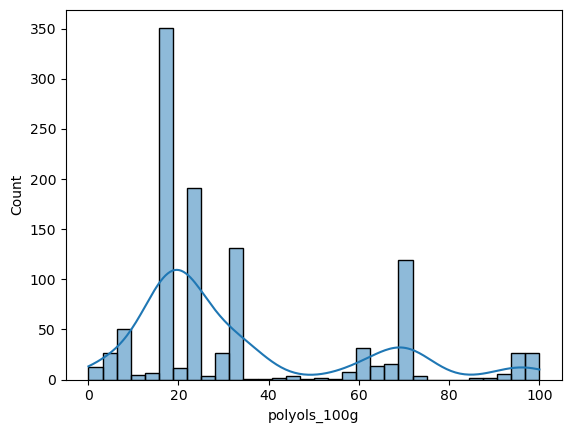

In [130]:
sns.histplot(polyols,kde= True)

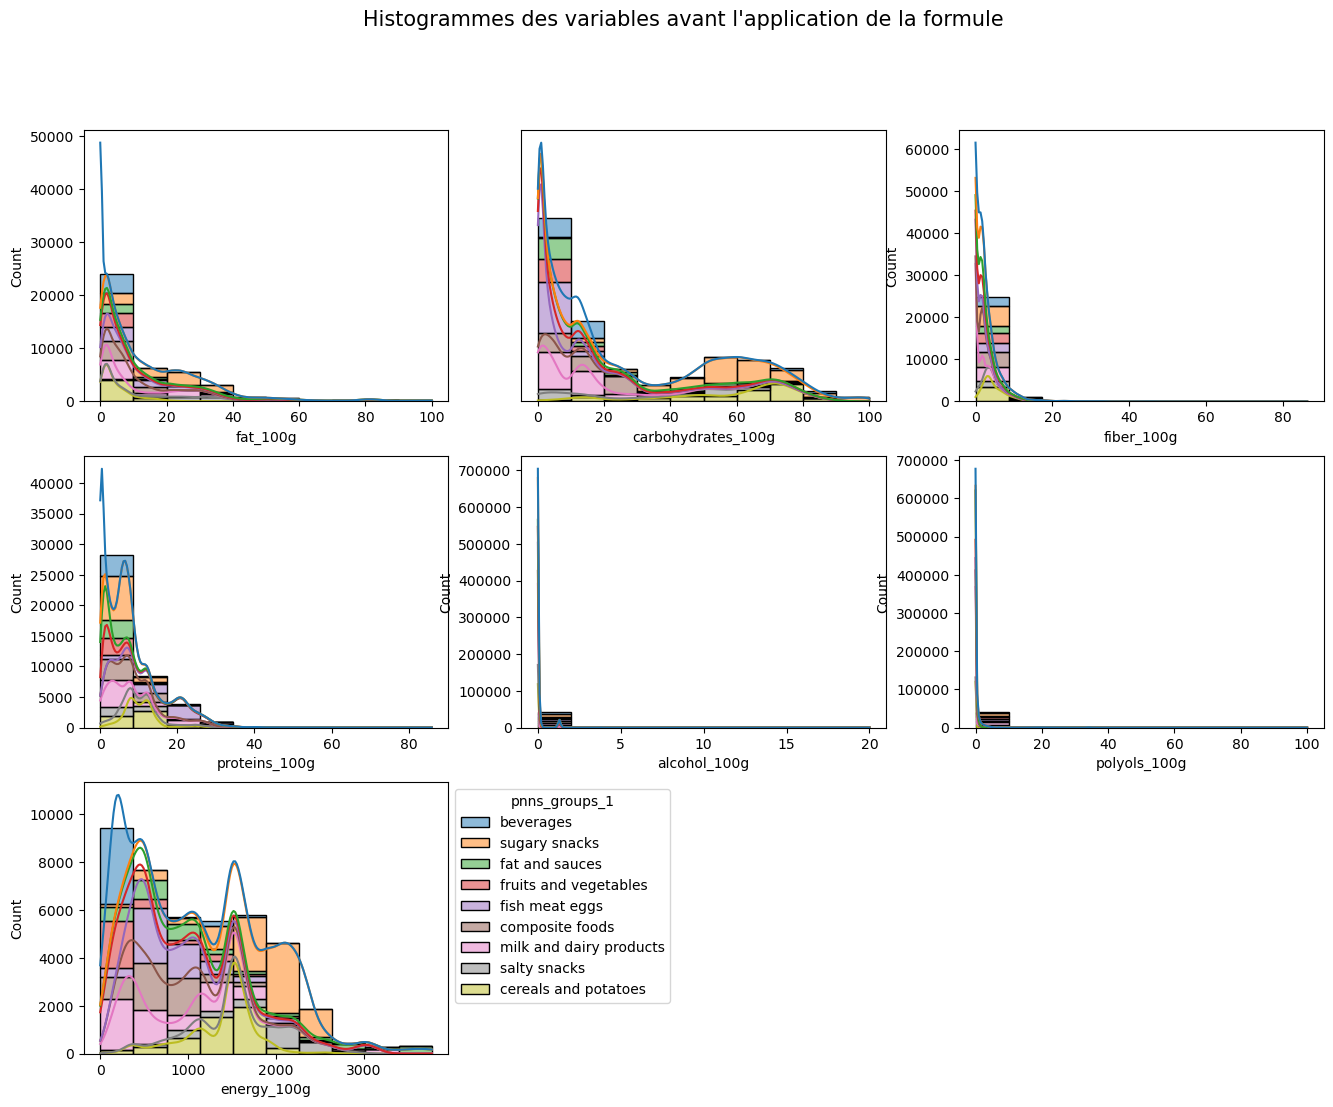

In [131]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

fig.suptitle('Histogrammes des variables avant l\'application de la formule',size=15)

sns.histplot(ax=axes[0, 0],data=df3, x='fat_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False, kde=True)

sns.histplot(ax=axes[0, 1],data=df3, x='carbohydrates_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False, kde=True)
axes[0, 1].get_yaxis().set_visible(False)

sns.histplot(ax=axes[0, 2],data=df3, x='fiber_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False, kde=True)
sns.histplot(ax=axes[1, 0],data=df3, x='proteins_100g',hue='pnns_groups_1', bins=10, multiple='stack',legend=False, kde=True)


sns.histplot(ax=axes[1, 1],data=df3, x='alcohol_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False, kde=True)
sns.histplot(ax=axes[1, 2],data=df3, x='polyols_100g',hue='pnns_groups_1', bins=10, multiple='stack',legend=False,kde=True)
sns.histplot(ax=axes[2, 0],data=df3, x='energy_100g',hue='pnns_groups_1', bins=10, multiple='stack',kde=True)
sns.move_legend(axes[2, 0], "best", bbox_to_anchor=(1, 1))


fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.show()

In [132]:
df3_corr = df3.corr()

In [133]:
# Création d'un tableau de corrélation avec par défaut la méthode de Pearson
df3_corr

nutrition-score-fr_100g  additives_n  energy_100g  \
nutrition-score-fr_100g                 1.000000     0.204449     0.622387   
additives_n                             0.204449     1.000000     0.038120   
energy_100g                             0.622387     0.038120     1.000000   
fat_100g                                0.571849    -0.018954     0.789241   
carbohydrates_100g                      0.239397     0.127050     0.520471   
fiber_100g                             -0.094311    -0.103937     0.297291   
proteins_100g                           0.092537    -0.084279     0.200587   
alcohol_100g                           -0.001949     0.106526    -0.037089   
polyols_100g                            0.016800     0.250480     0.032664   
acide_org                              -0.149384    -0.178165    -0.214781   

                         fat_100g  carbohydrates_100g  fiber_100g  \
nutrition-score-fr_100g  0.571849            0.239397   -0.094311   
additives_n             -0.018954            0.127050   -0.103937   
energy_100g              0.789241            0.520471    0.297291   
fat_100g                 1.000000           -0.070386    0.087010   
carbohydrates_100g      -0.070386            1.000000    0.277578   
fiber_100g               0.087010            0.277578    1.000000   
proteins_100g            0.142969           -0.131736    0.220982   
alcohol_100g             0.013821           -0.075572   -0.043606   
polyols_100g            -0.026110            0.172983   -0.008303   
acide_org               -0.072476           -0.199674   -0.085840   

                         proteins_100g  alcohol_100g  polyols_100g  acide_org  
nutrition-score-fr_100g       0.092537     -0.001949      0.016800  -0.149384  
additives_n                  -0.084279      0.106526      0.250480  -0.178165  
energy_100g                   0.200587     -0.037089      0.032664  -0.214781  
fat_100g                      0.142969      0.013821     -0.026110  -0.072476  
carbohydrates_100g           -0.131736     -0.075572      0.172983  -0.199674  
fiber_100g                    0.220982     -0.043606     -0.008303  -0.085840  
proteins_100g                 1.000000     -0.045106     -0.068427  -0.216271  
alcohol_100g                 -0.045106      1.000000     -0.007698   0.026546  
polyols_100g                 -0.068427     -0.007698      1.000000  -0.047911  
acide_org                    -0.216271      0.026546     -0.047911   1.000000

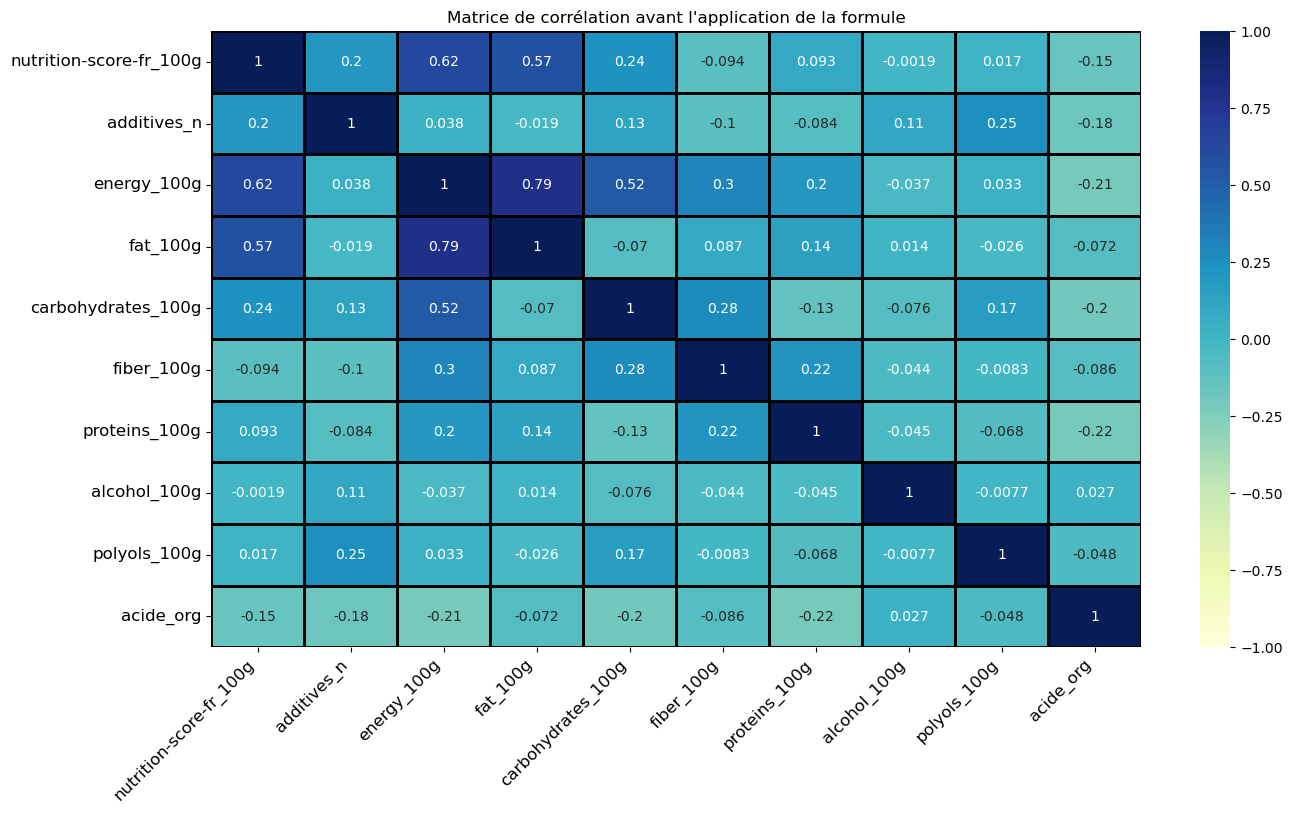

In [134]:
# Création d'un matrice de corrélation afin d'avoir une meilleure lisibilité
plt.figure(figsize=(15,8))

sns.heatmap(data=df3_corr, annot=True,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1)
plt.yticks(rotation=0,fontsize = 12) 
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.title('Matrice de corrélation avant l\'application de la formule')
plt.show()

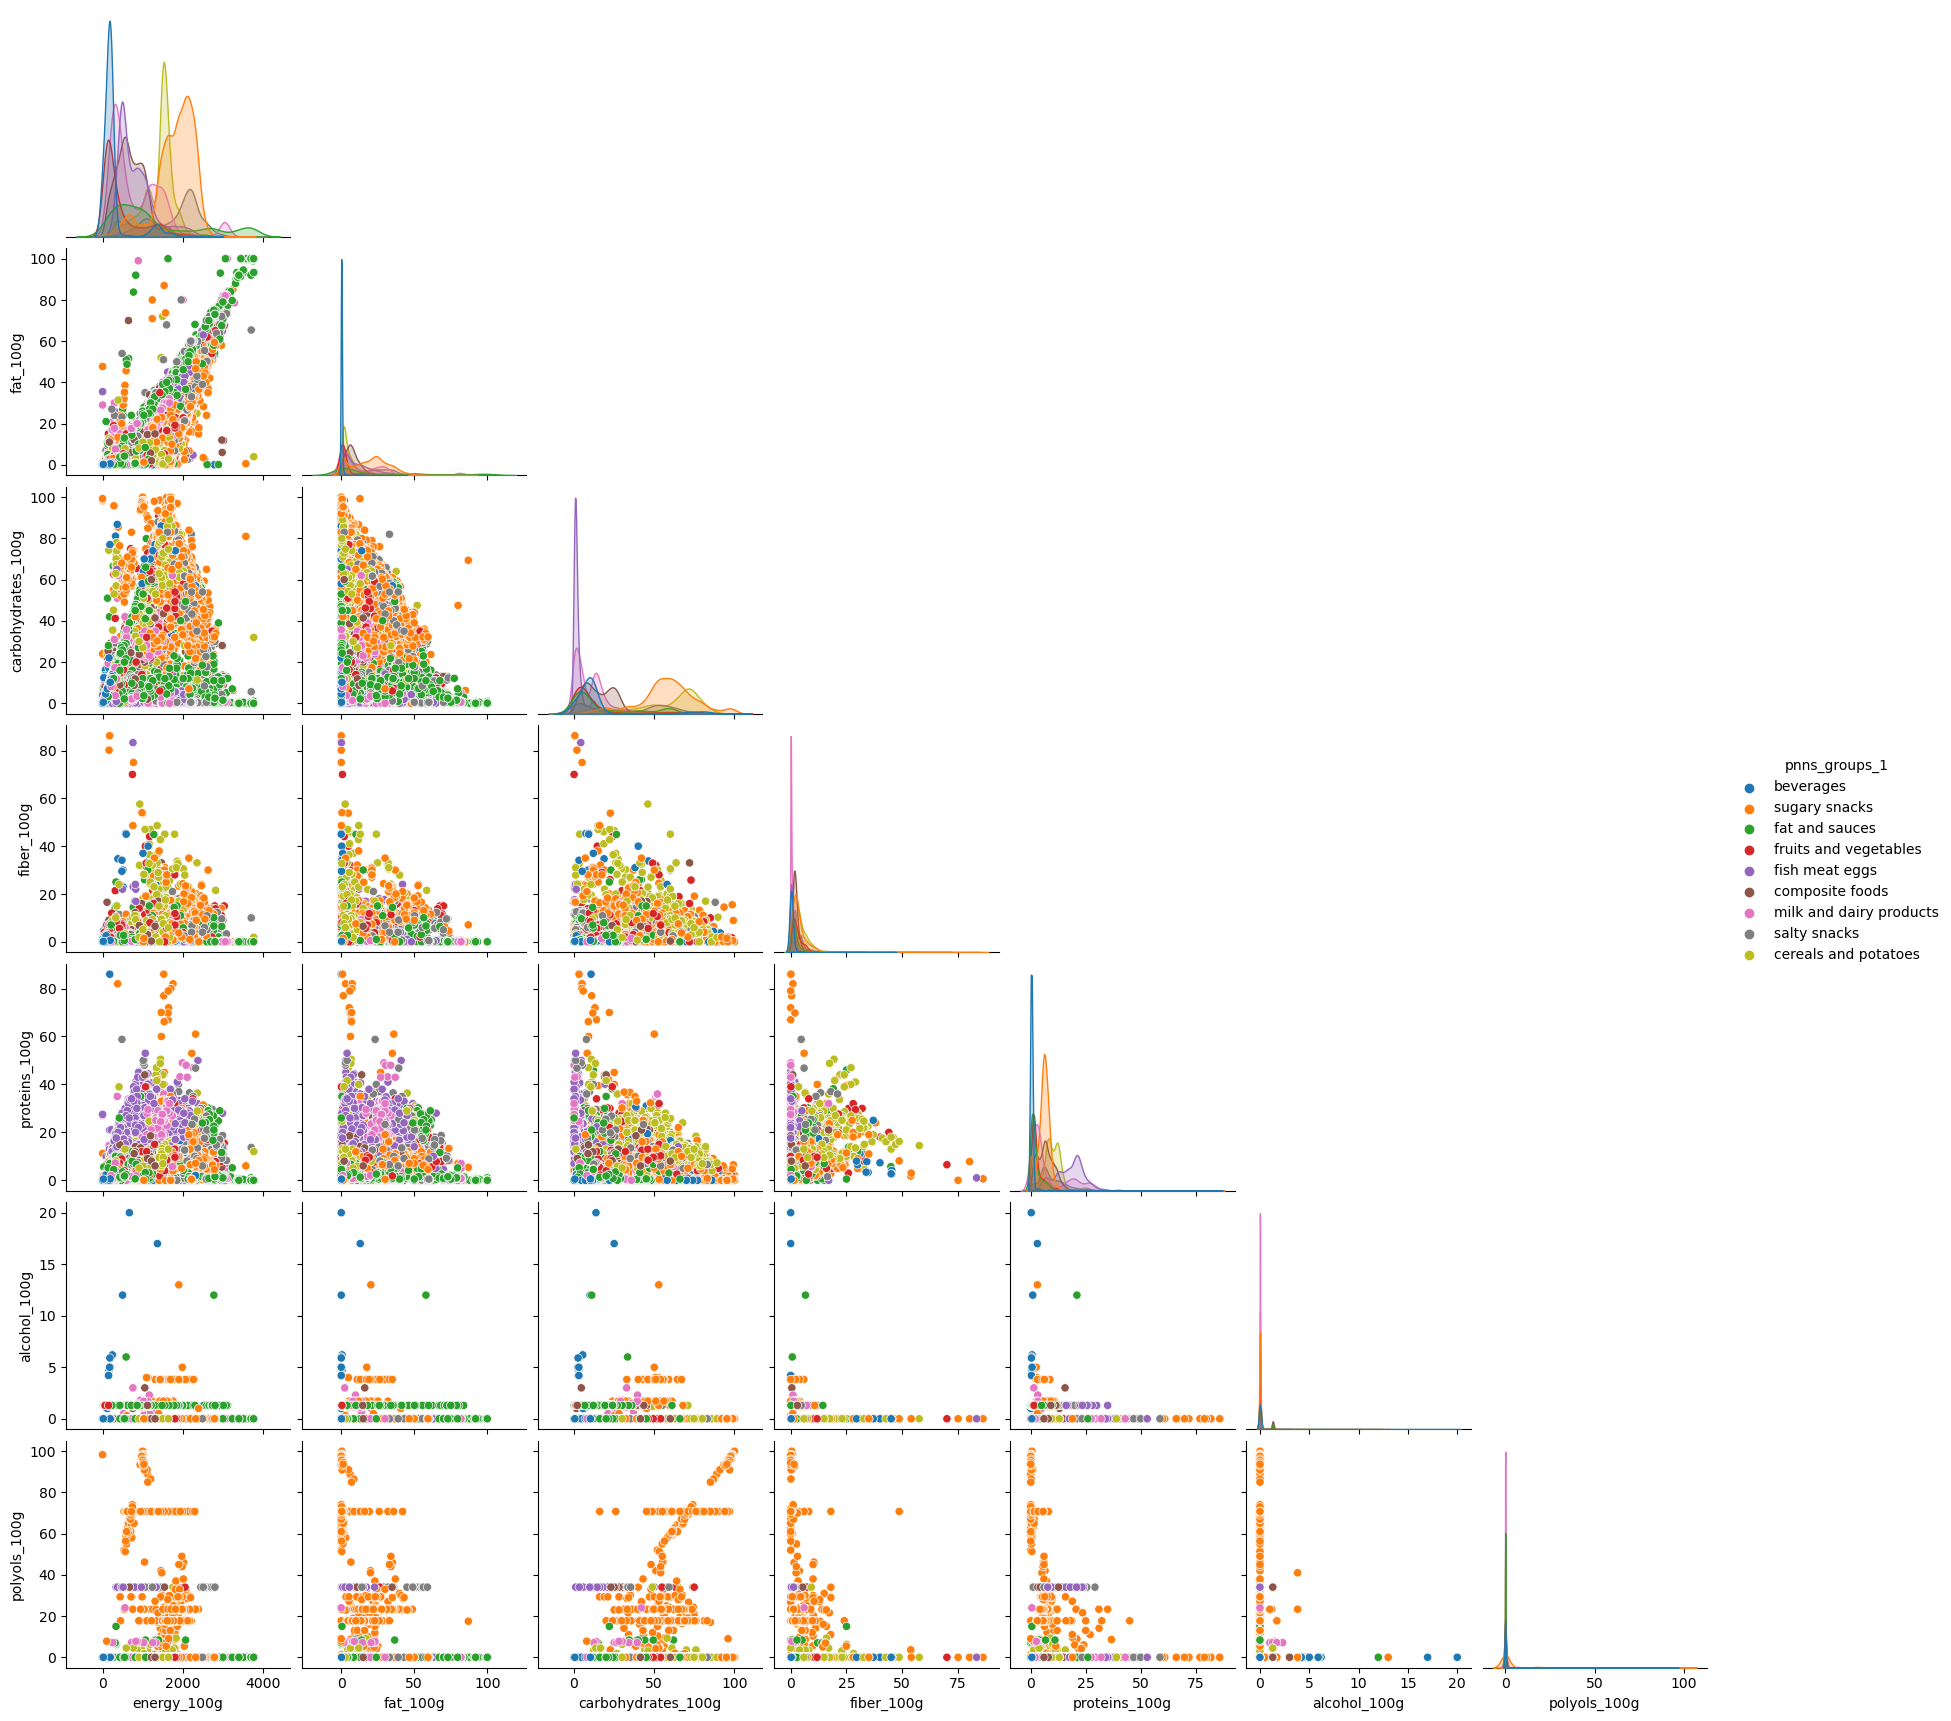

In [135]:
# Création d'un pairplot 
sns.pairplot(data=df3[['pnns_groups_1','energy_100g',
       'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g',
       'alcohol_100g', 'polyols_100g']],hue='pnns_groups_1', corner=True)
plt.show()

# Application de la formule Energy

In [136]:
# Je commence par diviser ma dataframe en deux parties. Une contenant des produits avec acides organiques et une autre sans.
# DF sans acides / variables numériques:
df_acid_0 = df3.loc[df3['acide_org']==0][['energy_100g','fat_100g','carbohydrates_100g', 'fiber_100g', 'proteins_100g','alcohol_100g', 'polyols_100g', 'acide_org']];

# DF sans acides / variables catégorielles:
df_acid_categ = df3.loc[df3['acide_org']==0][['code', 'categories_fr', 'labels_fr', 'countries_fr', 'allergens',
       'traces_fr', 'nutrition_grade_fr', 'states_fr', 'main_category_fr','pnns_groups_1','pnns_groups_2','nutrition-score-fr_100g', 'product_name', 'generic_name', 'quantity',
       'additives_n', 'additives', 'additives_tags', 'packaging_tags',
       'categories_tags']];

In [137]:
df_acid_0

energy_100g  fat_100g  carbohydrates_100g  fiber_100g  proteins_100g  \
226           177.0       0.0               10.40         0.0           0.00   
242          1900.0      23.0               55.00         1.5           6.00   
279          1768.0      19.0               56.00         1.8           5.80   
299          1868.0      23.0               51.00         1.7           8.00   
452          1665.0       0.5               96.00         0.1           0.90   
...             ...       ...                 ...         ...            ...   
320600        543.0      13.0                2.10         0.5           1.30   
320601        911.0       8.1               30.00         1.8           5.10   
320625        119.0       0.0                7.00         NaN           0.00   
320652       1309.0      15.0               41.40         6.5           6.00   
320681       1017.0       1.3               95.87         0.0           0.04   

        alcohol_100g  polyols_100g  acide_org  
226              0.0          0.00        0.0  
242              0.0          0.00        0.0  
279              0.0          0.00        0.0  
299              0.0          0.00        0.0  
452              0.0          0.00        0.0  
...              ...           ...        ...  
320600           0.0          0.00        0.0  
320601           0.0          0.00        0.0  
320625           0.0          0.00        0.0  
320652           0.0          0.00        0.0  
320681           0.0         94.48        0.0  

[17077 rows x 8 columns]

In [138]:
df_acid_0.describe()

energy_100g      fat_100g  carbohydrates_100g    fiber_100g  \
count  17075.000000  17063.000000        17054.000000  10652.000000   
mean    1169.492623     13.937618           29.757045      2.586288   
std      716.190844     13.487377           26.398512      3.332826   
min        0.000000      0.000000            0.000000      0.000000   
25%      509.000000      2.900000            5.100000      0.600000   
50%     1067.000000      9.400000           19.400000      1.800000   
75%     1830.000000     23.000000           54.600000      3.400000   
max     3700.000000    100.000000          100.000000     86.200000   

       proteins_100g  alcohol_100g  polyols_100g  acide_org  
count   17066.000000  17077.000000  17077.000000    17077.0  
mean        8.225769      0.077509      1.403783        0.0  
std         7.219411      0.357185      8.372329        0.0  
min         0.000000      0.000000      0.000000        0.0  
25%         3.300000      0.000000      0.000000        0.0  
50%         6.600000      0.000000      0.000000        0.0  
75%        10.475000      0.000000      0.000000        0.0  
max        82.000000     13.000000    100.000000        0.0

In [139]:
df_acid_0.shape

(17077, 8)

In [140]:
df_acid_0.isna().mean()

energy_100g           0.000117
fat_100g              0.000820
carbohydrates_100g    0.001347
fiber_100g            0.376237
proteins_100g         0.000644
alcohol_100g          0.000000
polyols_100g          0.000000
acide_org             0.000000
dtype: float64

In [141]:
# Je retire les produits qui contiennent des valeurs manquantes (excepté fiber_100g afin de ne pas supprimer trop de données)
df_acid_0.drop(df_acid_0.loc[(df_acid_0['fat_100g'].isna())|(df_acid_0['carbohydrates_100g'].isna())|(df_acid_0['proteins_100g'].isna())].index,inplace=True)

In [142]:
df_acid_0.drop(df_acid_0.loc[df_acid_0['energy_100g'].isna()].index,inplace=True)


In [143]:
df_acid_0.isna().mean()

energy_100g           0.000000
fat_100g              0.000000
carbohydrates_100g    0.000000
fiber_100g            0.377342
proteins_100g         0.000000
alcohol_100g          0.000000
polyols_100g          0.000000
acide_org             0.000000
dtype: float64

In [144]:
# J'utilise la fonction lambda pour imputer les valeurs manquantes de fiber_100g
df_acid_0['fiber_100g'] = df_acid_0.apply(lambda x:(((x['energy_100g']-((x['proteins_100g']*17)+(x['carbohydrates_100g']*17)+(x['fat_100g']*37)+(x['alcohol_100g']*29)+(x['acide_org']*13)+(x['polyols_100g']*10)))/8))if pd.isnull(x['fiber_100g']) else x['fiber_100g'], axis=1)

In [145]:
df_acid_0.describe()

energy_100g      fat_100g  carbohydrates_100g    fiber_100g  \
count  17027.000000  17027.000000        17027.000000  17027.000000   
mean    1169.851150     13.922703           29.768124      0.953168   
std      716.277278     13.479810           26.406478     12.446438   
min        0.000000      0.000000            0.000000   -331.025000   
25%      509.000000      2.900000            5.100000      0.050000   
50%     1067.000000      9.400000           19.400000      1.300000   
75%     1831.000000     23.000000           54.600000      3.000000   
max     3700.000000    100.000000          100.000000    178.250000   

       proteins_100g  alcohol_100g  polyols_100g  acide_org  
count   17027.000000  17027.000000  17027.000000    17027.0  
mean        8.216985      0.077737      1.407906        0.0  
std         7.204623      0.357685      8.384267        0.0  
min         0.000000      0.000000      0.000000        0.0  
25%         3.300000      0.000000      0.000000        0.0  
50%         6.600000      0.000000      0.000000        0.0  
75%        10.400000      0.000000      0.000000        0.0  
max        82.000000     13.000000    100.000000        0.0

In [146]:
# Un produit ne peut contenir de valeurs négatives. Il s'agit sans doute d'une erreur de saisie.
# Je remplace les valeurs négatives par 0
df_acid_0.loc[df_acid_0['fiber_100g']<0,'fiber_100g']=0


In [147]:
# On détecte également des valeurs abhérantes dans la colonne fibre (178g sur 100g)
# Je décide de les supprimer afin de ne pas biaiser mes résultats
df_acid_0.loc[df_acid_0['fiber_100g']>100].index
df_acid_0 = df_acid_0.drop(df_acid_0.loc[df_acid_0['fiber_100g']>100].index)

In [148]:
# DF des produits contenant des acides organiques
df_acid_1999 = df3.loc[df3['acide_org']!=0][['energy_100g','fat_100g','carbohydrates_100g', 'fiber_100g', 'proteins_100g','alcohol_100g', 'polyols_100g', 'acide_org']];

# DF avec acides / variables catégorielles:
df_acid_1999_categ = df3.loc[df3['acide_org']!=0][['code', 'categories_fr', 'labels_fr', 'countries_fr', 'allergens',
       'traces_fr', 'nutrition_grade_fr', 'states_fr', 'main_category_fr','pnns_groups_1','pnns_groups_2','nutrition-score-fr_100g', 'product_name', 'generic_name', 'quantity',
       'additives_n', 'additives', 'additives_tags', 'packaging_tags',
       'categories_tags']];

In [149]:
df_acid_1999.isna().mean()

energy_100g           0.000326
fat_100g              0.002646
carbohydrates_100g    0.003949
fiber_100g            0.369229
proteins_100g         0.001059
alcohol_100g          0.000000
polyols_100g          0.000000
acide_org             0.000000
dtype: float64

In [150]:
# Je retire les produits qui contiennent des valeurs manquantes (excepté pour la colonne fiber_100g)
df_acid_1999.drop(df_acid_1999.loc[(df_acid_1999['fat_100g'].isna())|(df_acid_1999['carbohydrates_100g'].isna())|(df_acid_1999['proteins_100g'].isna())|(df_acid_1999['energy_100g'].isna())].index,inplace=True)

In [151]:
# J'utilise la fonction lambda pour imputer les valeurs manquantes de fiber_100g en utilisant ma formule
df_acid_1999['fiber_100g'] = df_acid_1999.apply(lambda x:(((x['energy_100g']-((x['proteins_100g']*17)+(x['carbohydrates_100g']*17)+(x['fat_100g']*37)+(x['alcohol_100g']*29)+(x['acide_org']*13)+(x['polyols_100g']*10)))/8))if pd.isnull(x['fiber_100g']) else x['fiber_100g'], axis=1)

In [152]:
df_acid_1999.isna().mean()

energy_100g           0.0
fat_100g              0.0
carbohydrates_100g    0.0
fiber_100g            0.0
proteins_100g         0.0
alcohol_100g          0.0
polyols_100g          0.0
acide_org             0.0
dtype: float64

In [153]:
df_acid_1999.describe()

energy_100g      fat_100g  carbohydrates_100g    fiber_100g  \
count  24366.000000  24366.000000        24366.000000  24366.000000   
mean    1049.932117     12.806610           25.994612      0.729899   
std      800.159361     18.721764           27.679410     10.620377   
min        0.000000      0.000000            0.000000   -348.320000   
25%      320.250000      0.600000            3.500000     -1.191250   
50%      963.000000      4.500000           12.000000      0.680000   
75%     1547.000000     18.900000           51.500000      2.882813   
max     3772.000000    100.000000          100.000000    345.108750   

       proteins_100g  alcohol_100g  polyols_100g     acide_org  
count   24366.000000  24366.000000  24366.000000  24366.000000  
mean        7.194490      0.072892      0.518645      1.421367  
std         7.280268      0.372977      5.212452      0.595811  
min         0.000000      0.000000      0.000000      0.420000  
25%         1.200000      0.000000      0.000000      1.120000  
50%         5.400000      0.000000      0.000000      1.600000  
75%        10.990000      0.000000      0.000000      2.010000  
max        86.000000     20.000000     98.100000      2.330000

In [154]:
# Même chose que pour df_acid_0, il y a des valeurs abhérantes que je vais traiter de la même manière
# Remplacement des valeurs négatives par 0
df_acid_1999.loc[df_acid_1999['fiber_100g']<0,'fiber_100g']=0

In [155]:
# Suppression des produits dont la quantité est supérieure à 100
df_acid_1999.loc[df_acid_1999['fiber_100g']>100].index
df_acid_1999 = df_acid_1999.drop(df_acid_1999.loc[df_acid_1999['fiber_100g']>100].index)

In [156]:
# Je regroupe mes colonnes catégorielles et numériques
df_ac_0 = pd.concat([df_acid_categ,df_acid_0],join='inner', axis=1)

In [157]:
df_ac_0

code                                      categories_fr  \
226     0000040608754  Boissons,Boissons gazeuses,Sodas,Sodas au cola...   
242            000010  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
279            000030  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
299            000050  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
452          00011501  Aliments et boissons à base de végétaux,Alimen...   
...               ...                                                ...   
320600  9556041610056  Aliments et boissons à base de végétaux,Alimen...   
320601  9556041610322  Aliments et boissons à base de végétaux,Alimen...   
320625  9556156040038  Aliments et boissons à base de végétaux,Boisso...   
320652  9556587103869  Aliments et boissons à base de végétaux,Alimen...   
320681       96068779                  Snacks sucrés,Confiseries,Bonbons   

                                                labels_fr        countries_fr  \
226                                                   NaN              France   
242                                                   NaN              France   
279                         Point Vert,Fabriqué en France              France   
299                         Point Vert,Fabriqué en France              France   
452     en:Point-vert,en:Sans-aromes-artificiels,en:Sa...  France,Royaume-Uni   
...                                                   ...                 ...   
320600                                                NaN              France   
320601                                              Halal              France   
320625                                 Sans conservateurs              France   
320652                                 Sans conservateurs              France   
320681  Peu ou pas de sucre,Sans sucre,Ne-pas-donner-a...              France   

                                   allergens  \
226                                      NaN   
242                    blé, oeufs, blé, lait   
279                     blé, œufs, blé, lait   
299     œufs, amande, beurre, blé, œufs, blé   
452                                      NaN   
...                                      ...   
320600                                   NaN   
320601                                   blé   
320625                                   NaN   
320652                                   blé   
320681                                   NaN   

                               traces_fr nutrition_grade_fr  \
226                                  NaN                  e   
242                  Fruits à coque,Soja                  d   
279                  Fruits à coque,Soja                  d   
299                  Fruits à coque,Soja                  e   
452                                  NaN                  d   
...                                  ...                ...   
320600                               NaN                  d   
320601                               NaN                  b   
320625                               NaN                  d   
320652  Œufs,Lait,Graines de sésame,Soja                  c   
320681                               NaN                  c   

                                                states_fr  \
226     A vérifier,Complet,Informations nutritionnelle...   
242     A vérifier,Complet,Informations nutritionnelle...   
279     A vérifier,Complet,Informations nutritionnelle...   
299     A vérifier,Complet,Informations nutritionnelle...   
452     A vérifier,Complet,Informations nutritionnelle...   
...                                                   ...   
320600  A vérifier,Complet,Informations nutritionnelle...   
320601  A vérifier,Complet,Informations nutritionnelle...   
320625  A vérifier,Complet,Informations nutritionnelle...   
320652  A vérifier,Complet,Informations nutritionnelle...   
320681  A vérifier,Complet,Informations nutritionnelle...   

                               main_category_fr         pnns_gro

In [158]:
# Je regroupe mes variables qualitatives et quantitatives
df_ac_1999 = pd.concat([df_acid_1999_categ,df_acid_1999],join='inner', axis=1)

In [159]:
# Je recrée une dataframe avec l'ensemble de mes produits
df4 = pd.concat([df_ac_0,df_ac_1999], axis=0)

In [160]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41383 entries, 226 to 320763
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     41383 non-null  object 
 1   categories_fr            41383 non-null  object 
 2   labels_fr                23016 non-null  object 
 3   countries_fr             41383 non-null  object 
 4   allergens                19269 non-null  object 
 5   traces_fr                15823 non-null  object 
 6   nutrition_grade_fr       40764 non-null  object 
 7   states_fr                41383 non-null  object 
 8   main_category_fr         41383 non-null  object 
 9   pnns_groups_1            41383 non-null  object 
 10  pnns_groups_2            41383 non-null  object 
 11  nutrition-score-fr_100g  40764 non-null  Int32  
 12  product_name             41289 non-null  object 
 13  generic_name             28735 non-null  object 
 14  quantity           

In [161]:
# Imputation des valeurs manquantes par 0
df4['acide_org'] = df4['acide_org'].fillna(0)

In [162]:
df4.describe()

nutrition-score-fr_100g   additives_n   energy_100g      fat_100g  \
count             40764.000000  41383.000000  41383.000000  41383.000000   
mean                  8.450986      2.008627   1099.011659     13.267995   
std                   9.057118      2.552394    768.881217     16.775211   
min                 -15.000000      0.000000      0.000000      0.000000   
25%                   1.000000      0.000000    417.000000      1.300000   
50%                   8.000000      1.000000   1014.000000      6.800000   
75%                  15.000000      3.000000   1643.000000     21.000000   
max                  40.000000     31.000000   3772.000000    100.000000   

       carbohydrates_100g    fiber_100g  proteins_100g  alcohol_100g  \
count        41383.000000  41383.000000   41383.000000  41383.000000   
mean            27.549540      2.125760       7.614686      0.074840   
std             27.226417      3.771418       7.265649      0.366711   
min              0.000000      0.000000       0.000000      0.000000   
25%              4.000000      0.000000       1.900000      0.000000   
50%             14.200000      1.000000       6.000000      0.000000   
75%             53.000000      2.900000      10.700000      0.000000   
max            100.000000     99.217500      86.000000     20.000000   

       polyols_100g     acide_org  
count  41383.000000  41383.000000  
mean       0.884656      0.836616  
std        6.716440      0.835564  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.540000  
75%        0.000000      1.610000  
max      100.000000      2.330000

La dataframe ne contient plus de valeurs abhérantes.

In [163]:
# Je crée une nouvelle colonne formule afin de la comparer avec la colonne energy_100g
df4 = df4.assign(formule = lambda x: ((x['fat_100g']*37)+(x['proteins_100g']*17)+(x['carbohydrates_100g']*17)+(x['fiber_100g']*8)+(x['alcohol_100g']*29)+(x['acide_org']*13)+(x['polyols_100g']*10)))

In [164]:
df4[['energy_100g','formule']].describe()

energy_100g       formule
count  41383.000000  41383.000000
mean    1099.011659   1127.606657
std      768.881217    774.705185
min        0.000000      0.000000
25%      417.000000    433.700000
50%     1014.000000   1040.590000
75%     1643.000000   1681.325000
max     3772.000000   4743.330000

On constate une différence de 1000KJ dans les valeurs maximales

In [165]:
# J'affiche les produits qui contiennent une valeur supérieure à 3800KJ
df4.loc[df4['formule']>3800,:]

code                            categories_fr  \
222671  3284230005937     Snacks sucrés,Viennoiseries,Brioches   
177924       20104214  Snacks sucrés,Barres,Barres de céréales   

                                    labels_fr countries_fr  \
222671                                    NaN       France   
177924  Peu ou pas de sucre,Sans sucre ajouté       France   

                                    allergens  \
222671  blé, œufs, lait, œufs, œuf, blé, soja   
177924                                    NaN   

                                                traces_fr nutrition_grade_fr  \
222671                                     Fruits à coque                  e   
177924  Lait,Fruits à coque,Graines de sésame,Soja,Anh...                  c   

                                                states_fr main_category_fr  \
222671  A vérifier,Complet,Informations nutritionnelle...    Snacks sucrés   
177924  A compléter,Informations nutritionnelles compl...    Snacks sucrés   

        pnns_groups_1       pnns_groups_2  nutrition-score-fr_100g  \
222671  sugary snacks  biscuits and cakes                       19   
177924  sugary snacks  biscuits and cakes                        7   

                 product_name  \
222671   6 spiralo's chocolat   
177924  Barres céréales Pomme   

                                             generic_name          quantity  \
222671  brioches fourée a la crème patissiere et aux p...             300 g   
177924                        Barres de céréales au pomme  200 g (8 * 25 g)   

        additives_n                                          additives  \
222671            7   [ brioche -> fr:brioche  ]  [ 52 -> fr:52  ] ...   
177924            1                                        sans alcool   

                                           additives_tags    packaging_tags  \
222671  en:e471,en:e300,en:e160,en:e14xx,en:e202,en:e4...  sachet,plastique   
177924                                        sans alcool            carton   

                             categories_tags  energy_100g  fat_100g  \
222671  sugary snacks,viennoiseries,brioches       1240.0      80.0   
177924        sugary snacks,bars,cereal bars       1536.0      87.0   

        carbohydrates_100g  fiber_100g  proteins_100g  alcohol_100g  \
222671                47.5         0.0            7.1           0.0   
177924                69.4         7.1            5.4           0.0   

        polyols_100g  acide_org  formule  
222671           0.0       0.00  3888.20  
177924          17.5       1.61  4743.33

In [166]:
df4.loc[df4['code']=='20104214',:]

code                            categories_fr  \
177924  20104214  Snacks sucrés,Barres,Barres de céréales   

                                    labels_fr countries_fr allergens  \
177924  Peu ou pas de sucre,Sans sucre ajouté       France       NaN   

                                                traces_fr nutrition_grade_fr  \
177924  Lait,Fruits à coque,Graines de sésame,Soja,Anh...                  c   

                                                states_fr main_category_fr  \
177924  A compléter,Informations nutritionnelles compl...    Snacks sucrés   

        pnns_groups_1       pnns_groups_2  nutrition-score-fr_100g  \
177924  sugary snacks  biscuits and cakes                        7   

                 product_name                 generic_name          quantity  \
177924  Barres céréales Pomme  Barres de céréales au pomme  200 g (8 * 25 g)   

        additives_n    additives additives_tags packaging_tags  \
177924            1  sans alcool    sans alcool         carton   

                       categories_tags  energy_100g  fat_100g  \
177924  sugary snacks,bars,cereal bars       1536.0      87.0   

        carbohydrates_100g  fiber_100g  proteins_100g  alcohol_100g  \
177924                69.4         7.1            5.4           0.0   

        polyols_100g  acide_org  formule  
177924          17.5       1.61  4743.33

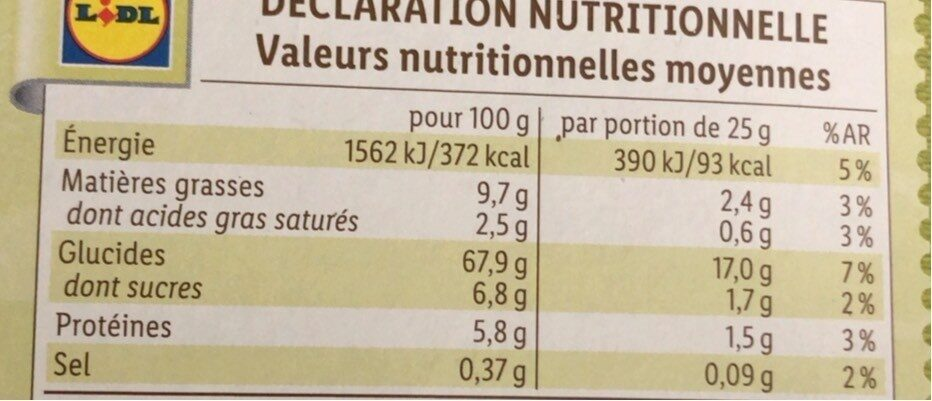

L'image indique une quantité de **9.7g pour 100g** de matière grasse (fat) alors que sur mon df la valeur est de **87.0g pour 100g.**

In [167]:
df4.loc[df4['code']=='3284230005937',:]

code                         categories_fr labels_fr  \
222671  3284230005937  Snacks sucrés,Viennoiseries,Brioches       NaN   

       countries_fr                              allergens       traces_fr  \
222671       France  blé, œufs, lait, œufs, œuf, blé, soja  Fruits à coque   

       nutrition_grade_fr                                          states_fr  \
222671                  e  A vérifier,Complet,Informations nutritionnelle...   

       main_category_fr  pnns_groups_1       pnns_groups_2  \
222671    Snacks sucrés  sugary snacks  biscuits and cakes   

        nutrition-score-fr_100g          product_name  \
222671                       19  6 spiralo's chocolat   

                                             generic_name quantity  \
222671  brioches fourée a la crème patissiere et aux p...    300 g   

        additives_n                                          additives  \
222671            7   [ brioche -> fr:brioche  ]  [ 52 -> fr:52  ] ...   

                                           additives_tags    packaging_tags  \
222671  en:e471,en:e300,en:e160,en:e14xx,en:e202,en:e4...  sachet,plastique   

                             categories_tags  energy_100g  fat_100g  \
222671  sugary snacks,viennoiseries,brioches       1240.0      80.0   

        carbohydrates_100g  fiber_100g  proteins_100g  alcohol_100g  \
222671                47.5         0.0            7.1           0.0   

        polyols_100g  acide_org  formule  
222671           0.0        0.0   3888.2

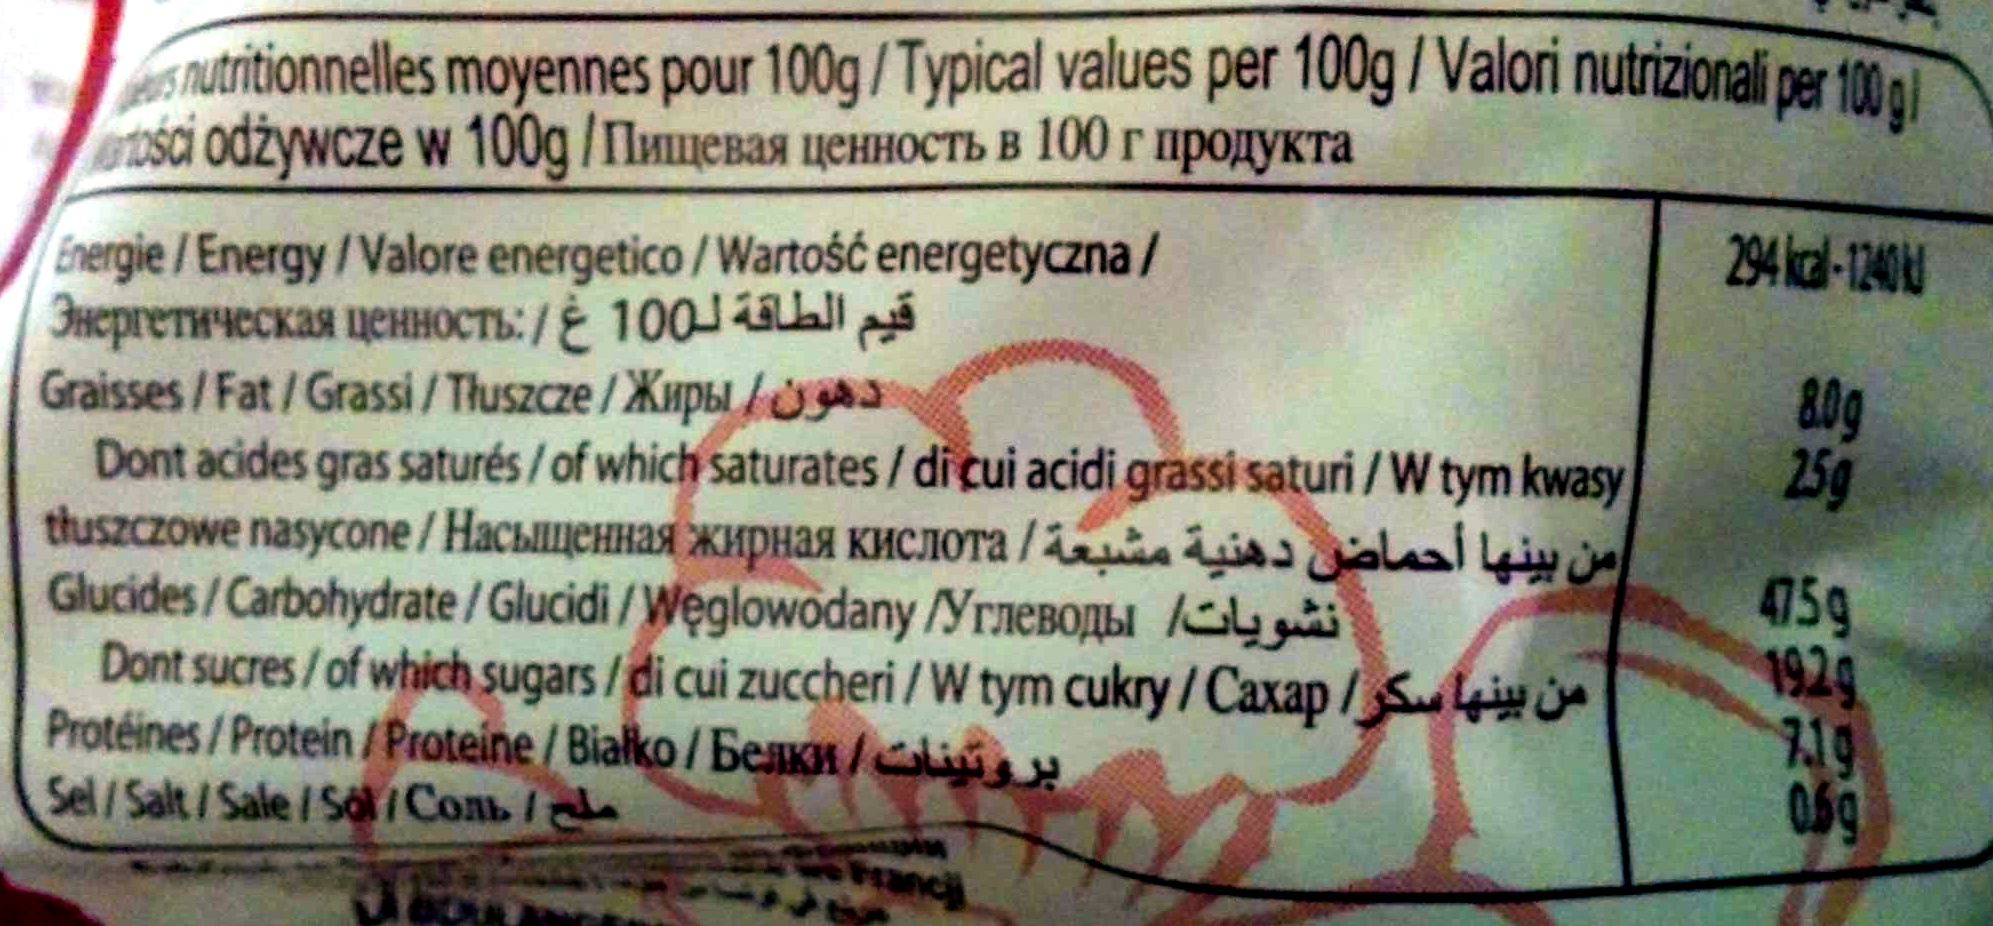

Même chose pour ce produit, la quantité de matière grasse est de **8.0g pour 100g** alors que sur mon df elle est de **80g pour 100g.**  

Ces outliers sont dû à une erreur de saisie.  
Je dois prendre en considération le fait que beaucoup de produits peuvent aussi contenir des informations erronnées notammement pour les quantité pour 100g.

In [168]:
# Je modifie les valeurs
df4.loc[df4['code']=='20104214','fat_100g']=9.7;
df4.loc[df4['code']=='3284230005937','fat_100g']=8.0;

In [169]:
df4 = df4.assign(formule = lambda x: ((x['fat_100g']*37)+(x['proteins_100g']*17)+(x['carbohydrates_100g']*17)+(x['fiber_100g']*8)+(x['alcohol_100g']*29)+(x['acide_org']*13)+(x['polyols_100g']*10)).round(2))

In [170]:
df4[['energy_100g','formule']].describe()

energy_100g       formule
count  41383.000000  41383.000000
mean    1099.011659   1127.473189
std      768.881217    774.391428
min        0.000000      0.000000
25%      417.000000    433.700000
50%     1014.000000   1040.590000
75%     1643.000000   1681.310000
max     3772.000000   3770.000000

A présent la différence est de 2KJ entre les valeurs maximales

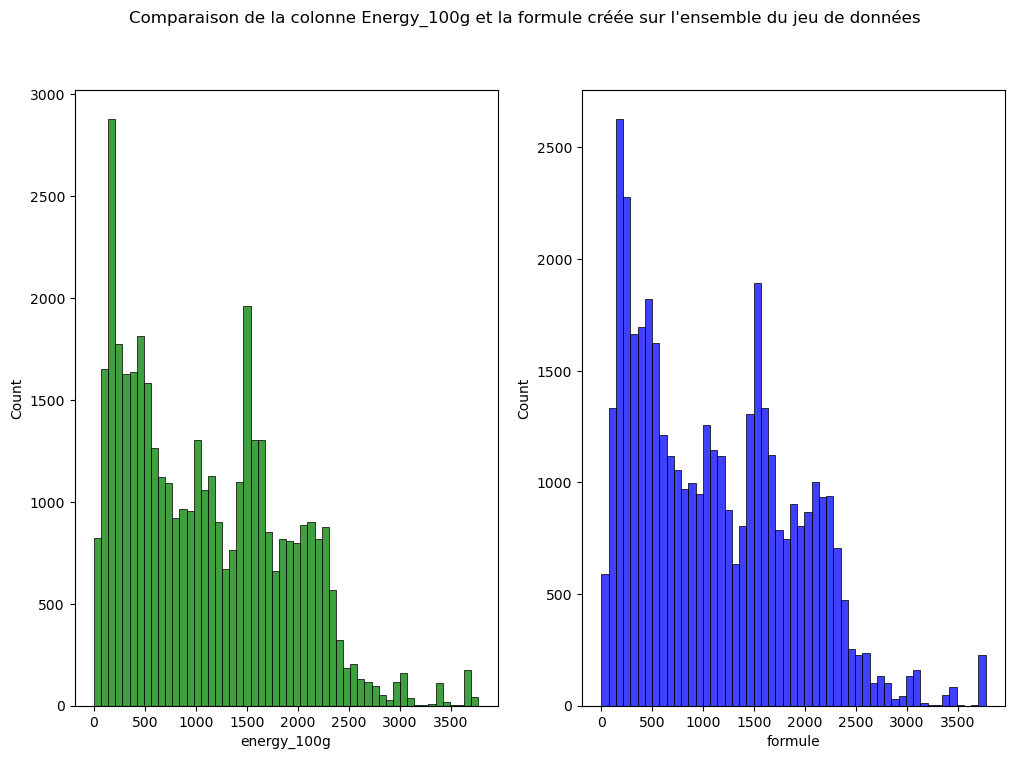

In [171]:
# Création de deux histogrammes afin de comparer leurs distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

fig.suptitle('Comparaison de la colonne Energy_100g et la formule créée sur l\'ensemble du jeu de données')

sns.histplot(ax=axes[0],data=df4, x='energy_100g',color='green')
sns.histplot(ax=axes[1],data=df4, x='formule',color='blue')

plt.show()


In [172]:
df4_corr = df4.corr()

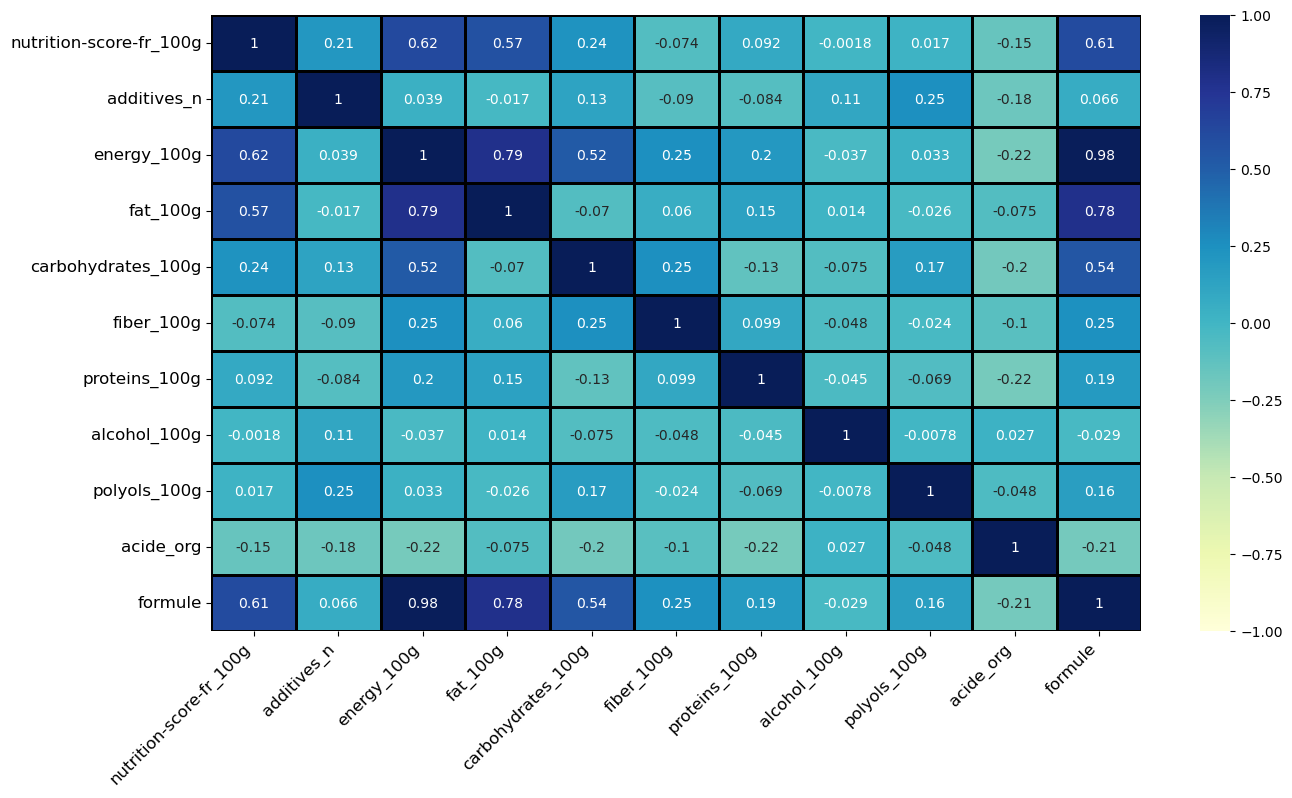

In [173]:
# Création d'une matrice de corrélation
plt.figure(figsize=(15,8))

sns.heatmap(data=df4_corr, annot=True,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1)
plt.yticks(rotation=0,fontsize = 12) 
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.show()

# Profils des catégories de produits

# PNNS_1

Je commence par observer les profils des produits en fonction du groupe Pnns 1.

In [174]:
# Création d'une copie
df_clean = df4.copy()

In [175]:
df_clean_categ = df4[['code', 'categories_fr', 'labels_fr', 'countries_fr', 'allergens',
       'traces_fr', 'nutrition_grade_fr', 'states_fr', 'main_category_fr','nutrition-score-fr_100g',
       'product_name', 'generic_name', 'quantity', 'additives_n', 'additives',
       'additives_tags', 'packaging_tags', 'categories_tags']]

In [176]:
df_clean = df4[['pnns_groups_1', 'pnns_groups_2','formule','energy_100g','fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'alcohol_100g', 'polyols_100g','acide_org']];


In [177]:
# J'affiche les valeurs minimales et maximales en fonction des groupes pnns 1
df_clean.groupby('pnns_groups_1').agg(['min', 'max']).round(2).T


pnns_groups_1                     beverages cereals and potatoes  \
pnns_groups_2      min  alcoholic beverages                bread   
                   max  sweetened beverages             potatoes   
formule            min                  0.0                80.32   
                   max               2610.5              3200.92   
energy_100g        min                  0.0                 59.7   
                   max               2415.0               3770.0   
fat_100g           min                  0.0                  0.0   
                   max                 43.9                 72.0   
carbohydrates_100g min                  0.0                  0.0   
                   max                 99.0                 92.0   
fiber_100g         min                  0.0                  0.0   
                   max                67.19                 57.6   
proteins_100g      min                  0.0                  0.0   
                   max                 86.0                 50.5   
alcohol_100g       min                  0.0                  0.0   
                   max                 20.0                  1.3   
polyols_100g       min                  0.0                  0.0   
                   max                 96.0                34.03   
acide_org          min                  0.0                  0.0   
                   max                 2.01                 0.54   

pnns_groups_1          composite foods        fat and sauces fish meat eggs  \
pnns_groups_2      min  one dish meals  dressings and sauces           eggs   
                   max        sandwich                  fats   tripe dishes   
formule            min            53.3                   0.0           94.8   
                   max          3019.3                3770.0         2992.0   
energy_100g        min            41.0                   0.0           1.85   
                   max          3017.0                3772.0         2992.0   
fat_100g           min             0.0                   0.0            0.0   
                   max            70.0                 100.0           70.0   
carbohydrates_100g min             0.0                   0.0            0.0   
                   max            97.0                  96.0           65.0   
fiber_100g         min             0.0                   0.0            0.0   
                   max           64.82                 99.22           83.3   
proteins_100g      min             0.0                   0.0            0.0   
                   max            44.0                  46.0           53.0   
alcohol_100g       min             0.0                   0.0            0.0   
                   max             3.0                  12.0            1.3   
polyols_100g       min             0.0                   0.0            0.0   
                   max           34.03                  15.0          34.03   
acide_org          min             0.0                   0.0            0.0   
                   max            1.35                  2.02            1.6   

pnns_groups_1          fruits and vegetables milk and dairy products  \
pnns_groups_2      min          dried fruits                  cheese   
                   max            vegetables         milk and yogurt   
formule            min                   0.0                    52.4   
                   max               3137.29                  3757.0   
energy_100g        min                   0.0                     1.0   
                   max                3096.0                  3757.0   
fat_100g           min                   0.0                     0.0   
                   max                  74.0                    99.8   
carbohydrates_100g min                   0.0                     0.0   
                   max                  98.4                    96.0   
fiber_100g         min                   0.0                     0.0   
                   max                 77.41   

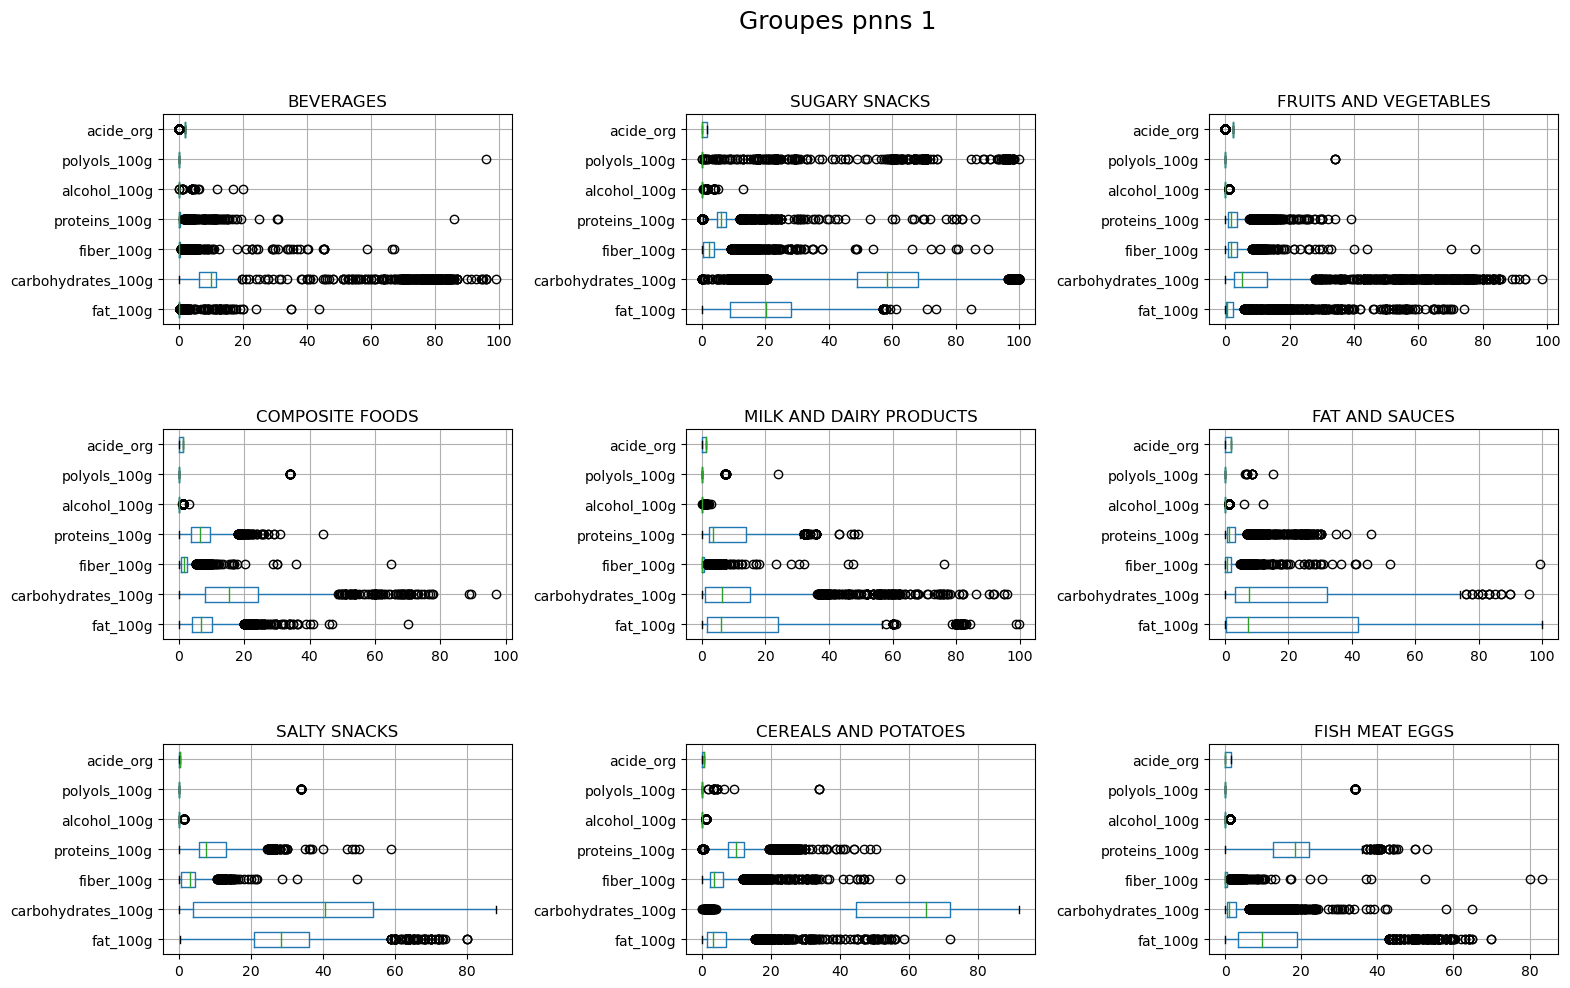

In [178]:
# Je crée un ensemble de graphique en utilisant une boucle pour afficher sous forme de boxplots mes produits regroupés par
# groupes pnns_1 sur l'ensemble des variables quantitatives de df_clean 
pnns_1 = ['beverages', 'sugary snacks', 'fruits and vegetables',
       'composite foods', 'milk and dairy products', 'fat and sauces',
       'salty snacks', 'cereals and potatoes', 'fish meat eggs']


plt.figure(figsize=(18, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Groupes pnns 1", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, pnns_1 in enumerate(pnns_1):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n + 1)

    # filter df and plot ticker on the new subplot axis
    df_clean[df_clean["pnns_groups_1"] == pnns_1][['fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g','alcohol_100g', 'polyols_100g', 'acide_org']].boxplot(ax=ax,vert=False,meanline=True)
    
    # chart formatting
    ax.set_title(pnns_1.upper())
    

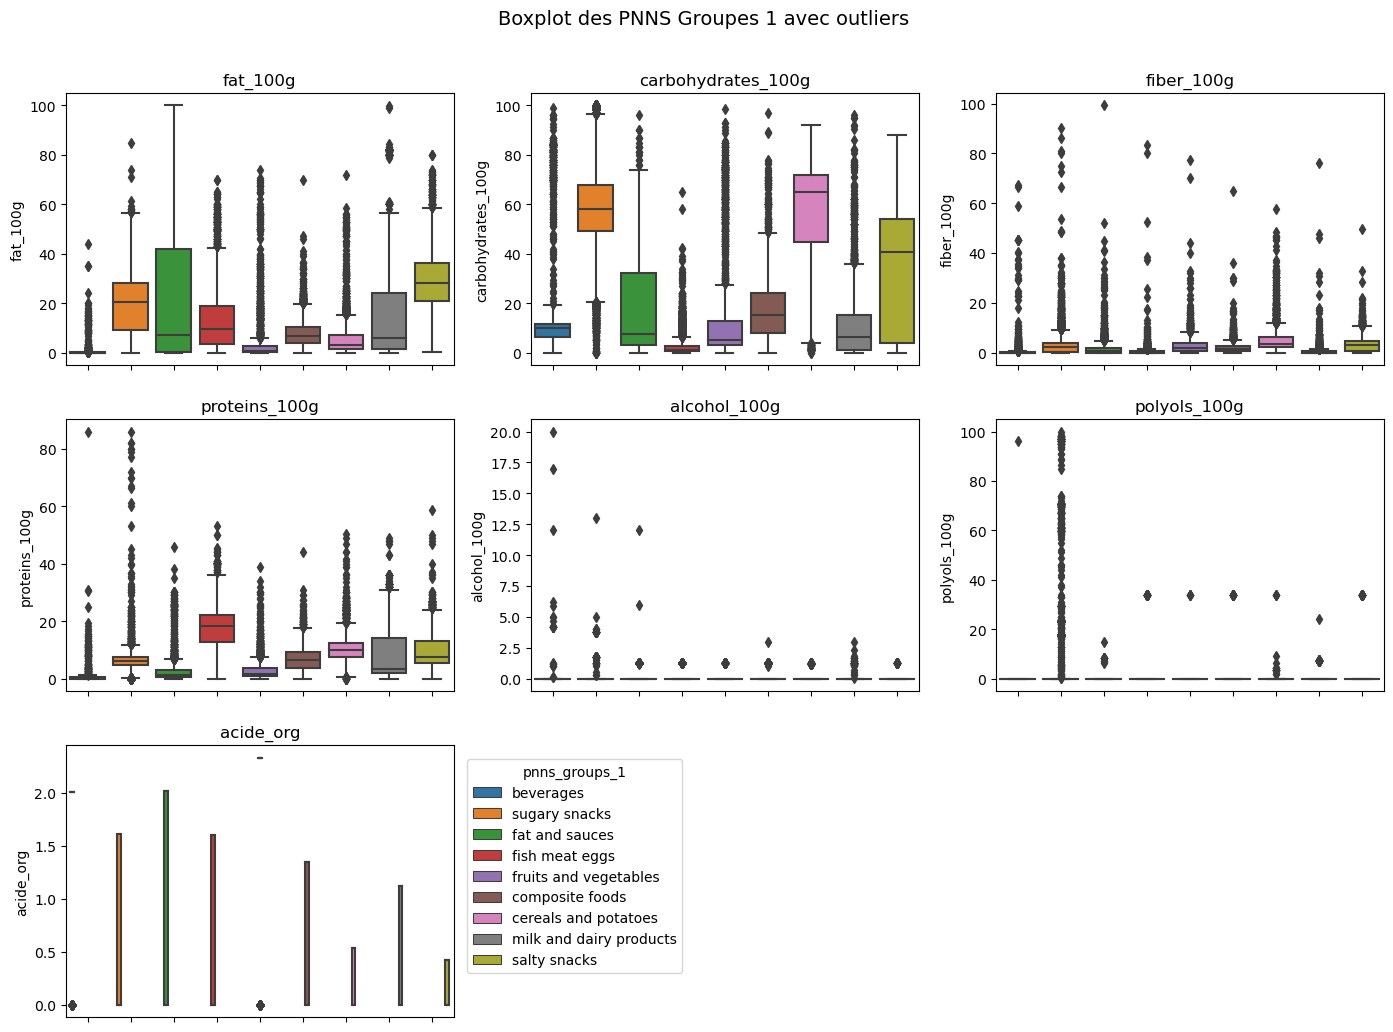

In [179]:
fig, axes = plt.subplots(3, 3, figsize=(17, 12))
#fig.subplots_adjust(hspace=0.2)


fig.suptitle("Boxplot des PNNS Groupes 1 avec outliers", fontsize=14, y=0.95)

sns.boxplot(ax=axes[0, 0], data=df_clean, x='pnns_groups_1', y='fat_100g')
axes[0, 0].set(xticklabels=[]) 
axes[0, 0].set(xlabel=None)
axes[0, 0].set(title='fat_100g')

sns.boxplot(ax=axes[0, 1], data=df_clean, x='pnns_groups_1', y='carbohydrates_100g')
axes[0, 1].set(xticklabels=[]) 
axes[0, 1].set(xlabel=None)
axes[0, 1].set(title='carbohydrates_100g')

sns.boxplot(ax=axes[0, 2], data=df_clean, x='pnns_groups_1', y='fiber_100g')
axes[0, 2].set(xticklabels=[]) 
axes[0, 2].set(xlabel=None)
axes[0, 2].set(title='fiber_100g')

sns.boxplot(ax=axes[1,0], data=df_clean, x='pnns_groups_1', y='proteins_100g')
axes[1, 0].set(xticklabels=[]) 
axes[1,0].set(xlabel=None)
axes[1,0].set(title='proteins_100g')

sns.boxplot(ax=axes[1, 1], data=df_clean, x='pnns_groups_1', y='alcohol_100g')
axes[1, 1].set(xticklabels=[]) 
axes[1,1].set(xlabel=None)
axes[1, 1].set(title='alcohol_100g')

sns.boxplot(ax=axes[1,2], data=df_clean, x='pnns_groups_1', y='polyols_100g')

axes[1,2].set(xticklabels=[]) 
axes[1,2].set(xlabel=None)
axes[1,2].set(title='polyols_100g')

sns.boxplot(ax=axes[2,0], data=df_clean, x='pnns_groups_1', y='acide_org', hue='pnns_groups_1')
axes[2,0].set(xticklabels=[]) 
axes[2,0].set(xlabel=None)
axes[2,0].set(title='acide_org')
sns.move_legend(axes[2, 0],"upper left", bbox_to_anchor=(1, 1), borderaxespad=1)

fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.show()

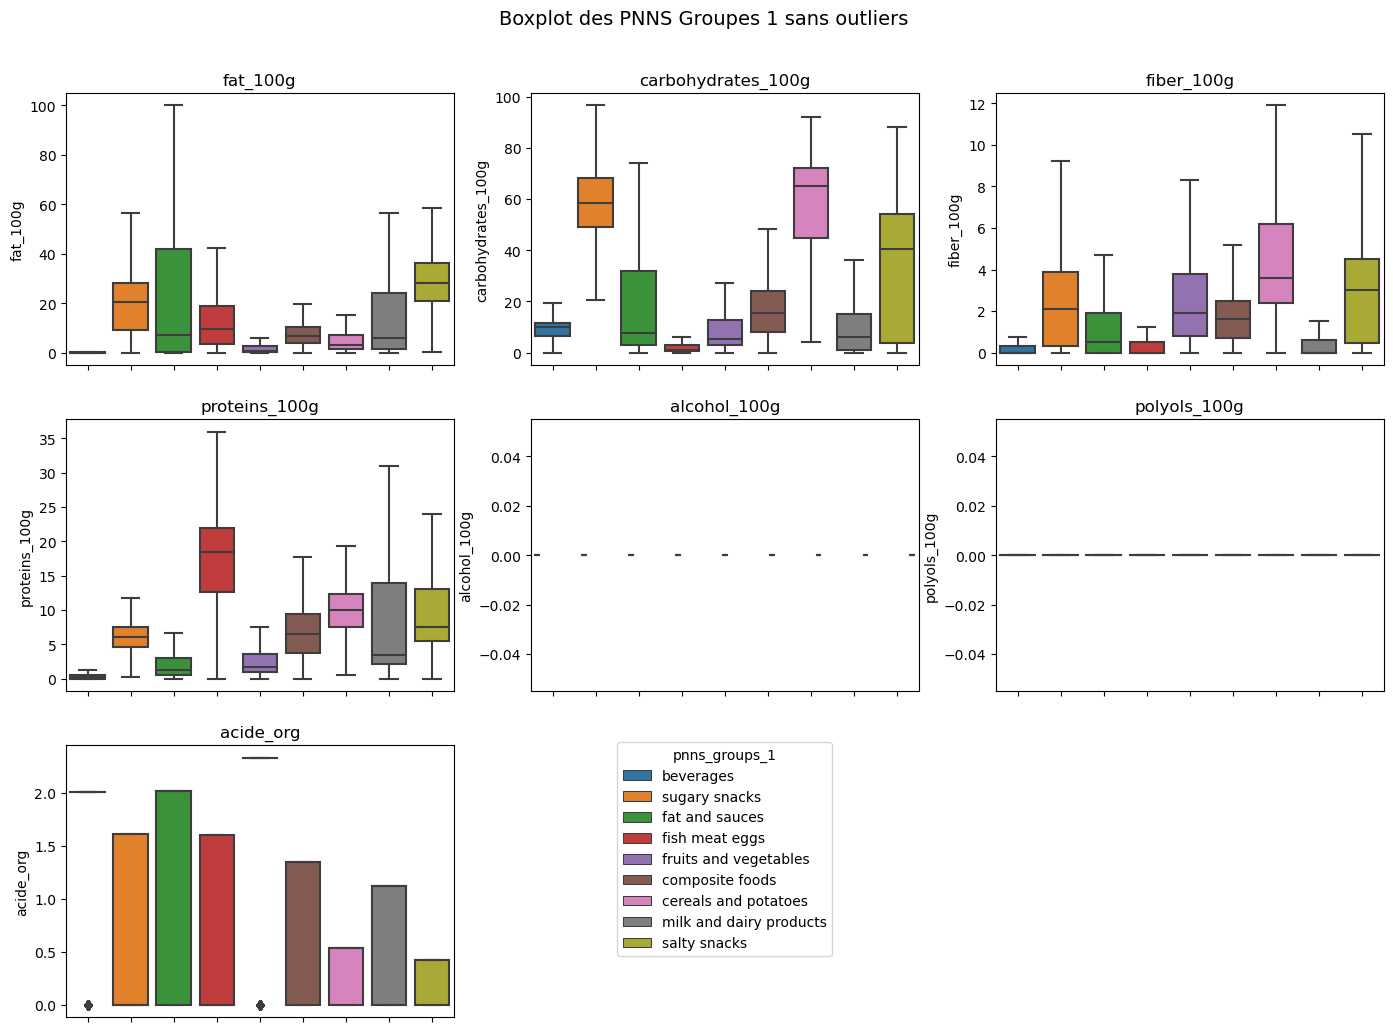

In [180]:
fig, axes = plt.subplots(3, 3, figsize=(17, 12))
#fig.subplots_adjust(hspace=0.2)


fig.suptitle("Boxplot des PNNS Groupes 1 sans outliers", fontsize=14, y=0.95)

sns.boxplot(ax=axes[0, 0], data=df_clean, x='pnns_groups_1', y='fat_100g', showfliers=False)
axes[0, 0].set(xticklabels=[]) 
axes[0, 0].set(xlabel=None)
axes[0, 0].set(title='fat_100g')

sns.boxplot(ax=axes[0, 1], data=df_clean, x='pnns_groups_1', y='carbohydrates_100g', showfliers=False)
axes[0, 1].set(xticklabels=[]) 
axes[0, 1].set(xlabel=None)
axes[0, 1].set(title='carbohydrates_100g')

sns.boxplot(ax=axes[0, 2], data=df_clean, x='pnns_groups_1', y='fiber_100g', showfliers=False)
axes[0, 2].set(xticklabels=[]) 
axes[0, 2].set(xlabel=None)
axes[0, 2].set(title='fiber_100g')

sns.boxplot(ax=axes[1,0], data=df_clean, x='pnns_groups_1', y='proteins_100g', showfliers=False)
axes[1, 0].set(xticklabels=[]) 
axes[1,0].set(xlabel=None)
axes[1,0].set(title='proteins_100g')

sns.boxplot(ax=axes[1, 1], data=df_clean, x='pnns_groups_1',hue='pnns_groups_1', y='alcohol_100g', showfliers=False)
axes[1, 1].set(xticklabels=[]) 
axes[1,1].set(xlabel=None)
axes[1, 1].set(title='alcohol_100g')
sns.move_legend(axes[1, 1], "lower center",bbox_to_anchor=(0.5, -1))

sns.boxplot(ax=axes[1,2], data=df_clean, x='pnns_groups_1', y='polyols_100g', showfliers=False)

axes[1,2].set(xticklabels=[]) 
axes[1,2].set(xlabel=None)
axes[1,2].set(title='polyols_100g')


sns.boxplot(ax=axes[2,0], data=df_clean, x='pnns_groups_1', y='acide_org', showfliers=True)
axes[2,0].set(xticklabels=[]) 
axes[2,0].set(xlabel=None)
axes[2,0].set(title='acide_org')

fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])


plt.show()

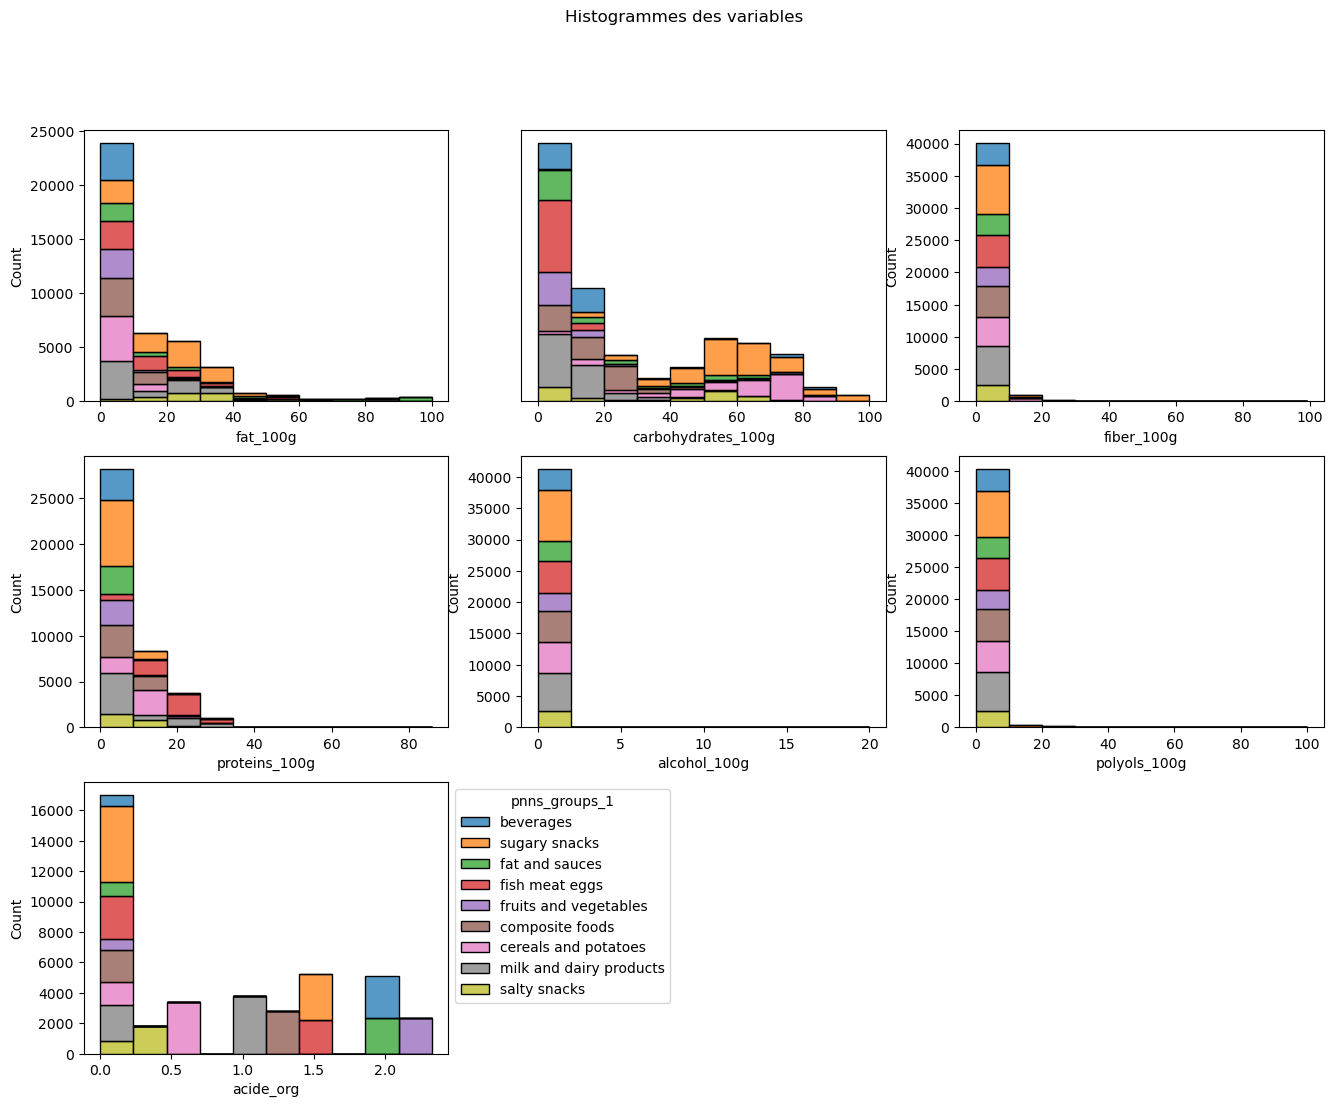

In [181]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

fig.suptitle('Histogrammes des variables')

sns.histplot(ax=axes[0, 0],data=df_clean, x='fat_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False)

sns.histplot(ax=axes[0, 1],data=df_clean, x='carbohydrates_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False)
axes[0, 1].get_yaxis().set_visible(False)

sns.histplot(ax=axes[0, 2],data=df_clean, x='fiber_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False)
sns.histplot(ax=axes[1, 0],data=df_clean, x='proteins_100g',hue='pnns_groups_1', bins=10, multiple='stack',legend=False)


sns.histplot(ax=axes[1, 1],data=df_clean, x='alcohol_100g',hue='pnns_groups_1', bins=10, multiple='stack',legend=False)
sns.histplot(ax=axes[1, 2],data=df_clean, x='polyols_100g',hue='pnns_groups_1', bins=10, multiple='stack',legend=False)
sns.histplot(ax=axes[2, 0],data=df_clean, x='acide_org',hue='pnns_groups_1', bins=10, multiple='stack')
sns.move_legend(axes[2, 0], "best", bbox_to_anchor=(1, 1))


fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.show()

In [182]:
df_final = pd.concat([df_clean_categ,df_clean],axis=1)

In [183]:
df_final

code                                      categories_fr  \
226     0000040608754  Boissons,Boissons gazeuses,Sodas,Sodas au cola...   
242            000010  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
279            000030  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
299            000050  Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
452          00011501  Aliments et boissons à base de végétaux,Alimen...   
...               ...                                                ...   
320656  9557129019006  Aliments et boissons à base de végétaux,Alimen...   
320668  9577283844672  Aliments et boissons à base de végétaux,Boisso...   
320702       96118580        Snacks sucrés,Confiseries,Bonbons,Pastilles   
320751  9847548283004  Aliments et boissons à base de végétaux,Alimen...   
320763       99111250  Aliments et boissons à base de végétaux,Boisso...   

                                                labels_fr        countries_fr  \
226                                                   NaN              France   
242                                                   NaN              France   
279                         Point Vert,Fabriqué en France              France   
299                         Point Vert,Fabriqué en France              France   
452     en:Point-vert,en:Sans-aromes-artificiels,en:Sa...  France,Royaume-Uni   
...                                                   ...                 ...   
320656                                                NaN              France   
320668             Point Vert,Pur jus,Riche en vitamine C              France   
320702                     Peu ou pas de sucre,Sans sucre              France   
320751  Bio,Bio européen,Sans gluten,AB Agriculture Bi...              France   
320763  Commerce équitable,Bio,Bio européen,Max Havela...              France   

                                   allergens            traces_fr  \
226                                      NaN                  NaN   
242                    blé, oeufs, blé, lait  Fruits à coque,Soja   
279                     blé, œufs, blé, lait  Fruits à coque,Soja   
299     œufs, amande, beurre, blé, œufs, blé  Fruits à coque,Soja   
452                                      NaN                  NaN   
...                                      ...                  ...   
320656                                   NaN                  NaN   
320668                                   NaN                  NaN   
320702                                   NaN                  NaN   
320751                                   NaN                  NaN   
320763                                   NaN                  NaN   

       nutrition_grade_fr                                          states_fr  \
226                     e  A vérifier,Complet,Informations nutritionnelle...   
242                     d  A vérifier,Complet,Informations nutritionnelle...   
279                     d  A vérifier,Complet,Informations nutritionnelle...   
299                     e  A vérifier,Complet,Informations nutritionnelle...   
452                     d  A vérifier,Complet,Informations nutritionnelle...   
...                   ...                                                ...   
320656                  d  A compléter,Informations nutritionnelles compl...   
320668                  c  A vérifier,Complet,Informations nutritionnelle...   
320702                  b  A vérifier,Complet,Informations nutritionnelle...   
320751                  a  A compléter,Informations nutritionnelles compl...   
320763                  c  A vérifier,Complet,Informations nutritionnelle...   

       main_category_fr  nutrition-score-fr_100g  \
226               Sodas                       13   
242             Gâteaux                       12   
279             Gâteaux                       13   
299         Pâtisseries                       22   
452          Condiments                       14   
...                 ...      

# Nutriscore

Je dois séparer les produits liquides car leur Nutriscore n'est pas le même que celui des autres aliments.

In [184]:
# Création de différentes copies pour tester les méthodes d'imputation
df = df_final.copy()
df_knn = df_final.copy()
df_moyenne = df_final.copy()

In [185]:
df['nutrition-score-fr_100g'].isna().mean()

0.014957832926564048

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


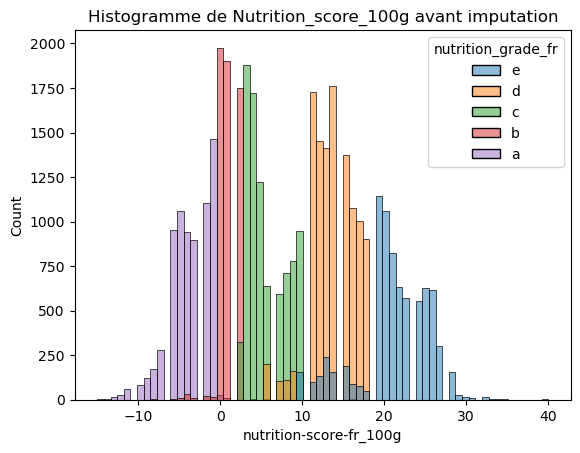

In [186]:
# J'affiche la distribution des données avant imputation afin de pouvoir la comparer par la suite
sns.histplot(data = df, x='nutrition-score-fr_100g',hue='nutrition_grade_fr')
plt.title('Histogramme de Nutrition_score_100g avant imputation')
plt.show()


In [187]:
# Je crée une dataframe avec l'ensemble des produits liquides
liquide = df.loc[df['pnns_groups_1']=='beverages',:]
liquide = liquide.sort_values('nutrition_grade_fr')

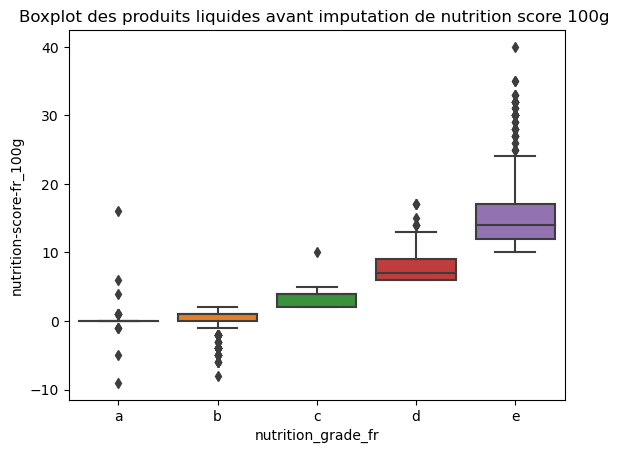

In [188]:
# Affichage par boxplot en fonction de nutrition grade 
sns.boxplot(data= liquide, y='nutrition-score-fr_100g', x='nutrition_grade_fr')
plt.title('Boxplot des produits liquides avant imputation de nutrition score 100g ')

plt.show()

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


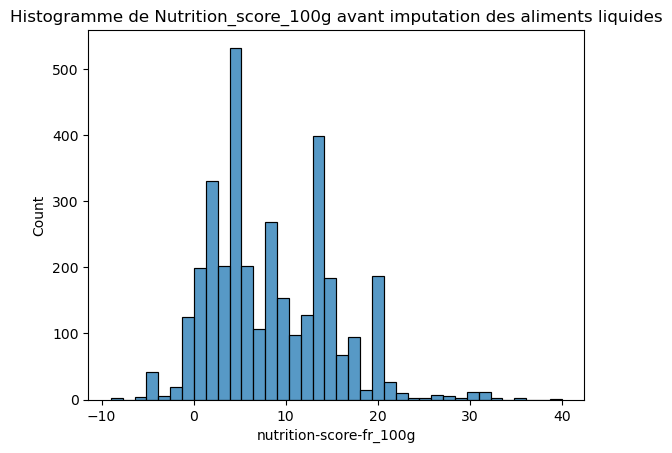

In [189]:
sns.histplot(liquide['nutrition-score-fr_100g'])
plt.title('Histogramme de Nutrition_score_100g avant imputation des aliments liquides')
plt.show()


In [190]:
# Séparation des variables catégorielles et numériques
liquide_sans_nan = liquide[['nutrition-score-fr_100g','energy_100g', 'formule', 'fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'alcohol_100g',
       'polyols_100g', 'acide_org','additives_n']].dropna(subset=['nutrition-score-fr_100g','energy_100g'])
liquide_sans_nan_categ = liquide.loc[~df['nutrition-score-fr_100g'].isna(),][['code', 'product_name', 'pnns_groups_1', 'pnns_groups_2', 'allergens',
       'nutrition_grade_fr','additives', 'additives_tags']]

In [191]:
# Je renomme ma colonne et je modifie le type des colonnes nutrition score et additives_n
liquide_sans_nan.rename(columns={'nutrition-score-fr_100g':'nutrition_score_fr_100g'},inplace=True)
liquide_sans_nan['nutrition_score_fr_100g'] = liquide_sans_nan['nutrition_score_fr_100g'].astype('float')
liquide_sans_nan['additives_n'] = liquide_sans_nan['additives_n'].astype('float')

In [192]:
liquide_sans_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3453 entries, 223841 to 211672
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nutrition_score_fr_100g  3453 non-null   float64
 1   energy_100g              3453 non-null   float64
 2   formule                  3453 non-null   float64
 3   fat_100g                 3453 non-null   float64
 4   carbohydrates_100g       3453 non-null   float64
 5   fiber_100g               3453 non-null   float64
 6   proteins_100g            3453 non-null   float64
 7   alcohol_100g             3453 non-null   float64
 8   polyols_100g             3453 non-null   float64
 9   acide_org                3453 non-null   float64
 10  additives_n              3453 non-null   float64
dtypes: float64(11)
memory usage: 323.7 KB


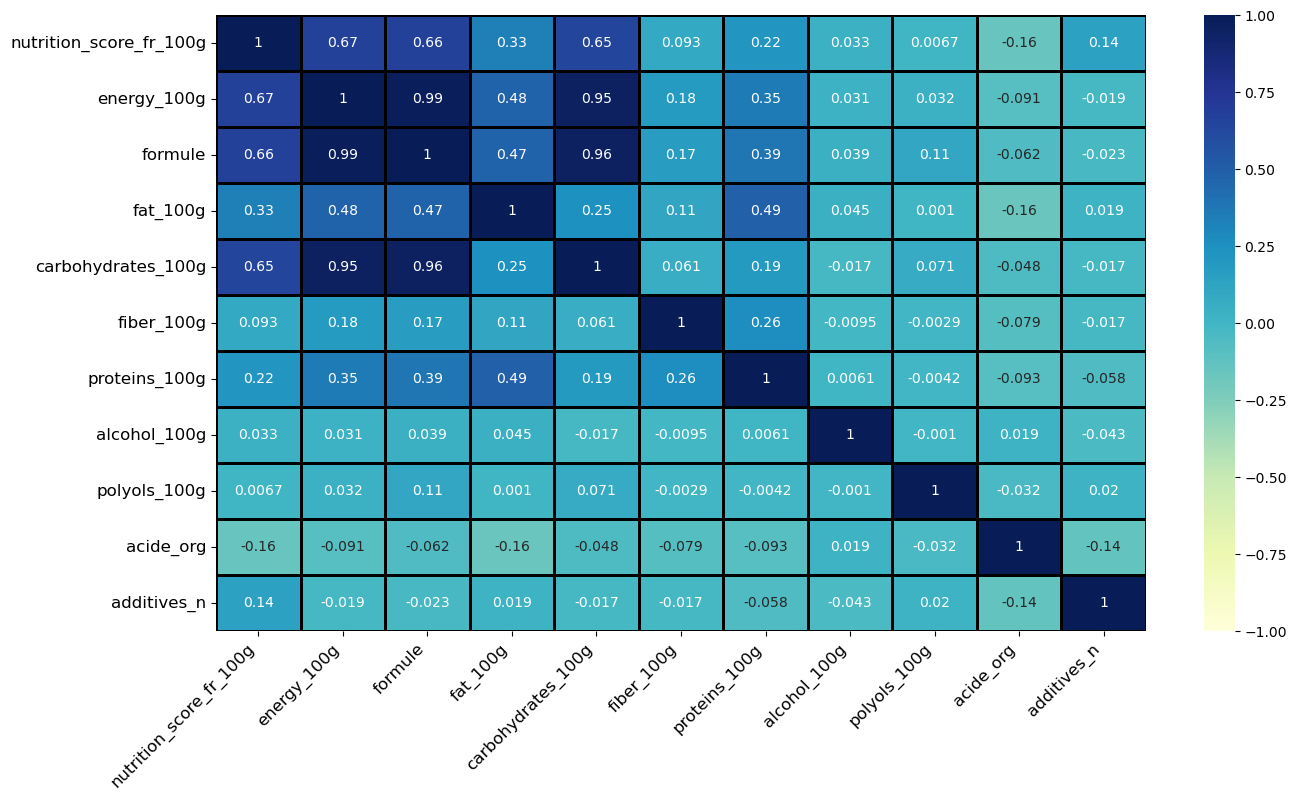

In [193]:
liquide_sans_nan_corr = liquide_sans_nan.corr();

plt.figure(figsize=(15,8))

sns.heatmap(data=liquide_sans_nan_corr, annot=True,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1)
plt.yticks(rotation=0,fontsize = 12) 
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.show()

On remarque que nutrition_score est le plus corrélé avec energy_100g/formule et carbohydrates_100g.

In [194]:
liquide_sans_nan.columns

Index(['nutrition_score_fr_100g', 'energy_100g', 'formule', 'fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'alcohol_100g',
       'polyols_100g', 'acide_org', 'additives_n'],
      dtype='object')

# test d'imputation par regression multiple

In [195]:
import statsmodels.formula.api as smf

Pour imputer mes valeurs manquantes, j'utilise la regression multiple.

In [196]:
# Je commence par utiliser toutes mes variables.
reg_multi_liq = smf.ols('nutrition_score_fr_100g~energy_100g+formule+fat_100g+carbohydrates_100g+fiber_100g+proteins_100g+alcohol_100g+polyols_100g+acide_org+additives_n', data=liquide_sans_nan).fit();
print(reg_multi_liq.summary())

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.484
Model:                                 OLS   Adj. R-squared:                  0.483
Method:                      Least Squares   F-statistic:                     358.8
Date:                     Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                             14:15:21   Log-Likelihood:                -10258.
No. Observations:                     3453   AIC:                         2.054e+04
Df Residuals:                         3443   BIC:                         2.060e+04
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [197]:
# Je retire la variable fiber_100g
reg_multi_liq = smf.ols('nutrition_score_fr_100g~energy_100g+formule+fat_100g+carbohydrates_100g+alcohol_100g+polyols_100g+acide_org+additives_n', data=liquide_sans_nan).fit();
print(reg_multi_liq.summary())

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.484
Model:                                 OLS   Adj. R-squared:                  0.483
Method:                      Least Squares   F-statistic:                     403.7
Date:                     Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                             14:15:21   Log-Likelihood:                -10258.
No. Observations:                     3453   AIC:                         2.053e+04
Df Residuals:                         3444   BIC:                         2.059e+04
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Ce tableau nous montre que toutes les variables ont une p-value inférieur à 0.5%.  
On peut rejeter l'hypothèse H0 et dire que ces variables sont corrélées à la variable 'nutrition_score_100g.  

In [198]:
liquide_nan = liquide.loc[liquide['nutrition-score-fr_100g'].isna(),][['nutrition-score-fr_100g','energy_100g', 'formule', 'fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'alcohol_100g',
       'polyols_100g', 'acide_org','additives_n']]
liquide_nan_categ = liquide.loc[liquide['nutrition-score-fr_100g'].isna(),][['code', 'product_name', 'pnns_groups_1', 'pnns_groups_2', 'allergens',
       'nutrition_grade_fr','additives', 'additives_tags']]

In [199]:
liquide_nan['nutrition-score-fr_100g'] = liquide_nan['nutrition-score-fr_100g'].astype('float')
liquide_nan['additives_n'] = liquide_nan['additives_n'].astype('float')

In [200]:
# J'enregistre mes predictions
pred_reg_liq = reg_multi_liq.predict(liquide_nan).astype('int')

In [201]:
liquide_nan['nutrition-score-fr_100g']= pred_reg_liq

In [202]:
liquide_nan.head(4)

nutrition-score-fr_100g  energy_100g  formule  fat_100g  \
191018                        8        196.0    199.1       0.1   
208675                        8        198.0    198.3       0.1   
210284                        9        238.0    238.2       0.1   
253130                        8        205.0    209.5       0.1   

        carbohydrates_100g  fiber_100g  proteins_100g  alcohol_100g  \
191018                11.0         0.2            0.4           0.0   
208675                11.0         0.1            0.4           0.0   
210284                13.5         0.2            0.2           0.0   
253130                11.1         1.5            0.3           0.0   

        polyols_100g  acide_org  additives_n  
191018           0.0        0.0          1.0  
208675           0.0        0.0          1.0  
210284           0.0        0.0          2.0  
253130           0.0        0.0          1.0

In [203]:
liquide_sans_nan.rename(columns={'nutrition_score_fr_100g':'nutrition-score-fr_100g'},inplace=True)

In [204]:
final_liq = pd.concat([liquide_sans_nan, liquide_nan], axis=0)
final_liq_categ = pd.concat([liquide_sans_nan_categ, liquide_nan_categ], axis=0)

In [205]:
df_final_liq = pd.concat([final_liq_categ,final_liq], axis=1)

In [206]:
df_final_liq

code                                product_name  \
223841  3297569600001                                  Australine   
178406       20171124                      Eau minérale naturelle   
180946       20656935                    Pétillante saveur Citron   
198272  3179732368942                 Perrier citron vert, limoen   
192073  3068320107844                            Badoit Framboise   
...               ...                                         ...   
304283  8016438002013                         Citron bio sicilien   
304284  8016438002068                             Citron vert bio   
312901  8690558020036                        DIMES Active Grenade   
315471  8718096126673            I'm coco Fresh & Delicious juice   
315786  8718858610006  Charlie's Lemon, Lime & Mint Natural Soda    

       pnns_groups_1          pnns_groups_2 allergens nutrition_grade_fr  \
223841     beverages  non sugared beverages       NaN                  a   
178406     beverages  non sugared beverages       NaN                  a   
180946     beverages  non sugared beverages       NaN                  a   
198272     beverages  non sugared beverages       NaN                  a   
192073     beverages  non sugared beverages       NaN                  a   
...              ...                    ...       ...                ...   
304283     beverages    alcoholic beverages       NaN                NaN   
304284     beverages    alcoholic beverages       NaN                NaN   
312901     beverages    alcoholic beverages       NaN                NaN   
315471     beverages  non sugared beverages       NaN                NaN   
315786     beverages    sweetened beverages       NaN                NaN   

                                                additives  \
223841   [ hydrogeno-carbonates -> fr:hydrogeno-carbon...   
178406   [ eau-minerale-naturelle -> fr:eau-minerale-n...   
180946   [ eau-minerale-naturelle-gazeifiee -> fr:eau-...   
198272   [ eau-minerale-naturelle-perrier -> fr:eau-mi...   
192073   [ eau-minerale-naturelle-gazeifiee-badoit-99-...   
...                                                   ...   
304283   [ jus-de-citron -> fr:jus-de-citron  ]  [ jus...   
304284   [ 100-jus-de-citron-vert -> fr:100-jus-de-cit...   
312901                                        sans alcool   
315471   [ eau-de-coco -> fr:eau-de-coco  ]  [ eau-de ...   
315786   [ eau-gazeifiee -> fr:eau-gazeifiee  ]  [ eau...   

                 additives_tags  nutrition-score-fr_100g  energy_100g  \
223841  en:e470,en:e504,en:e341                      0.0          0.0   
178406              sans alcool                      0.0          0.0   
180946              sans alcool                      1.0          1.0   
198272              sans alcool                      1.0          2.0   
192073              sans alcool                      1.0          1.0   
...                         ...                      ...          ...   
304283              sans alcool                      5.0        120.0   
304284              sans alcool                      5.0        121.0   
312901              sans alcool                      6.0        239.0   
315471              sans alcool                      5.0        113.0   
315786              sans alcool                      5.0        136.0   

        formule  fat_100g  carbohydrates_100g  fiber_100g  proteins_100g  \
223841     0.00       0.0                 0.0     0.00000            0.0   
178406    26.13       0.0                 0.0     0.00000            0.0   
180946    26.13       0.0                 0.0     0.00000            0.0   
198272    26.13       0.0                 0.0     0.00000            0.0   
192073    26.13       0.0                 0.0     0.00000            0.0   
...         ...       ...                 ...         ...            ...   
304283   150.57       0.1                 6.5     0.43000            0.4   
304284   151.13       0.1                 6.2     0.50000

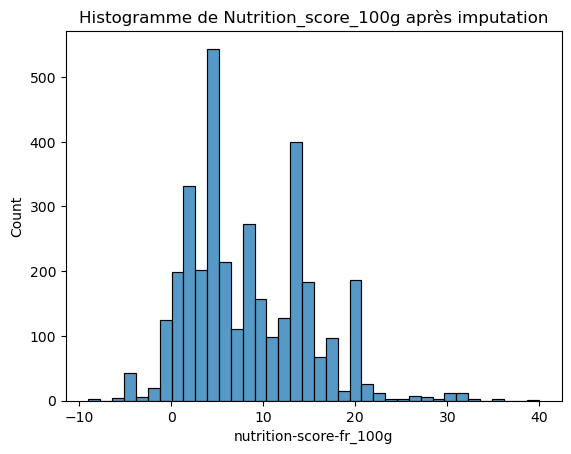

In [207]:
sns.histplot(df_final_liq['nutrition-score-fr_100g'])
plt.title('Histogramme de Nutrition_score_100g après imputation')
plt.show()

In [208]:
sns.boxplot(data= df_final_liq, y='nutrition-score-fr_100g', x='nutrition_grade_fr')

plt.show()

In [209]:
# Même procédé avec les produits non solides
solide = df.loc[df['pnns_groups_1']!='beverages',:];
solide = solide.sort_values('nutrition_grade_fr')

In [210]:
sns.histplot(solide['nutrition-score-fr_100g'])
plt.title('Histogramme de Nutrition_score_100g avant imputation des aliments non liquide')
plt.show()

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


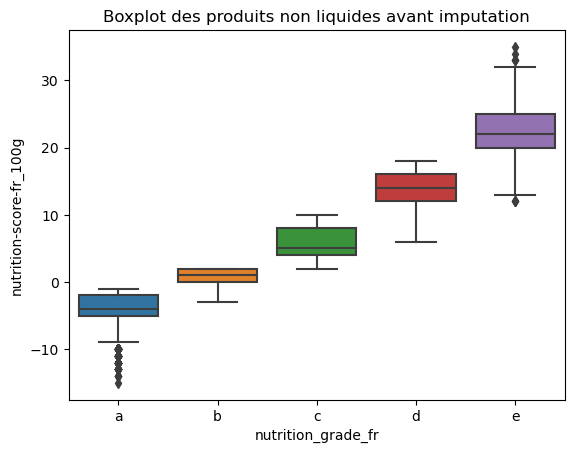

In [211]:
sns.boxplot(data= solide, y='nutrition-score-fr_100g', x='nutrition_grade_fr')
plt.title('Boxplot des produits non liquides avant imputation')
plt.show()

In [212]:
solide_sans_nan = solide[['nutrition-score-fr_100g','energy_100g', 'formule', 'fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'alcohol_100g',
       'polyols_100g', 'acide_org','additives_n']].dropna(subset=['nutrition-score-fr_100g','energy_100g'])
solide_sans_nan_categ = solide.loc[~df['nutrition-score-fr_100g'].isna(),][['code', 'product_name', 'pnns_groups_1', 'pnns_groups_2', 'allergens',
       'nutrition_grade_fr','additives', 'additives_tags']]

In [213]:
solide_sans_nan.rename(columns={'nutrition-score-fr_100g':'nutrition_score_fr_100g'},inplace=True)
solide_sans_nan['nutrition_score_fr_100g'] = solide_sans_nan['nutrition_score_fr_100g'].astype('float')
solide_sans_nan['additives_n'] = solide_sans_nan['additives_n'].astype('float')

In [214]:
solide_sans_nan_corr = solide_sans_nan.corr();


plt.figure(figsize=(15,8))

sns.heatmap(data=solide_sans_nan_corr, annot=True,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1)
plt.yticks(rotation=0,fontsize = 12) 
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.show()

In [215]:
# Je commence par utiliser toutes mes variables.
reg_multi_sol = smf.ols('nutrition_score_fr_100g~energy_100g+formule+fat_100g+carbohydrates_100g+fiber_100g+proteins_100g+alcohol_100g+polyols_100g+acide_org+additives_n', data=solide_sans_nan).fit();
print(reg_multi_sol.summary())

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.537
Model:                                 OLS   Adj. R-squared:                  0.537
Method:                      Least Squares   F-statistic:                     4330.
Date:                     Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                             14:15:22   Log-Likelihood:            -1.2158e+05
No. Observations:                    37311   AIC:                         2.432e+05
Df Residuals:                        37300   BIC:                         2.433e+05
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Toutes les variables sont également corrélées à la variable "nutrition-score-100-g"

In [216]:
solide_nan = solide.loc[solide['nutrition-score-fr_100g'].isna(),][['nutrition-score-fr_100g','energy_100g', 'formule', 'fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'alcohol_100g',
       'polyols_100g', 'acide_org','additives_n']]
solide_nan_categ = solide.loc[solide['nutrition-score-fr_100g'].isna(),][['code', 'product_name', 'pnns_groups_1', 'pnns_groups_2', 'allergens',
       'nutrition_grade_fr','additives', 'additives_tags']]

In [217]:
solide_nan['nutrition-score-fr_100g'] = solide_nan['nutrition-score-fr_100g'].astype('float')
solide_nan['additives_n'] = solide_nan['additives_n'].astype('float')

In [218]:
# J'enregistre mes predictions
pred_reg_sol = reg_multi_sol.predict(solide_nan).astype('int')

In [219]:
solide_nan['nutrition-score-fr_100g']= pred_reg_sol

In [220]:
solide_sans_nan.rename(columns={'nutrition_score_fr_100g':'nutrition-score-fr_100g'},inplace=True)

In [221]:
final_sol = pd.concat([solide_sans_nan, solide_nan], axis=0)
final_sol_categ = pd.concat([solide_sans_nan_categ, solide_nan_categ], axis=0)

In [222]:
df_final_sol = pd.concat([final_sol_categ,final_sol], axis=1)

In [223]:
df_final_sol.head(4)

code                         product_name  \
190926  3045320006919                       Compote Pêches   
200537  3222472947097  Blanquette de veau et son riz blanc   
200554  3222472958420           Spaghetti - Cuisson 3 min.   
200556  3222472958451               Torti (Cuisson 3 min.)   

                  pnns_groups_1   pnns_groups_2               allergens  \
190926  milk and dairy products  dairy desserts                     NaN   
200537           fish meat eggs            meat  crème, lait, blé, lait   
200554     cereals and potatoes        potatoes                     NaN   
200556     cereals and potatoes        potatoes                     blé   

       nutrition_grade_fr                                          additives  \
190926                  a   [ peches-85 -> fr:peches-85  ]  [ peches -> f...   
200537                  a   [ riz-cuit-39-5 -> fr:riz-cuit-39-5  ]  [ riz...   
200554                  a   [ semoule-de-ble-dur-de-qualite-superieure ->...   
200556                  a   [ semoule-de-ble-dur-de-qualite-superieure ->...   

       additives_tags  nutrition-score-fr_100g  energy_100g  formule  \
190926    sans alcool                     -1.0        439.0   453.76   
200537        en:e330                     -1.0        526.0   546.60   
200554    sans alcool                     -4.0       1504.0  1510.52   
200556    sans alcool                     -4.0       1485.0  1510.52   

        fat_100g  carbohydrates_100g  fiber_100g  proteins_100g  alcohol_100g  \
190926      0.20                24.0         1.7           0.60           0.0   
200537      3.67                15.0         1.3           7.33           0.0   
200554      1.50                72.0         2.5          12.00           0.0   
200556      1.50                72.0         2.5          12.00           0.0   

        polyols_100g  acide_org  additives_n  
190926           0.0       1.12          0.0  
200537           0.0       1.60          1.0  
200554           0.0       0.54          0.0  
200556           0.0       0.54          0.0

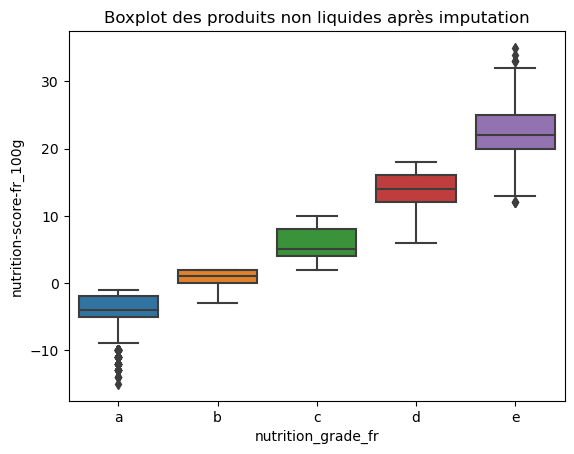

In [224]:
sns.boxplot(data= df_final_sol, y='nutrition-score-fr_100g', x='nutrition_grade_fr')
plt.title('Boxplot des produits non liquides après imputation')
plt.show()

In [225]:
df_final_reg = pd.concat([df_final_liq,df_final_sol], axis=0)

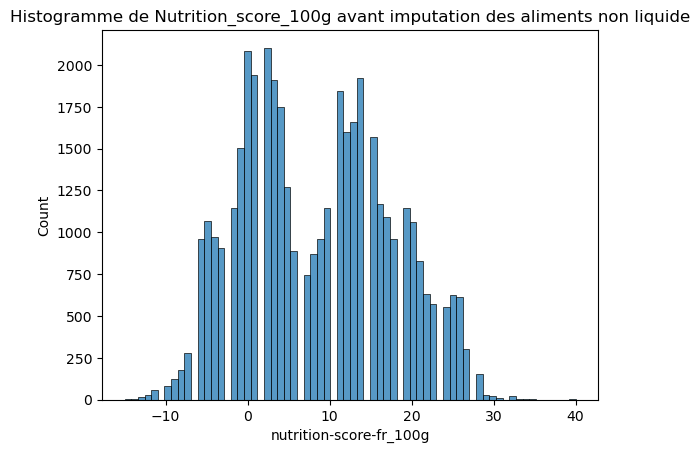

In [226]:
sns.histplot(df_final_reg['nutrition-score-fr_100g'])
plt.title('Histogramme de Nutrition_score_100g avant imputation des aliments non liquide')
plt.show()

Les regressions ont un R² de 0.48 et 0.53.  
Je vais tenter une nouvelle imputation par KNN et comparer mes résultats.

# Test d'imputation avec KNN Imputer

In [227]:
from sklearn.impute import KNNImputer

In [228]:
df_knn.select_dtypes('number')

nutrition-score-fr_100g  additives_n  formule  energy_100g  fat_100g  \
226                          13            2   176.80        177.0       0.0   
242                          12            5  1900.00       1900.0      23.0   
279                          13            5  1768.00       1768.0      19.0   
299                          22            3  1867.60       1868.0      23.0   
452                          14            1  1666.60       1665.0       0.5   
...                         ...          ...      ...          ...       ...   
320656                       16            1  3430.26       3400.0      92.0   
320668                        4            0   233.03        192.0       0.5   
320702                        2            5  2637.96       1031.0       1.3   
320751                       -4            1  1650.42       1643.0       2.8   
320763                        2            0    52.13         21.0       0.2   

        carbohydrates_100g  fiber_100g  proteins_100g  alcohol_100g  \
226                  10.40        0.00            0.0           0.0   
242                  55.00        1.50            6.0           0.0   
279                  56.00        1.80            5.8           0.0   
299                  51.00        1.70            8.0           0.0   
452                  96.00        0.10            0.9           0.0   
...                    ...         ...            ...           ...   
320656                0.00        0.00            0.0           0.0   
320668               10.20        0.60            0.6           0.0   
320702               95.31        1.47            0.0           0.0   
320751               74.80        5.90           13.0           0.0   
320763                0.50        0.20            0.5           0.0   

        polyols_100g  acide_org  
226             0.00       0.00  
242             0.00       0.00  
279             0.00       0.00  
299             0.00       0.00  
452             0.00       0.00  
...              ...        ...  
320656          0.00       2.02  
320668          0.00       2.01  
320702         93.69       1.61  
320751          0.00       0.54  
320763          0.00       2.01  

[41383 rows x 11 columns]

In [229]:
liquide_knn = df_knn.loc[df_knn['pnns_groups_1']=='beverages',:];
liquide_knn = liquide_knn.sort_values('nutrition_grade_fr')
solide_knn = df_knn.loc[df_knn['pnns_groups_1']!='beverages',:];
solide_knn = solide_knn.sort_values('nutrition_grade_fr')

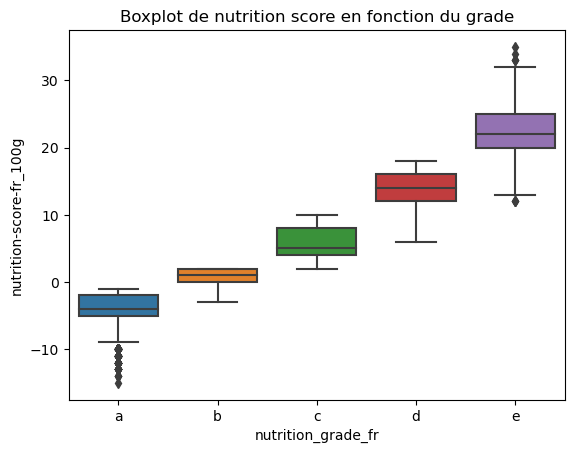

In [230]:
sns.boxplot(data=solide_knn, y='nutrition-score-fr_100g', x ='nutrition_grade_fr')
plt.title('Boxplot de nutrition score en fonction du grade')
plt.show()

In [231]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1);
solide_knn_num = solide_knn.select_dtypes('number')


In [232]:
solide_knn_num = pd.DataFrame(imputer.fit_transform(solide_knn_num),columns = solide_knn_num.columns)

In [233]:
solide_knn_categ = solide_knn.select_dtypes('object');
solide_final = pd.concat([solide_knn_categ,solide_knn_num],axis=1);
solide_final = solide_final.sort_values('nutrition_grade_fr')
solide_final.head()

code                                      categories_fr  \
190926  3045320006919  Aliments et boissons à base de végétaux,Alimen...   
278431  5410376322777   Surgelés,Chips et frites,Frites,Frites surgelées   
278430  5410376123008   Surgelés,Chips et frites,Frites,Frites surgelées   
278190  5410188031935  Aliments et boissons à base de végétaux,Alimen...   
278893  5411188080091  Aliments et boissons à base de végétaux,Boisso...   

                                                labels_fr  \
190926                                                NaN   
278431                                    Sans gluten,EAC   
278430                         Bio,Bio européen,BE-BIO-01   
278190    Sans colorants,Sans conservateurs,Sans additifs   
278893  Bio,Végétarien,Bio européen,FSC,Sans gluten,Vé...   

                  countries_fr allergens traces_fr nutrition_grade_fr  \
190926                  France       NaN     Noyau                  a   
278431                  France       NaN       NaN                  a   
278430                  France       NaN       NaN                  a   
278190                  France       NaN       NaN                  a   
278893  France,Italien,Schweiz      soja       NaN                  a   

                                                states_fr main_category_fr  \
190926  A vérifier,Complet,Informations nutritionnelle...         Desserts   
278431  A vérifier,Complet,Informations nutritionnelle...  Chips et frites   
278430  A vérifier,Complet,Informations nutritionnelle...  Chips et frites   
278190  A compléter,Informations nutritionnelles compl...           Soupes   
278893  A vérifier,Complet,Informations nutritionnelle...         Boissons   

                             product_name       generic_name quantity  \
190926                     Compote Pêches  Compote de Pêches    600 g   
278431  Frites belges Foodservice Quality                NaN     1 kg   
278430                             Frites                NaN     1 kg   
278190  Soupe chaude Petits pois & menthe   Soupe de légumes      1 l   
278893               Lait de soja vanille                NaN      1 L   

                                                additives additives_tags  \
190926   [ peches-85 -> fr:peches-85  ]  [ peches -> f...    sans alcool   
278431   [ pommes-de-terre -> fr:pommes-de-terre  ]  [...    sans alcool   
278430   [ pommes-de-terre-bio -> fr:pommes-de-terre-b...    sans alcool   
278190                                        sans alcool    sans alcool   
278893   [ eau -> fr:eau  ]  [ feves-de-soja-decortiqu...    sans alcool   

                         packaging_tags  \
190926      bocal-verre,couvercle-metal   
278431         sachet,plastique,surgele   
278430                plastique,surgele   
278190                    brique,carton   
278893  brique,carton,bouchon,plastique   

                                          categories_tags  \
190926  fruits and vegetables based foods,desserts,fru...   
278431    frozen foods,chips and fries,fries,frozen fries   
278430    frozen foods,chips and fries,fries,frozen fries   
278190  fruits and vegetables based foods,meals,soups,...   
278893  beverages,legumes and their products,plant bas...   

                  pnns_groups_1    pnns_groups_2  nutrition-score-fr_100g  \
190926  milk and dairy products   dairy desserts                      NaN   
278431          composite foods   one dish meals                      NaN   
278430          composite foods   one dish meals                      NaN   
278190    fruits and vegetables            soups                      NaN   
278893  milk and dairy products  milk and yogurt                      NaN   

        additives_n  formule  energy_100g  fat_100g  carbohydrates_100g  \
190926          NaN      NaN          NaN       NaN                 NaN   
278431          NaN      NaN          NaN       NaN                 NaN   
278430          NaN      NaN          NaN       NaN                 NaN   


In [234]:
sns.boxplot(data=solide_final, y='nutrition-score-fr_100g', x ='nutrition_grade_fr')

<AxesSubplot: xlabel='nutrition_grade_fr', ylabel='nutrition-score-fr_100g'>

Cette technique ne convient pas également pour imputer mes valeurs manquantes.  

# Imputation par la moyenne

In [235]:
df_moyenne['nutrition-score-fr_100g'] = df_moyenne['nutrition-score-fr_100g'].astype('float64')

In [236]:
df_moyenne.isna().mean()

code                       0.000000
categories_fr              0.000000
labels_fr                  0.443830
countries_fr               0.000000
allergens                  0.534374
traces_fr                  0.617645
nutrition_grade_fr         0.014958
states_fr                  0.000000
main_category_fr           0.000000
nutrition-score-fr_100g    0.014958
product_name               0.002271
generic_name               0.305633
quantity                   0.019404
additives_n                0.000000
additives                  0.000000
additives_tags             0.000000
packaging_tags             0.038301
categories_tags            0.000000
pnns_groups_1              0.000000
pnns_groups_2              0.000000
formule                    0.000000
energy_100g                0.000000
fat_100g                   0.000000
carbohydrates_100g         0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
alcohol_100g               0.000000
polyols_100g               0

In [237]:
#df_moyenne_test = df_moyenne.groupby('pnns_groups_2')['nutrition-score-fr_100g']
#df_moyenne["imputation"] = df_moyenne.groupby("pnns_groups_2")['nutrition-score-fr_100g'].transform(lambda x: x.fillna(x.mean()).astype(np.int64, errors='ignore'))

# Création d'une nouvelle colonne afin de remplacer mes valeurs manquantes par la moyenne en fonction 
# du groupe pnns_2
df_moyenne['imputation'] = df_moyenne['nutrition-score-fr_100g'].fillna(df_moyenne.groupby('pnns_groups_2')['nutrition-score-fr_100g'].transform('mean'));
df_moyenne['nutrition-score-fr_100g'] = df_moyenne['imputation']
df_moyenne['nutrition-score-fr_100g'] = df_moyenne['nutrition-score-fr_100g'].astype('int')

In [238]:
df_moyenne = df_moyenne.sort_values('nutrition_grade_fr')

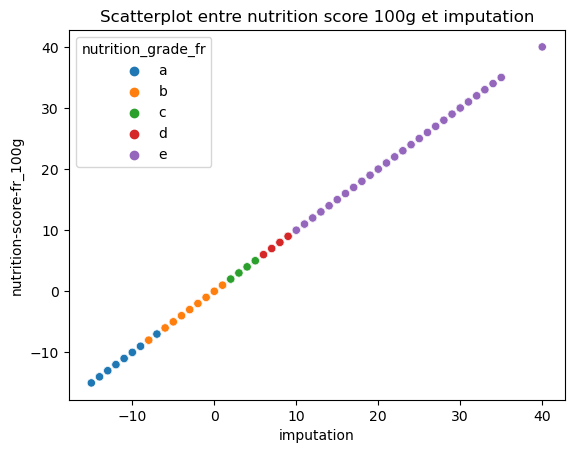

In [239]:
sns.scatterplot(data=df_moyenne,x='imputation',y='nutrition-score-fr_100g', hue='nutrition_grade_fr')
plt.title('Scatterplot entre nutrition score 100g et imputation')
plt.show()

<AxesSubplot: xlabel='nutrition_grade_fr', ylabel='nutrition-score-fr_100g'>

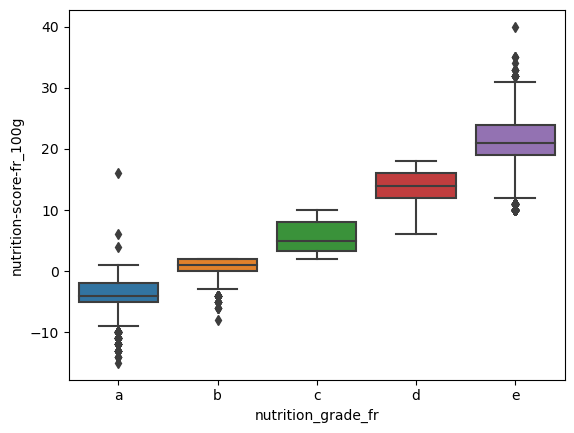

In [240]:
sns.boxplot(data=df_moyenne, x='nutrition_grade_fr', y= 'nutrition-score-fr_100g')

Cette dernière technique d'imputation obtient les meilleures résultats.

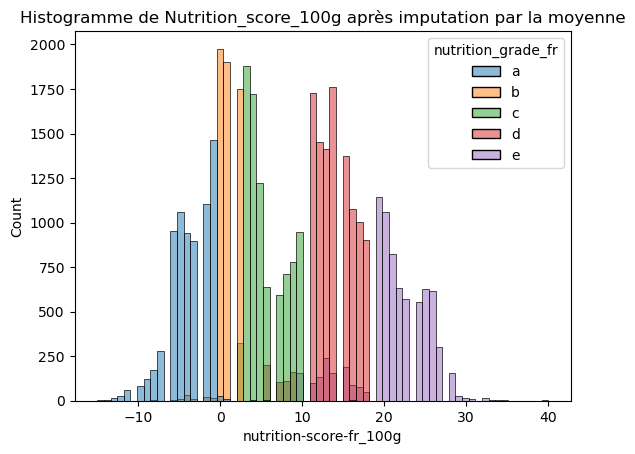

In [241]:
sns.histplot(data= df_moyenne, x='nutrition-score-fr_100g',hue='nutrition_grade_fr')
plt.title('Histogramme de Nutrition_score_100g après imputation par la moyenne')
plt.show()

In [242]:
df_moyenne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41383 entries, 194458 to 319577
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     41383 non-null  object 
 1   categories_fr            41383 non-null  object 
 2   labels_fr                23016 non-null  object 
 3   countries_fr             41383 non-null  object 
 4   allergens                19269 non-null  object 
 5   traces_fr                15823 non-null  object 
 6   nutrition_grade_fr       40764 non-null  object 
 7   states_fr                41383 non-null  object 
 8   main_category_fr         41383 non-null  object 
 9   nutrition-score-fr_100g  41383 non-null  int32  
 10  product_name             41289 non-null  object 
 11  generic_name             28735 non-null  object 
 12  quantity                 40580 non-null  object 
 13  additives_n              41383 non-null  Int32  
 14  additives       

In [243]:
df_final_1 = df_moyenne.copy()

# Additives

In [244]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41383 entries, 194458 to 319577
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     41383 non-null  object 
 1   categories_fr            41383 non-null  object 
 2   labels_fr                23016 non-null  object 
 3   countries_fr             41383 non-null  object 
 4   allergens                19269 non-null  object 
 5   traces_fr                15823 non-null  object 
 6   nutrition_grade_fr       40764 non-null  object 
 7   states_fr                41383 non-null  object 
 8   main_category_fr         41383 non-null  object 
 9   nutrition-score-fr_100g  41383 non-null  int32  
 10  product_name             41289 non-null  object 
 11  generic_name             28735 non-null  object 
 12  quantity                 40580 non-null  object 
 13  additives_n              41383 non-null  Int32  
 14  additives       

In [245]:
# La colonne additives_tags va me permettre de compter le nombre d'additifs présent et 
# par la même occasion vérifier si la colonne additives_n contient des erreurs
df_final_1.loc[~df_final_1['additives_n'].isna(),:][['additives_n','additives_tags']]

additives_n                                     additives_tags
194458            0                                        sans alcool
222064            0                                        sans alcool
221963            0                                        sans alcool
221962            1                                            en:e330
221960            0                                        sans alcool
...             ...                                                ...
316158            2                                    en:e508,en:e330
316729            0                                        sans alcool
317052            1                                        sans alcool
317063           14  en:e319,en:e621,en:e627,en:e631,en:e150c,en:e3...
319577            0                                        sans alcool

[41383 rows x 2 columns]

In [246]:
df_final_1['additives_tags'] = df_final_1['additives_tags'].astype('object')

In [247]:
df_final_1['additives_tags']=df_final_1['additives_tags'].replace('en:','',regex=True);

df_final_1['additives_tags']=df_final_1['additives_tags'].replace('-',' ',regex=True)

In [248]:
df_add = df_final_1.copy()

In [249]:
df_add['additives_tags']=df_add['additives_tags'].replace('en:','',regex=True);
df_add['additives_tags']=df_add['additives_tags'].replace(',',' , ',regex=True);
df_add['additives_tags']=df_add['additives_tags'].replace('-',' ',regex=True)

In [250]:
df_add['additives_tags'] = df_add['additives_tags'].astype('str')

In [251]:
df_add['additives_n'] = df_add['additives_n'].astype('int')

In [252]:
df_add['nbr_add'] = df_add.apply(lambda x : len(x['additives_tags'].split(", ")),axis=1)

In [253]:
# Je déplace ma colonne nbr_add
deplace_column = df_add.pop('nbr_add');  
df_add.insert(7, 'nbr_add', deplace_column);  
df_add

code                                      categories_fr  \
194458  3112301124907  Aliments et boissons à base de végétaux,Alimen...   
222064  3278692111145          Produits laitiers,Yaourts,Yaourts natures   
221963  3277510001071  Conserves,Produits de la mer,Poissons,Poissons...   
221962  3277510001040  Aliments et boissons à base de végétaux,Alimen...   
221960  3277510000852  Aliments et boissons à base de végétaux,Alimen...   
...               ...                                                ...   
316158  8722755056904  Epicerie,Produits déshydratés,Produits lyophil...   
316729  8850310000069  Produits déshydratés,Produits lyophilisés à re...   
317052  8852018101017  Aliments et boissons à base de végétaux,Alimen...   
317063  8852018201021  Aliments et boissons à base de végétaux,Alimen...   
319577  9310432003946  Aliments et boissons à base de végétaux,Alimen...   

                              labels_fr                        countries_fr  \
194458                              NaN                              France   
222064              Produit en Bretagne                              France   
221963                              NaN                              France   
221962        Point Vert,Eco-emballages                              France   
221960    Point Vert,Fabriqué dans l'UE                              France   
...                                 ...                                 ...   
316158                              NaN                              France   
316729                              NaN                              France   
317052  Point Vert,Halal,Eco-emballages  Belgique,Danemark,France,Allemagne   
317063  Point Vert,Halal,Eco-emballages                              France   
319577                              NaN                              France   

                                  allergens     traces_fr nutrition_grade_fr  \
194458                                  NaN           NaN                  a   
222064                Lait, lait, lactiques           NaN                  a   
221963                                  NaN  Œufs,Poisson                  a   
221962                                  NaN           NaN                  a   
221960                     Morue, lait, blé           NaN                  a   
...                                     ...           ...                ...   
316158  OEUF, LAIT, LAIT, LAIT, BLÉ, CÉLERI           NaN                NaN   
316729                                  NaN           NaN                NaN   
317052                                  NaN           NaN                NaN   
317063                      blé, soja, soja           NaN                NaN   
319577                                  NaN           NaN                NaN   

        nbr_add                                          states_fr  \
194458        1  A vérifier,Complet,Informations nutritionnelle...   
222064        1  A vérifier,Complet,Informations nutritionnelle...   
221963        1  A vérifier,Complet,Informations nutritionnelle...   
221962        1  A vérifier,Complet,Informations nutritionnelle...   
221960        1  A vérifier,Complet,Informations nutritionnelle...   
...         ...                                                ...   
316158        2  A vérifier,Complet,Informations nutritionnelle...   
316729        1  A vérifier,Complet,Informations nutritionnelle...   
317052        1  A compléter,Informations nutritionnelles compl...   
317063       14  A vérifier,Complet,Informations nutritionnelle...   
319577        1  A compléter,Informations nutritionnelles compl...   

            main_category_fr  nutrition-score-fr_100g  \
194458           Champignons                       -8   
222064               Yaourts                       -1   
221963  Poissons en conserve                       -1   
221962         Légumes frais                       -6   
221960         Légumes frais                       -3   
...        

In [254]:
df_add.loc[(df_add['nbr_add']==1)][['nbr_add','additives_n']]

nbr_add  additives_n
194458        1            0
222064        1            0
221963        1            0
221962        1            1
221960        1            0
...         ...          ...
316097        1            0
316098        1            1
316729        1            0
317052        1            1
319577        1            0

[24133 rows x 2 columns]

In [255]:
df_add['additives_tags'] = df_add.apply(lambda x : len(x['additives_tags'].split(", ")),axis=1)

<AxesSubplot: xlabel='nbr_add', ylabel='additives_n'>

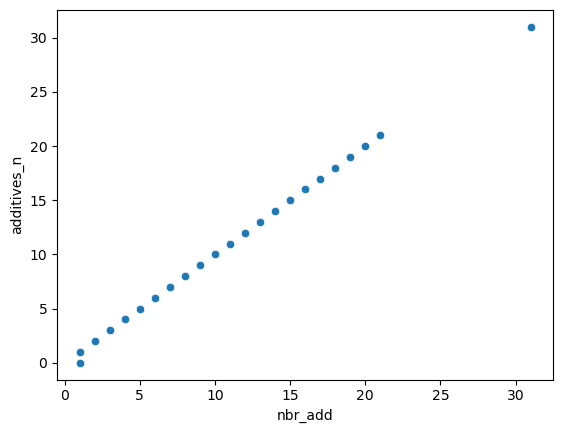

In [256]:
sns.scatterplot(data=df_add, x='nbr_add',y='additives_n')

In [257]:
df_add['additives_tags'].value_counts()[:20]

1     24133
2      5001
3      3796
4      2567
5      1920
6      1260
7       882
8       597
9       400
10      249
11      184
12      128
13       85
14       78
15       50
16       24
17        9
18        8
19        3
20        3
Name: additives_tags, dtype: int64

In [258]:
df_add.loc[(df_add['nbr_add']==1)&(df_add['additives_n']==0),:][['nbr_add','additives_tags','additives_n']]

nbr_add  additives_tags  additives_n
194458        1               1            0
222064        1               1            0
221963        1               1            0
221960        1               1            0
221858        1               1            0
...         ...             ...          ...
315530        1               1            0
315786        1               1            0
316097        1               1            0
316729        1               1            0
319577        1               1            0

[14329 rows x 3 columns]

In [259]:
df_add.loc[(df_add['nbr_add']==1)&(df_add['additives_n']==0),'nbr_add']= 0
df_add.loc[(df_add['additives_tags']=='e1510') & (df_add['additives_n']==0.0),'additives_n']= 1.0;
df_add.loc[(df_add['additives_tags']=='polyols') & (df_add['additives_n']==0.0),'additives_n']= 1.0;
df_add.loc[(df_add['additives_n']==0.0) & (df_add['nbr_add']==2),'nbr_add']= 0;

In [260]:
sns.scatterplot(data=df_add, x='nbr_add',y='additives_n')

<AxesSubplot: xlabel='nbr_add', ylabel='additives_n'>

In [261]:
df_add['nbr_add'].describe()

count    41383.000000
mean         2.008627
std          2.552394
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         31.000000
Name: nbr_add, dtype: float64

Certains produits contiennent 31 additifs.  
Je vais lister les plus nocifs.

In [262]:
# J'ai enregistrer sur un fichier csv la liste des additifs et leur niveau de dangerosité.
df_add_danger = pd.read_csv('df_add_danger.csv', index_col=[0] )

In [263]:
df_add_danger = df_add_danger.rename(columns={"Notre appréciation":'Note'})

In [264]:
df_add_danger

Fonction principale  Note  \
0                                             Colorant     1   
1                                             Colorant     1   
2                                             Colorant     1   
3                                             Colorant     1   
4                                             Colorant     1   
5                                             Colorant     1   
6                                             Colorant     1   
7                                             Colorant     1   
8                                             Colorant     1   
9                                         Conservateur     1   
10                                        Conservateur     1   
11                                        Conservateur     1   
12                                        Conservateur     1   
13                                        Conservateur     1   
14                                        Conservateur     1   
15                                        Conservateur     1   
16                                        Conservateur     1   
17                                        Conservateur     1   
18                                        Conservateur     1   
19                                        Conservateur     1   
20                                         Antioxydant     1   
21                                         Antioxydant     1   
22                                         Antioxydant     1   
23                                         Antioxydant     1   
24                                         Antioxydant     1   
25                                         Antioxydant     1   
26                                         Antioxydant     1   
27                                         Antioxydant     1   
28                                         Antioxydant     1   
29                                         Antioxydant     1   
30                                         Antioxydant     1   
31                                         Antioxydant     1   
32                                         Antioxydant     1   
33                                         Antioxydant     1   
34                                         Antioxydant     1   
35                                         Antioxydant     1   
36                                         Antioxydant     1   
37                                         Antioxydant     1   
38                                         Antioxydant     1   
39                                         Antioxydant     1   
40                                         Antioxydant     1   
41                                         Antioxydant     1   
42                                Régulateur d'acidité     1   
43                                Régulateur d'acidité     1   
44                                Régulateur d'acidité     1   
45                                Régulateur d'acidité     1   
46                                         Antioxydant     1   
47                                    Agent de texture     1   
48                                    Agent de texture     1   
49                                    Agent de texture     1   
50                                    Agent de texture     1   
51                                    Agent de texture     1   
52                                    Agent de texture     1   
53                                    Agent de texture     1   
54                                    Agent de texture     1   
55                                    Agent de texture     1   
56                                    Agent de texture     1   
57                                    Agent de texture     1   
58                                    Agent de texture     1   
59                                Régulateur d'acidité     1   
60                                Régulateur d'acidité     1   
61                                Régulateur d'acidité     1   
62 

Cette liste pourra servir par la suite afin de détecter les additifs les plus nocifs.

# nutrition_grade_fr

In [265]:
df_add.shape

(41383, 31)

In [266]:
df_add.loc[(df_add['nutrition_grade_fr'].isna())]['code'].count()

619

Je décide de les supprimer.

In [267]:
add_to_drop = df_add.loc[df_add['nutrition_grade_fr'].isna()].index
           
# J'affiche les produits sans nutrition-grade
df_add = df_add.drop(add_to_drop)

In [268]:
df_add['nutrition_grade_fr'].isna().sum()

0

In [269]:
df_add['nutrition_grade_fr'].unique()

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

In [270]:
# Je sépare les boissons des autres produits
df_liquide = df_add.loc[df_add['pnns_groups_1']=='beverages',:].sort_values(by='nutrition_grade_fr');

df_solide = df_add.loc[df_add['pnns_groups_1']!='beverages',:].sort_values(by='nutrition_grade_fr')


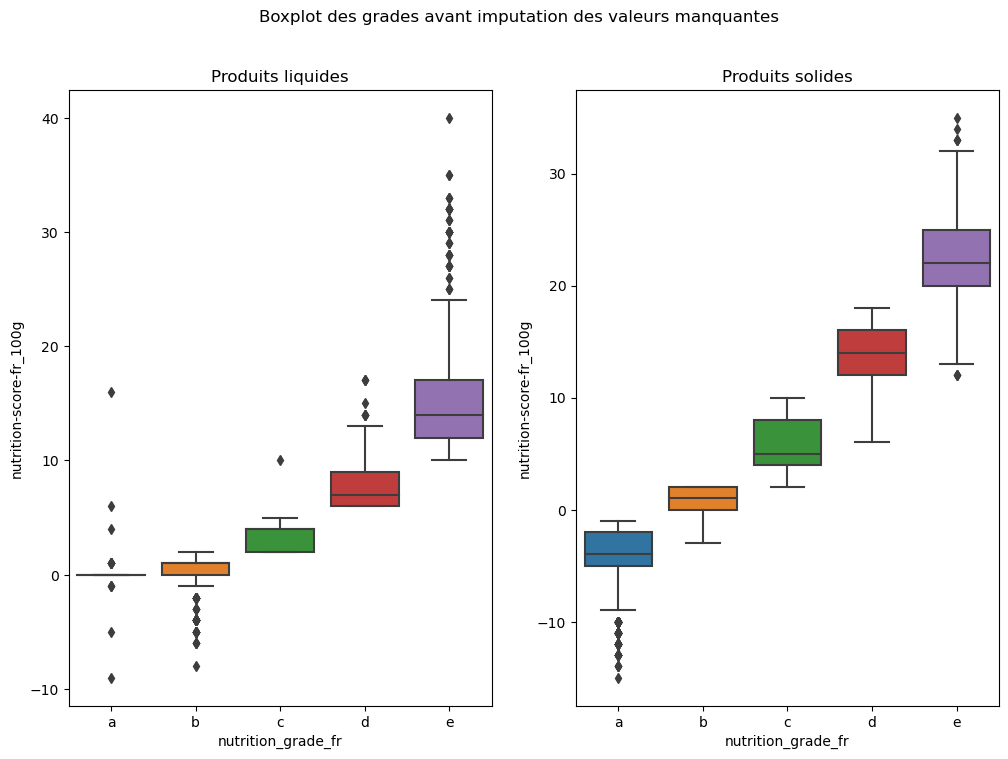

In [271]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

fig.suptitle('Boxplot des grades avant imputation des valeurs manquantes')
sns.boxplot(ax=axes[0],x='nutrition_grade_fr',y='nutrition-score-fr_100g',data=df_liquide, showfliers=True)
ax=axes[0].title.set_text('Produits liquides')
sns.boxplot(ax=axes[1],x='nutrition_grade_fr',y='nutrition-score-fr_100g',data=df_solide, showfliers=True)
ax=axes[1].title.set_text('Produits solides')

plt.show()

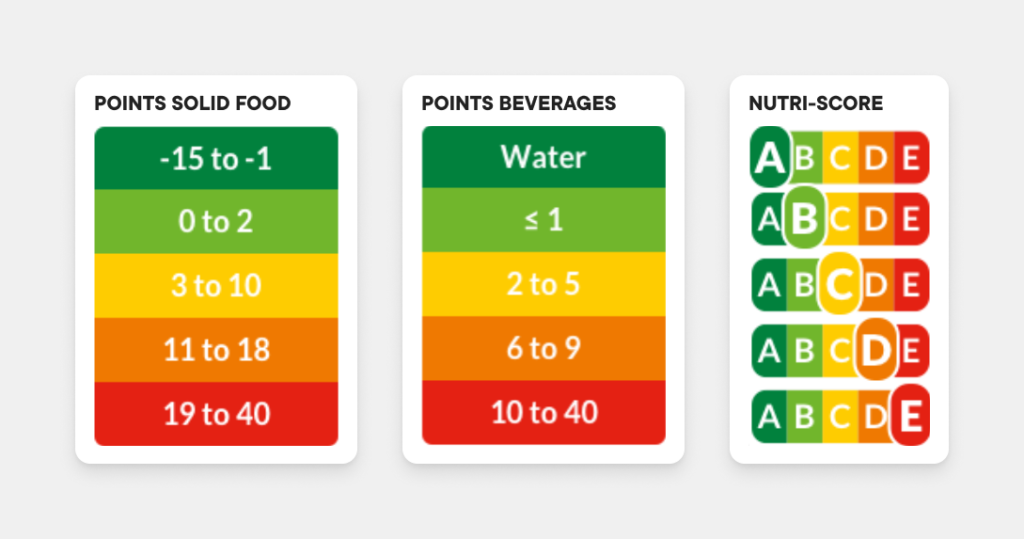

# Produits liquides

In [272]:
#df_liquide['nutrition_grade_fr'] = df_liquide['nutrition_grade_fr'].astype('string')

In [273]:
# J'affiche les valeurs min et max pour détecter les erreurs
df_liquide.groupby('nutrition_grade_fr').agg({'nutrition-score-fr_100g': ['min', 'max']})

nutrition-score-fr_100g    
                                       min max
nutrition_grade_fr                            
a                                       -9  16
b                                       -8   2
c                                        2  10
d                                        6  17
e                                       10  40

In [274]:
# Certaines valeurs sont erronées. 
df_liquide.loc[(df_liquide['nutrition_grade_fr']=='a')&(df_liquide['nutrition-score-fr_100g']>0.0),'nutrition-score-fr_100g']=0.0;

df_liquide.loc[(df_liquide['nutrition_grade_fr']=='b')&(df_liquide['nutrition-score-fr_100g']>=1.0),'nutrition-score-fr_100g']=1.0;
df_liquide.loc[(df_liquide['nutrition_grade_fr']=='b')&(df_liquide['nutrition-score-fr_100g']<0.0),'nutrition-score-fr_100g']=0.0;

df_liquide.loc[(df_liquide['nutrition_grade_fr']=='c')&(df_liquide['nutrition-score-fr_100g']<2.0),'nutrition-score-fr_100g']=2.0;
df_liquide.loc[(df_liquide['nutrition_grade_fr']=='c')&(df_liquide['nutrition-score-fr_100g']>5.0),'nutrition-score-fr_100g']=5.0;

df_liquide.loc[(df_liquide['nutrition_grade_fr']=='d')&(df_liquide['nutrition-score-fr_100g']<6.0),'nutrition-score-fr_100g']=6.0;
df_liquide.loc[(df_liquide['nutrition_grade_fr']=='d')&(df_liquide['nutrition-score-fr_100g']>9.0),'nutrition-score-fr_100g']=9.0;

df_liquide.loc[(df_liquide['nutrition_grade_fr']=='e')&(df_liquide['nutrition-score-fr_100g']<10.0),'nutrition-score-fr_100g']=10.0

df_liquide.groupby('nutrition_grade_fr').agg({'nutrition-score-fr_100g': ['min', 'max']})

nutrition-score-fr_100g    
                                       min max
nutrition_grade_fr                            
a                                       -9   0
b                                        0   1
c                                        2   5
d                                        6   9
e                                       10  40

In [275]:
# Je remplace mes valeurs manquantes 
df_liquide.loc[(df_liquide['nutrition-score-fr_100g']<=-1)&(df_liquide['nutrition_grade_fr'].isna())]['nutrition_grade_fr'].replace('None', 'a', inplace=True);
df_liquide.loc[(df_liquide['nutrition-score-fr_100g']>=0)&(df_liquide['nutrition-score-fr_100g']<=1)&(df_liquide['nutrition_grade_fr'].isna())]['nutrition_grade_fr'].replace('None', 'b', inplace=True);
df_liquide.loc[(df_liquide['nutrition-score-fr_100g']>=3)&(df_liquide['nutrition-score-fr_100g']<=10)&(df_liquide['nutrition_grade_fr'].isna())]['nutrition_grade_fr'].replace('None', 'c', inplace=True);
df_liquide.loc[(df_liquide['nutrition-score-fr_100g']>=11)&(df_liquide['nutrition-score-fr_100g']<=18)&(df_liquide['nutrition_grade_fr'].isna())]['nutrition_grade_fr'].replace('None', 'd', inplace=True);
df_liquide.loc[(df_liquide['nutrition-score-fr_100g']>=19)&(df_liquide['nutrition_grade_fr'].isna())]['nutrition_grade_fr'].replace('None', 'e', inplace=True);


# Produits solides

In [276]:
df_solide.groupby('nutrition_grade_fr').agg({'nutrition-score-fr_100g': ['min', 'max']})

nutrition-score-fr_100g    
                                       min max
nutrition_grade_fr                            
a                                      -15  -1
b                                       -3   2
c                                        2  10
d                                        6  18
e                                       12  35

In [277]:
df_solide.loc[(df_solide['nutrition_grade_fr']=='a')&(df_solide['nutrition-score-fr_100g']>-1.0),'nutrition-score-fr_100g']=-1.0;
df_solide.loc[(df_solide['nutrition_grade_fr']=='b')&(df_solide['nutrition-score-fr_100g']>=2.0),'nutrition-score-fr_100g']=2.0;
df_solide.loc[(df_solide['nutrition_grade_fr']=='b')&(df_solide['nutrition-score-fr_100g']<=0.0),'nutrition-score-fr_100g']=0.0;
df_solide.loc[(df_solide['nutrition_grade_fr']=='c')&(df_solide['nutrition-score-fr_100g']>=10.0),'nutrition-score-fr_100g']=10.0;
df_solide.loc[(df_solide['nutrition_grade_fr']=='c')&(df_solide['nutrition-score-fr_100g']<=3.0),'nutrition-score-fr_100g']=3.0;
df_solide.loc[(df_solide['nutrition_grade_fr']=='d')&(df_solide['nutrition-score-fr_100g']>=18.0),'nutrition-score-fr_100g']=18.0
df_solide.loc[(df_solide['nutrition_grade_fr']=='d')&(df_solide['nutrition-score-fr_100g']<=11.0),'nutrition-score-fr_100g']=11.0;
df_solide.loc[(df_solide['nutrition_grade_fr']=='e')&(df_solide['nutrition-score-fr_100g']<=19.0),'nutrition-score-fr_100g']=19.0

df_solide.groupby('nutrition_grade_fr').agg({'nutrition-score-fr_100g': ['min', 'max']})

nutrition-score-fr_100g    
                                       min max
nutrition_grade_fr                            
a                                      -15  -1
b                                        0   2
c                                        3  10
d                                       11  18
e                                       19  35

In [278]:
df_solide['nutrition_grade_fr'].isna().mean()

0.0

In [279]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

fig.suptitle('Boxplot des grades après imputation des valeurs manquantes')
sns.boxplot(ax=axes[0],x='nutrition_grade_fr',y='nutrition-score-fr_100g',data=df_liquide, showfliers=True)
ax=axes[0].title.set_text('Produits liquides')
sns.boxplot(ax=axes[1],x='nutrition_grade_fr',y='nutrition-score-fr_100g',data=df_solide, showfliers=True)
ax=axes[1].title.set_text('Produits solides')

plt.show()

Ces boxplots montrent clairement que le nutrition-score est corrélé au nutrition grade.  


In [280]:
df_clean = pd.concat([df_liquide,df_solide],axis=0)

In [281]:
df_clean

code                                      categories_fr  \
220374  3271330062939  Boissons,Boissons gazeuses,Eaux,Eaux minérales...   
180946       20656935  Boissons,Boissons gazeuses,Eaux,Eaux minérales...   
60623   0049283802185  Boissons,Boissons gazeuses,Eaux,Eaux minérales...   
245394  3596710307562                                   Boissons-au-soja   
213055  3257983877687  Boissons,Boissons gazeuses,Eaux,Eaux minérales...   
...               ...                                                ...   
310371  8437000999119                    Viandes,Charcuteries,Saucissons   
310299  8436550863888   Viandes,Charcuteries,Saucissons,Saucisses sèches   
310300  8436550864229            Viandes,Charcuteries,Saucissons,Salamis   
310302  8436550864281           Viandes,Charcuteries,Saucissons,Chorizos   
256193  4000417013002           Snacks sucrés,Chocolats,Chocolats blancs   

                                                labels_fr  \
220374                                                NaN   
180946                     Peu ou pas de sucre,Sans sucre   
60623                                                 NaN   
245394  Bio,Bio européen,FR-BIO-01,Point Vert,AB Agric...   
213055                                                NaN   
...                                                   ...   
310371                             Sans gluten,Point Vert   
310299  Sans gluten,Sans OGM,Sans-exposition-aux-radia...   
310300                               Sans gluten,Sans OGM   
310302                               Sans gluten,Sans OGM   
256193                                         Point Vert   

                     countries_fr  \
220374                     France   
180946                     France   
60623           France,États-Unis   
245394                     France   
213055                     France   
...                           ...   
310371                     France   
310299                     France   
310300                     France   
310302                     France   
256193  Danemark,France,Allemagne   

                                                allergens  \
220374                                                NaN   
180946                                                NaN   
60623                                                 NaN   
245394                                                NaN   
213055                                                NaN   
...                                                   ...   
310371                                                NaN   
310299  LAIT, ferments lactiques, lactose, LAIT, LAIT,...   
310300                                                NaN   
310302                                LAIT, SOJA, LACTOSE   
256193  Haselnüsse, Vollmilchpulver, Milchzucker, Butt...   

                              traces_fr nutrition_grade_fr  nbr_add  \
220374                          Aucunes                  a        3   
180946                              NaN                  a        0   
60623                               NaN                  a        0   
245394                              NaN                  a        2   
213055                              NaN                  a        0   
...                                 ...                ...      ...   
310371                              NaN                  e        5   
310299         Lait,Fruits à coque,Soja                  e        7   
310300  Lait,Fruits à coque,Soja,Poivre                  e        6   
310302                   Fruits à coque                  e       10   
256193  Œufs,Arachides,de:Schalenfrucht                  e        1   

                                                states_fr  main_category_fr  \
220374  A vérifier,Complet,Informations nutritionnelle...              Eaux   
180946  A vérifier,Complet,Informations nutritionnelle...              Eaux   
60623   A vérifier,Complet,Informations nutritionnelle...              Eaux   
245394  A vérifier,Compl

In [282]:
df_clean.to_csv('df_fin.csv')